In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
# load_dataset
df_ca_appr = pd.read_csv('df_ca_appr.csv')
df_il_appr = pd.read_csv('df_il_appr.csv')

G:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (23,24,25,27,28,29,30,31,32,33,34,39,44,45,47) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
G:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (23,24,25,27,28,29,30,31,32,33,34,39,44,45) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [19]:
pd.options.display.max_columns = None

In [20]:
# All Variables
all_vars = df_ca_appr.columns.tolist()[7:-1]

# Numerical Variables
num_vars = all_vars[15:28]
add_num_vars_1 = ['property_value', 'income', 'multifamily_affordable_units']
add_num_vars_2 = all_vars[-7:]
num_vars += add_num_vars_1
num_vars += add_num_vars_2
num_vars.remove('hoepa_status')

# Categorical Variables
cat_vars =[var for var in all_vars if var not in num_vars]

Variable: derived_loan_product_type


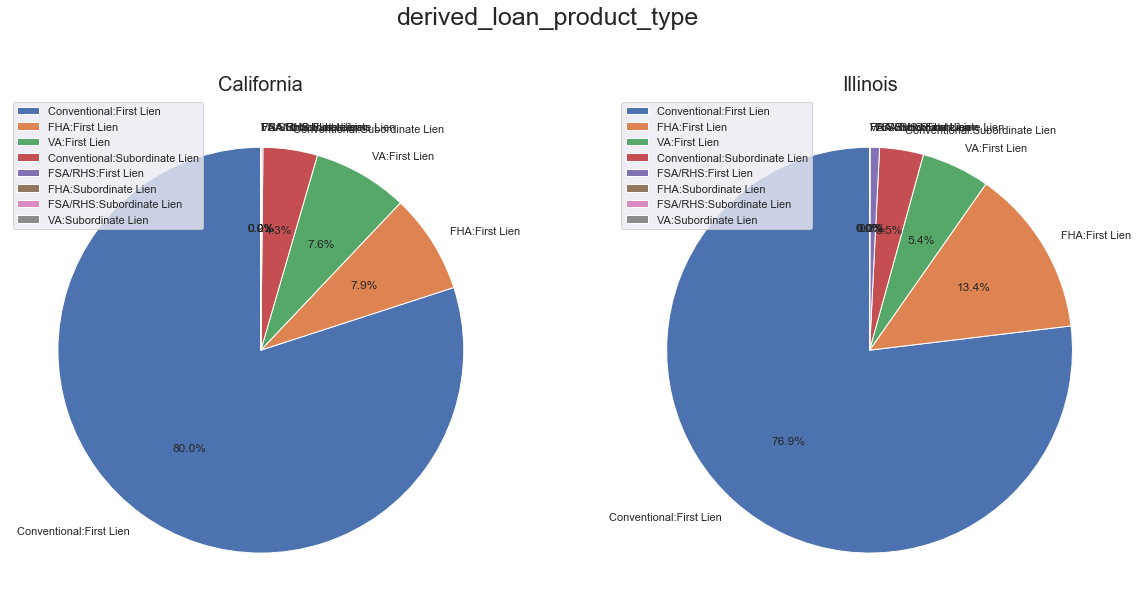

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------




In [21]:
def plot_categorical(var_name):
    df1 = df_ca_appr
    df2 = df_il_appr
    
    title1 = 'California'
    title2 = 'Illinois'
    
    # Plot Pie Chart
    value1 = df1[var_name].value_counts()
    value2 = df2[var_name].value_counts()
    
    # Make 2 lables in same order
    index1 = value1.index.tolist()
    
    index_list2 = value2.index.tolist()
    index2 = [ind for ind in index1 if ind in index_list2]
    additional_ind = list(set(index_list2) - set(index1))
    index2 += additional_ind
    
    print(f'Variable: {var_name}')
    # Plot
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(20,10))
    fig.suptitle(f'{var_name}', fontsize=25)
    ax1.set_title(title1, fontsize=20)
    ax1.pie(value1, labels = index1, autopct='%1.1f%%', startangle = 90)
    ax1.legend()
    
    ax2.set_title(title2, fontsize=20)
    ax2.pie(value2, labels = index2, autopct='%1.1f%%', startangle = 90)
    ax2.legend()
    
    plt.show()
    
    # Prepare dataframe
    print(f'{title1}: {value1.sum():,}    |    {title2}: {value2.sum():,}')
    
    print('\n')
    print('-------------------------------------------------------------------')
    print('\n')
    

plot_categorical('derived_loan_product_type')

Variable: loan_amount


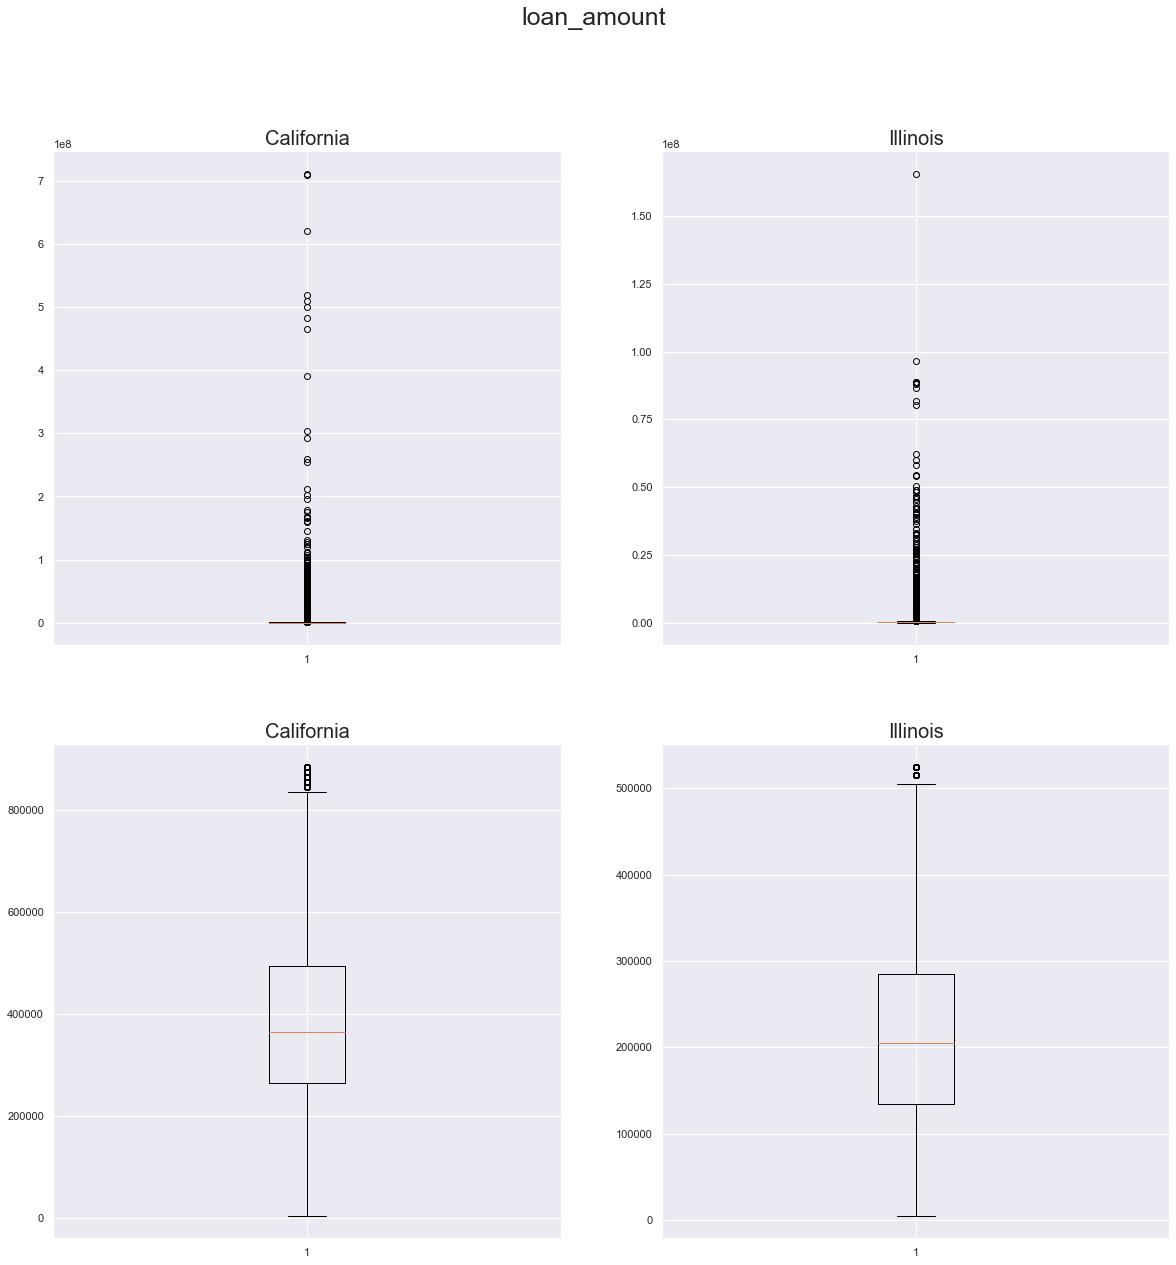

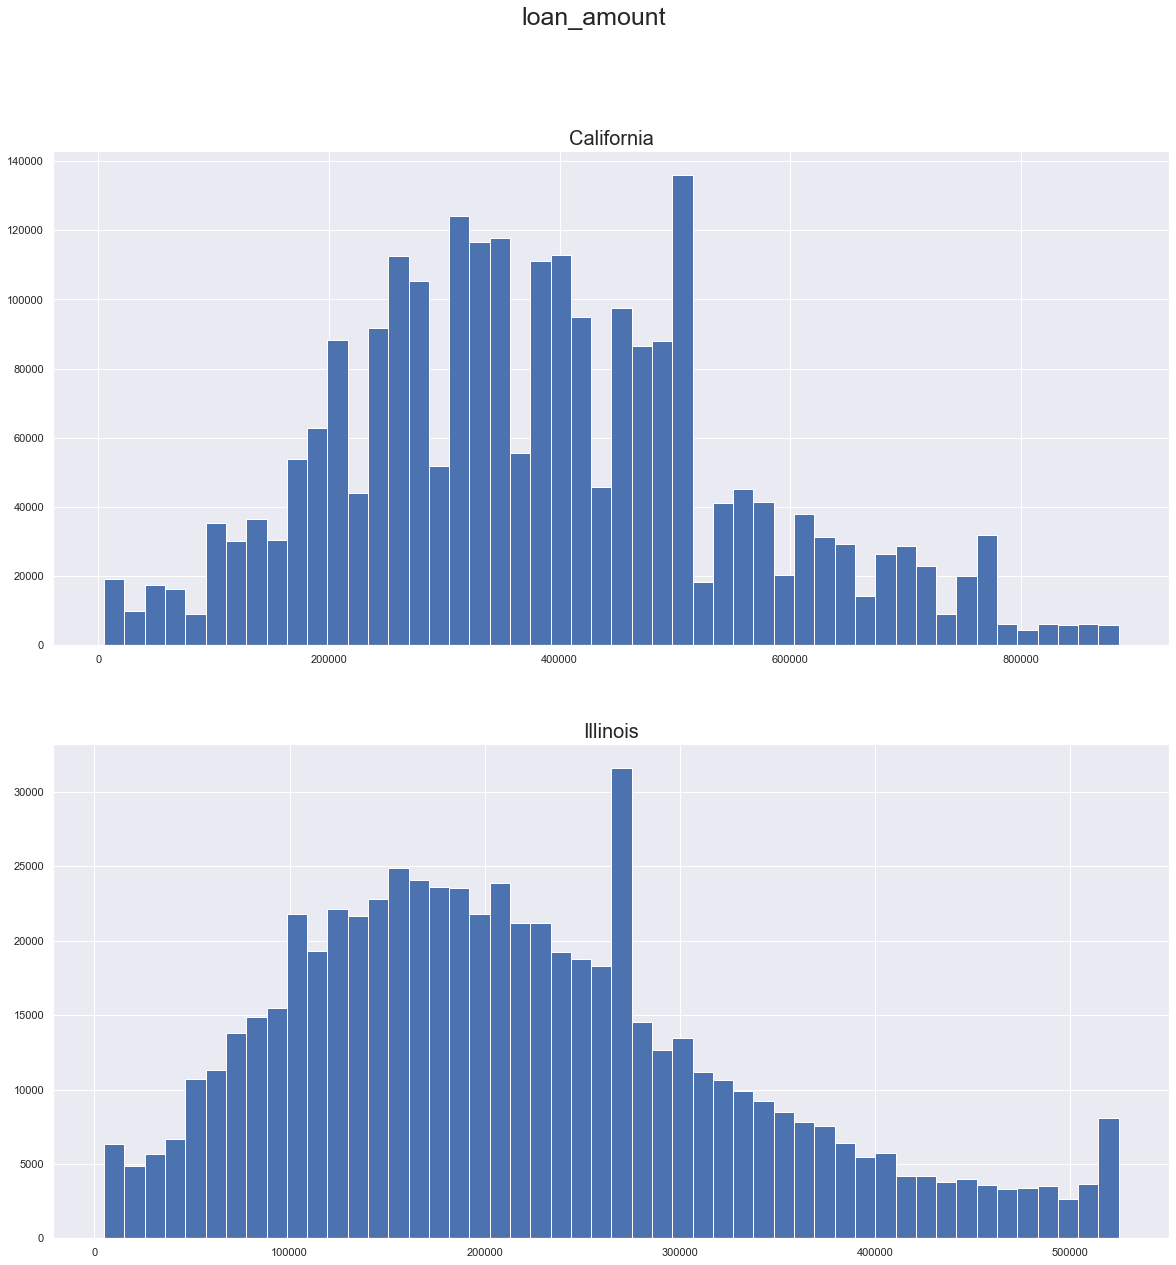

         California      Illinois  California_nol   Illinois_nol
count  2.584267e+06  6.622360e+05    2.455176e+06  637305.000000
mean   4.517593e+05  2.485405e+05    3.841494e+05  217096.186284
std    1.347899e+06  5.592410e+05    1.712729e+05  113115.054436
min    5.000000e+03  5.000000e+03    5.000000e+03    5000.000000
25%    2.650000e+05  1.350000e+05    2.650000e+05  135000.000000
50%    3.850000e+05  2.050000e+05    3.650000e+05  205000.000000
75%    5.150000e+05  2.950000e+05    4.950000e+05  285000.000000
max    7.110050e+08  1.656050e+08    8.850000e+05  525000.000000


-------------------------------------------------------------------




In [22]:
def remove_outliers(values):
    q1 = values.quantile(0.25)
    q3 = values.quantile(0.75)
    
    iqr = q3 - q1
    lw = q1 - 1.5 * iqr
    hw = q3 + 1.5 * iqr
    
    cond1 = values < hw 
    cond2 = values > lw 
    values_no_ol = values[cond1 & cond2]
    return values_no_ol
    

def plot_numerical(var_name):

    df1 = df_ca_appr
    df2 = df_il_appr
    
    title1 = 'California'
    title2 = 'Illinois'
    
    bin_num = 500
    # Get Values
    global value1, value2
    value1 = df1[var_name]
    value2 = df2[var_name] 
    
    # Convert type
    for value in ['value1', 'value2']:
        if globals()[value].dtype == 'object':
            try:
                globals()[value] = globals()[value].astype('float64')
            except ValueError:
                # Remove Exempt
                a = globals()[value].drop(globals()[value].index[globals()[value]=='Exempt']).astype('float64')
                globals()[value] = a
    
    
    # Remove outliers
    list_no_remove = ['loan_term', 'prepayment_penalty_term', 
                      'multifamily_affordable_units', 'ffiec_msa_md_median_family_income']
    
    if var_name not in list_no_remove:
        value1_nol = remove_outliers(value1)
        value2_nol = remove_outliers(value2)
    else:
        value1_nol = value1
        value2_nol = value2
    
    
    print(f'Variable: {var_name}')
    # Plot boxplots
    bin_num = 50
    
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(20,20))
    fig.suptitle(f'{var_name}', fontsize=25)
    ax1.set_title(title1, fontsize=20)
    ax1.boxplot(value1)
    
    ax2.set_title(title2, fontsize=20)
    ax2.boxplot(value2)
    
    ax3.set_title(title1, fontsize=20)
    ax3.boxplot(value1_nol)
    
    ax4.set_title(title2, fontsize=20)
    ax4.boxplot(value2_nol)
    
    plt.show()
    
    # Plot histograms
    fig, (ax1, ax2) = plt.subplots(2,1, figsize=(20,20))
    fig.suptitle(f'{var_name}', fontsize=25)
    ax1.set_title(title1, fontsize=20)
    ax1.hist(value1_nol, bins = bin_num)
    
    ax2.set_title(title2, fontsize=20)
    ax2.hist(value2_nol, bins = bin_num)
    
    plt.show()
    
    # Print description
    frame = {title1: value1.describe(), title2: value2.describe(),
            f'{title1}_nol': value1_nol.describe(), f'{title2}_nol': value2_nol.describe()}
    df_desc = pd.DataFrame(frame)
    print(df_desc)
    print('\n')
    print('-------------------------------------------------------------------')
    print('\n')

    

plot_numerical('loan_amount')

Variable: conforming_loan_limit


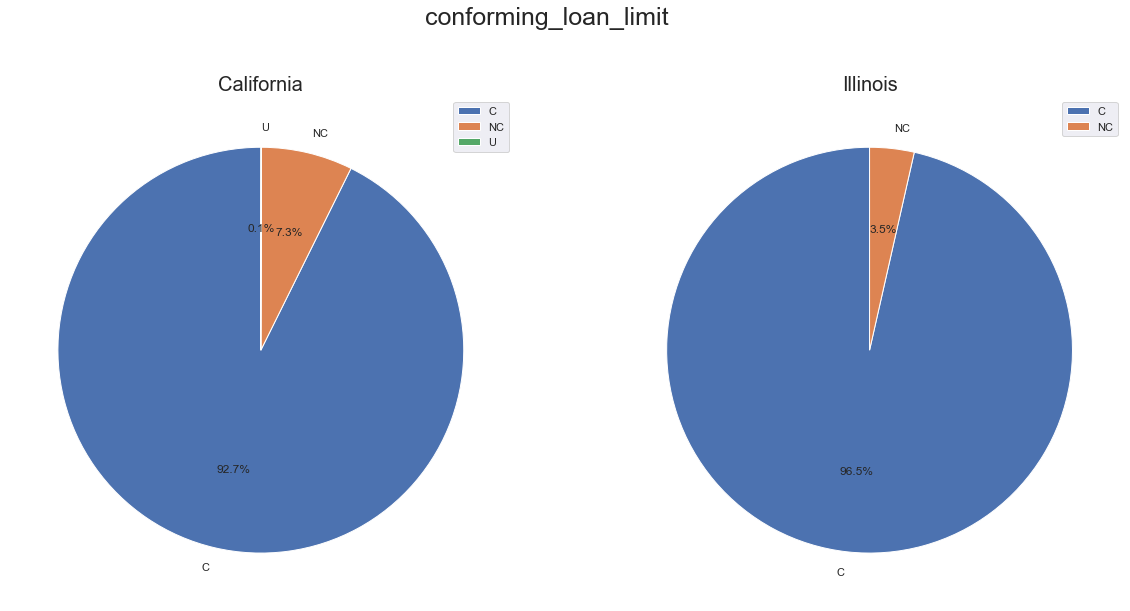

California: 2,574,609    |    Illinois: 659,250


-------------------------------------------------------------------


Variable: derived_loan_product_type


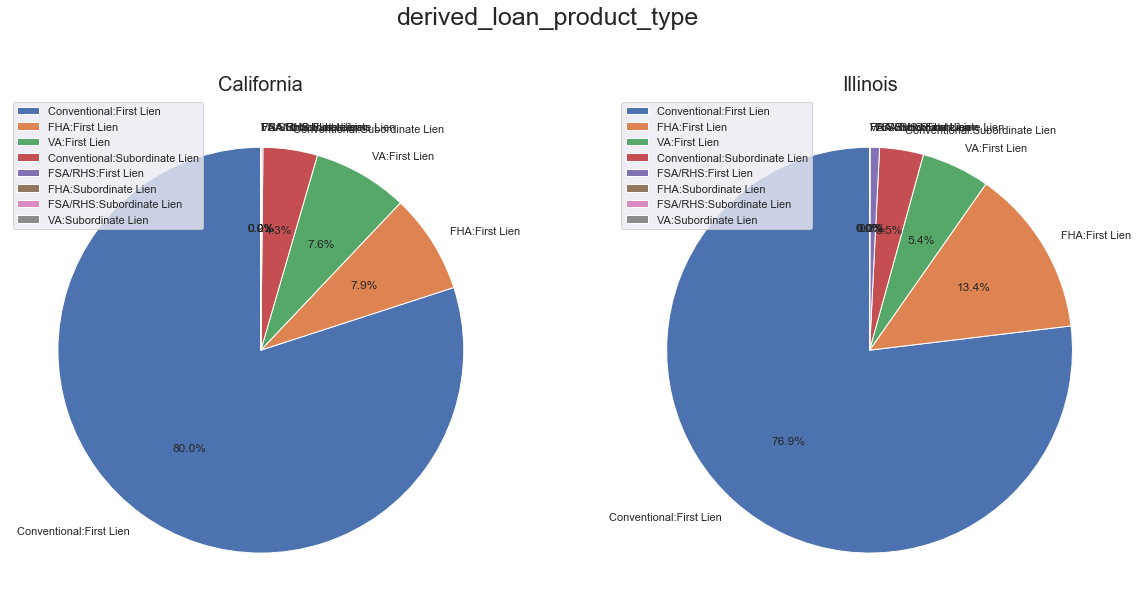

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: derived_dwelling_category


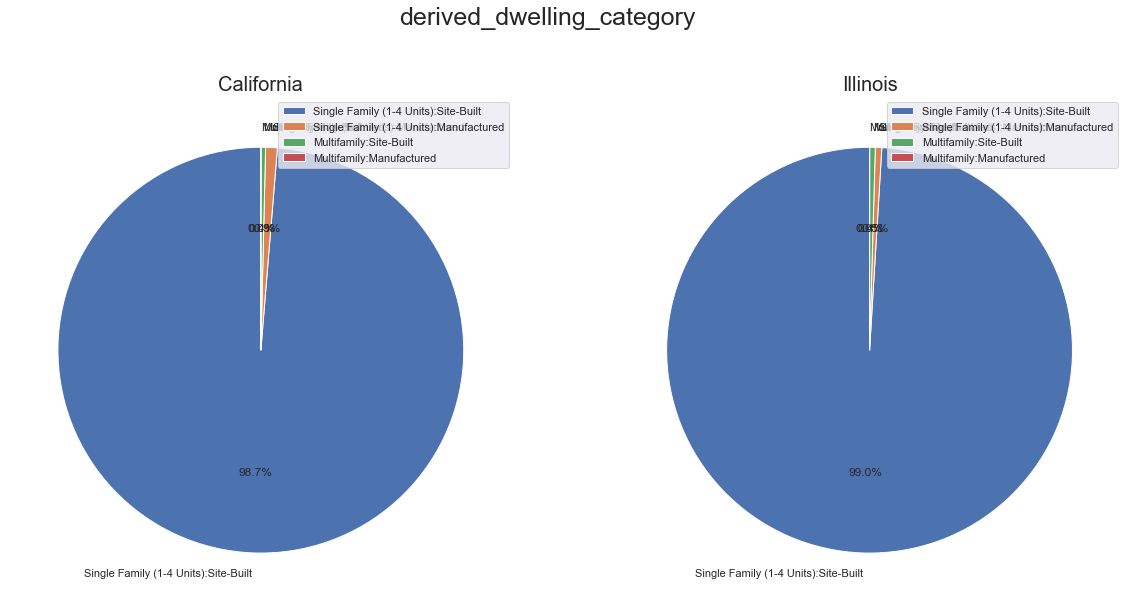

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: derived_ethnicity


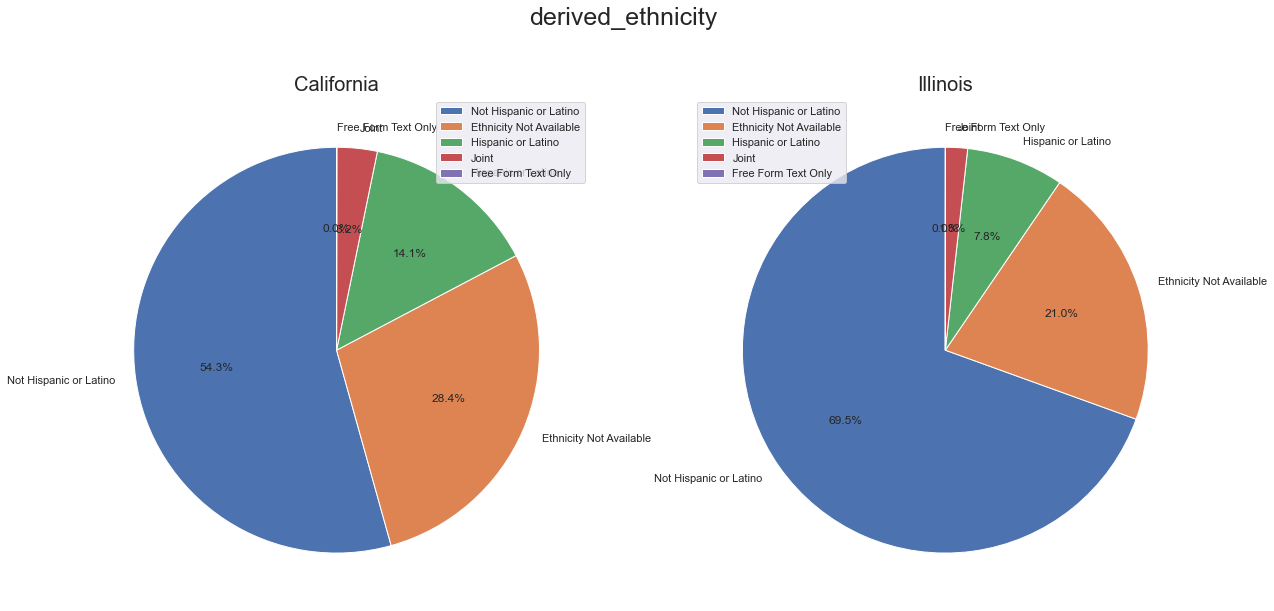

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: derived_race


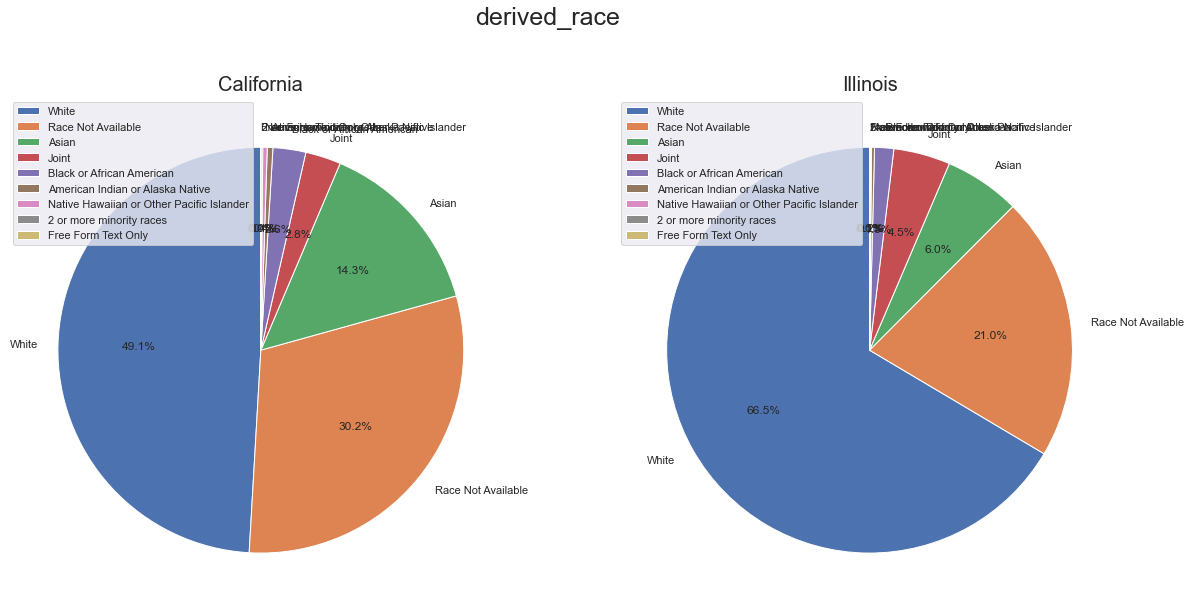

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: derived_sex


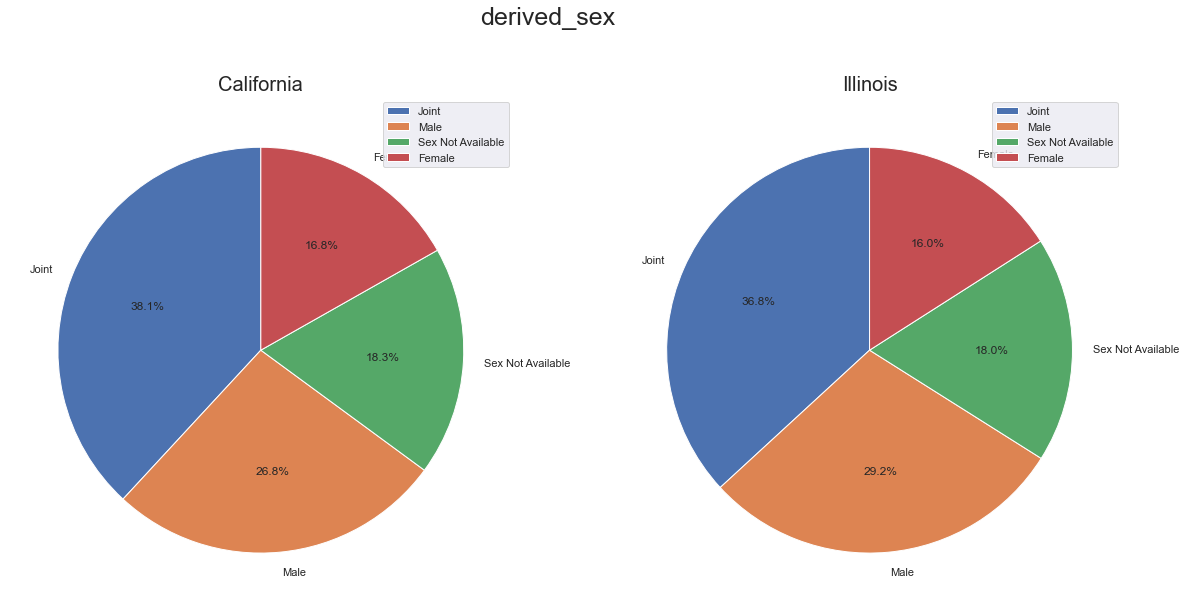

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: action_taken


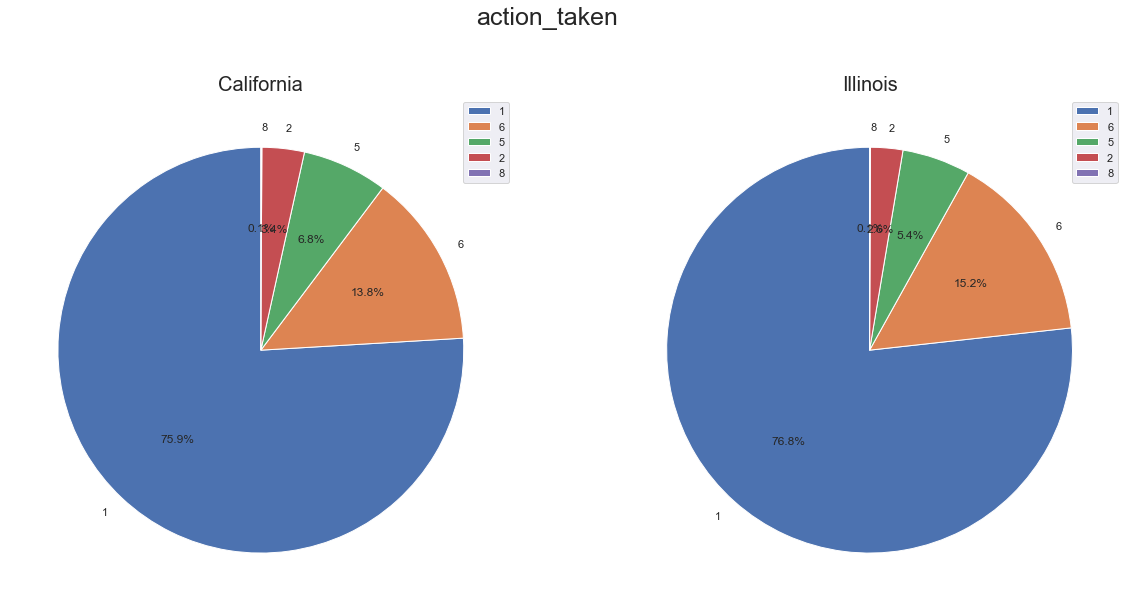

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: purchaser_type


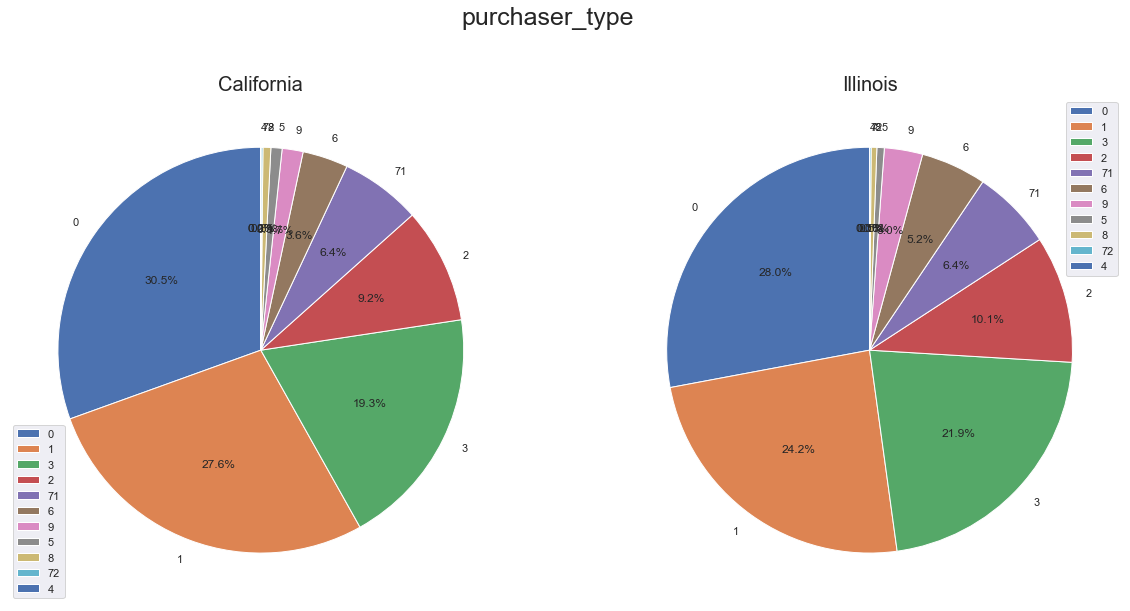

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: preapproval


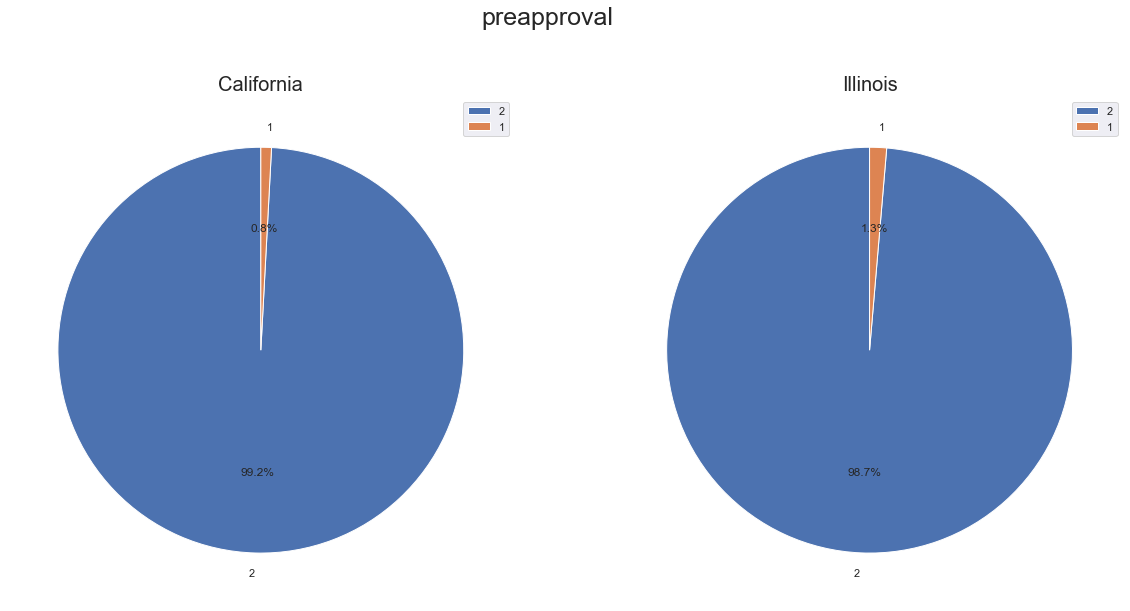

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: loan_type


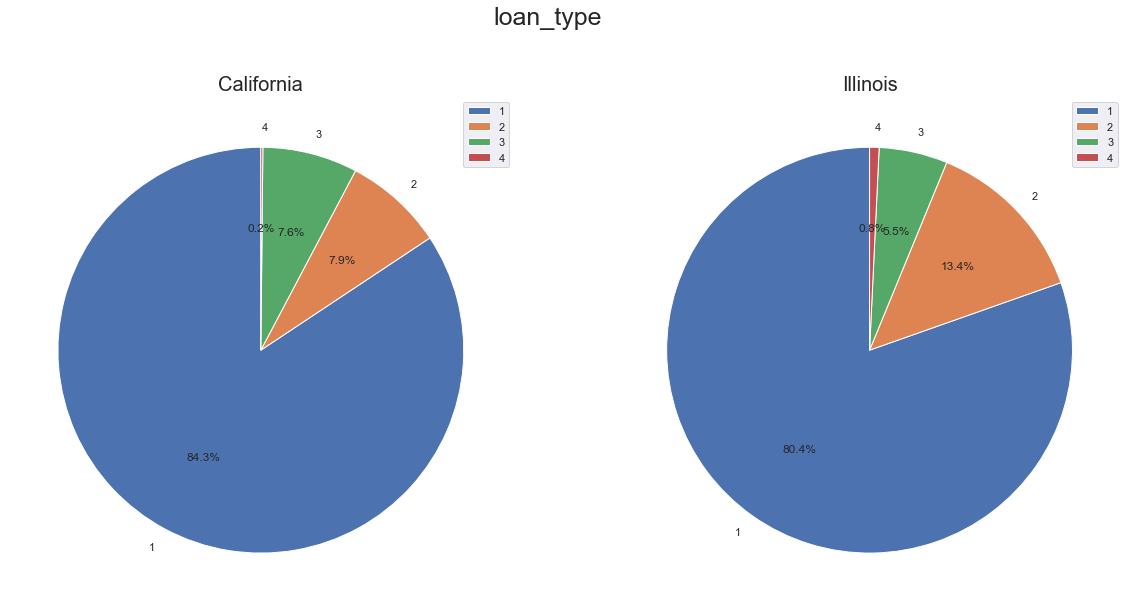

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: loan_purpose


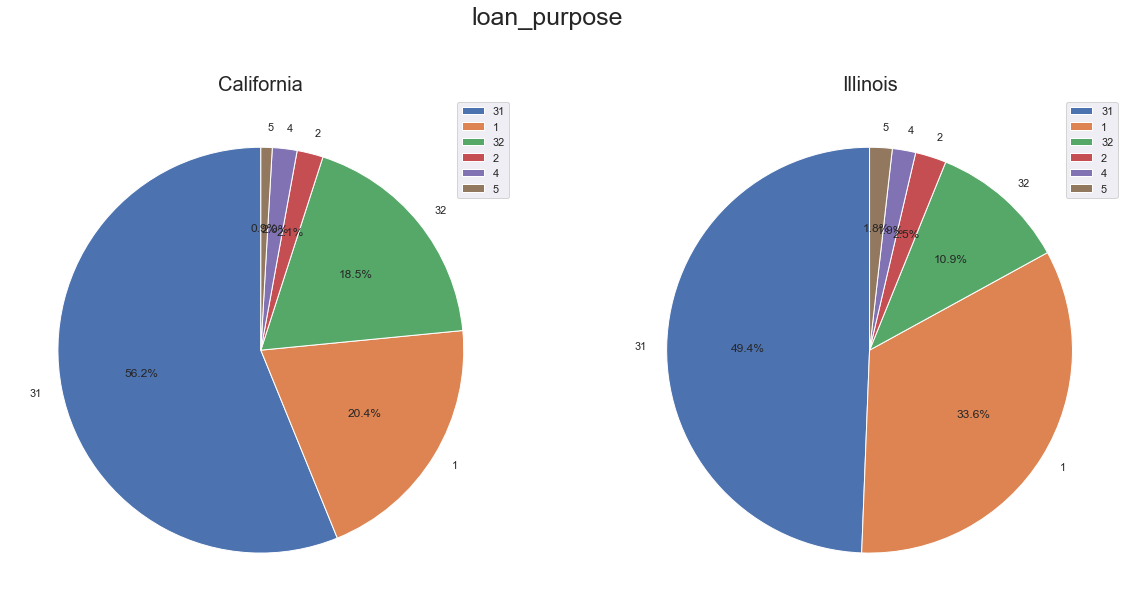

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: lien_status


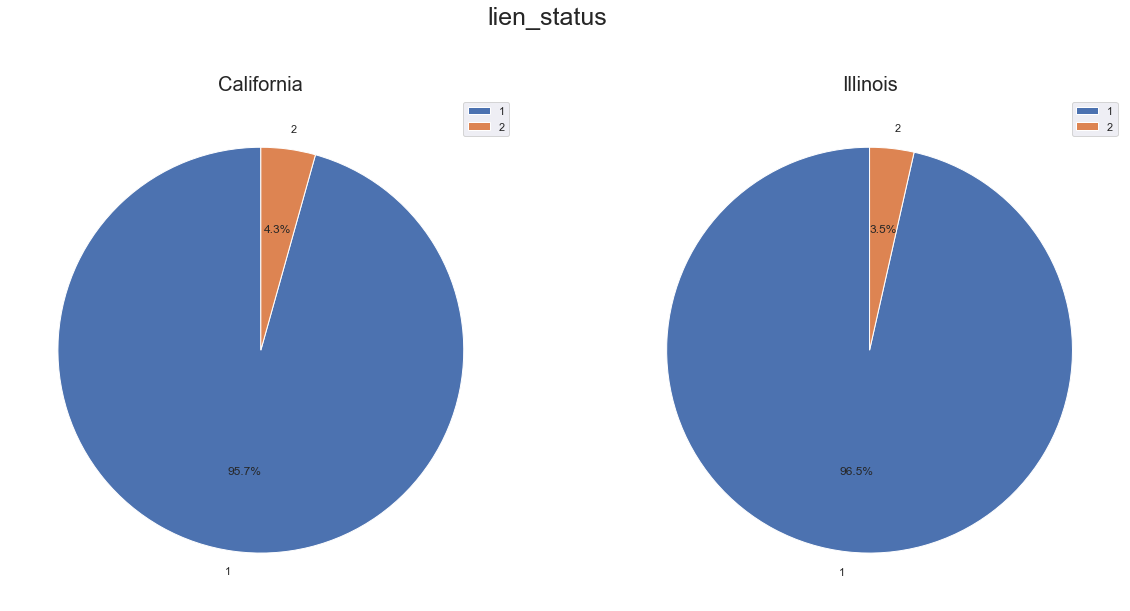

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: reverse_mortgage


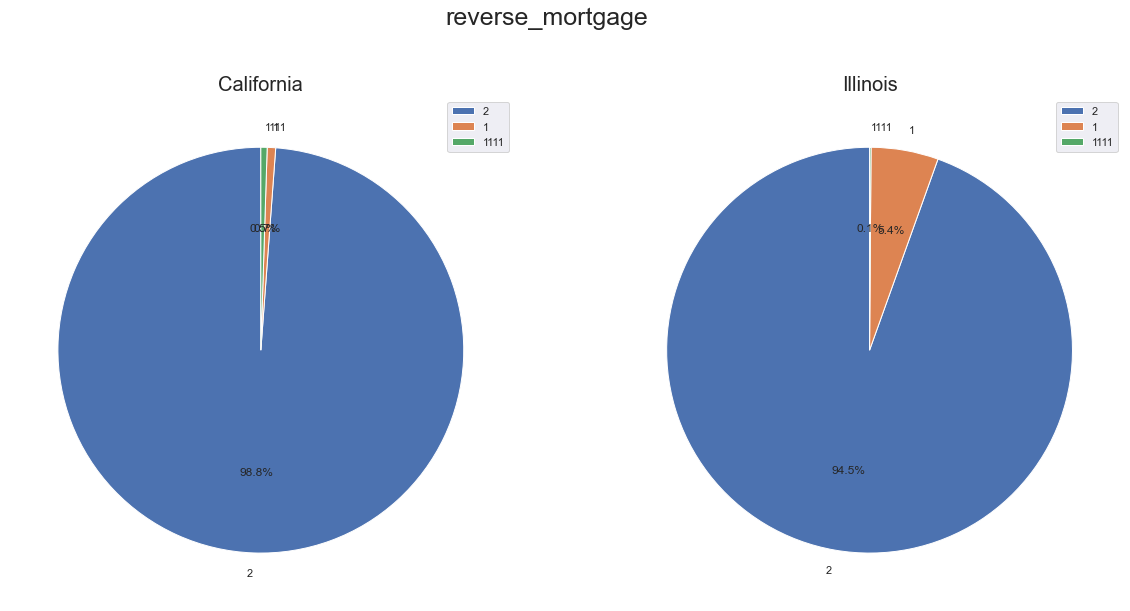

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: open-end_line_of_credit


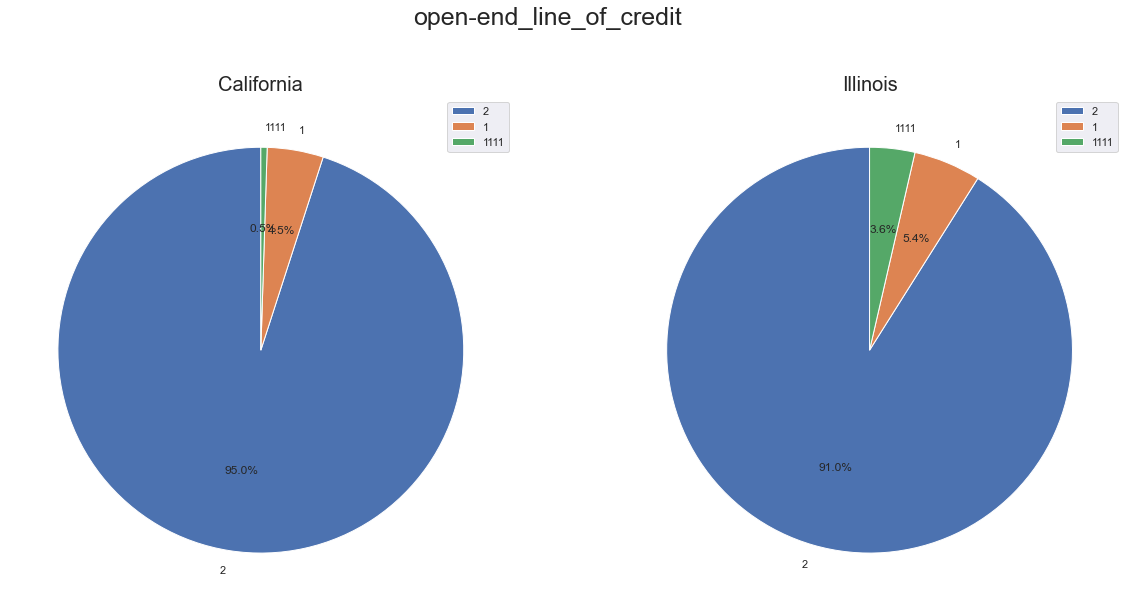

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: business_or_commercial_purpose


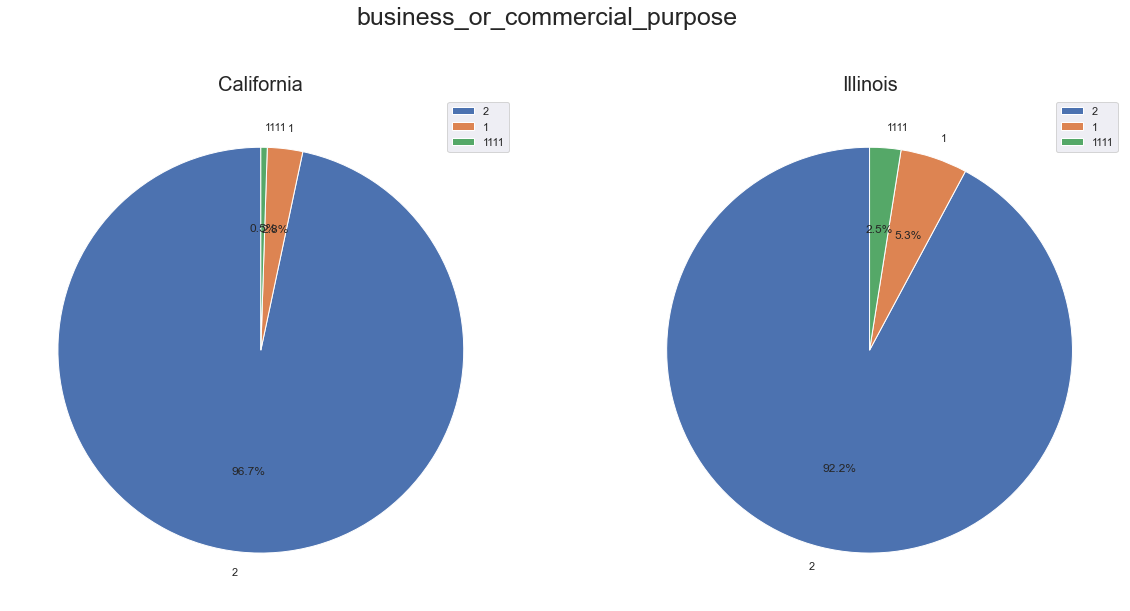

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: hoepa_status


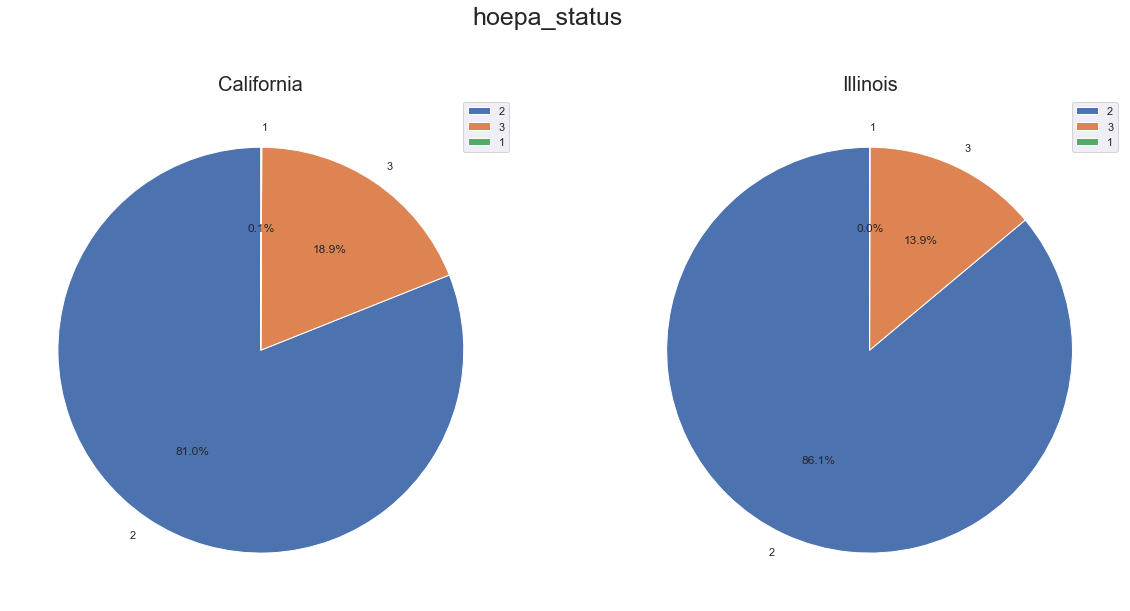

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: negative_amortization


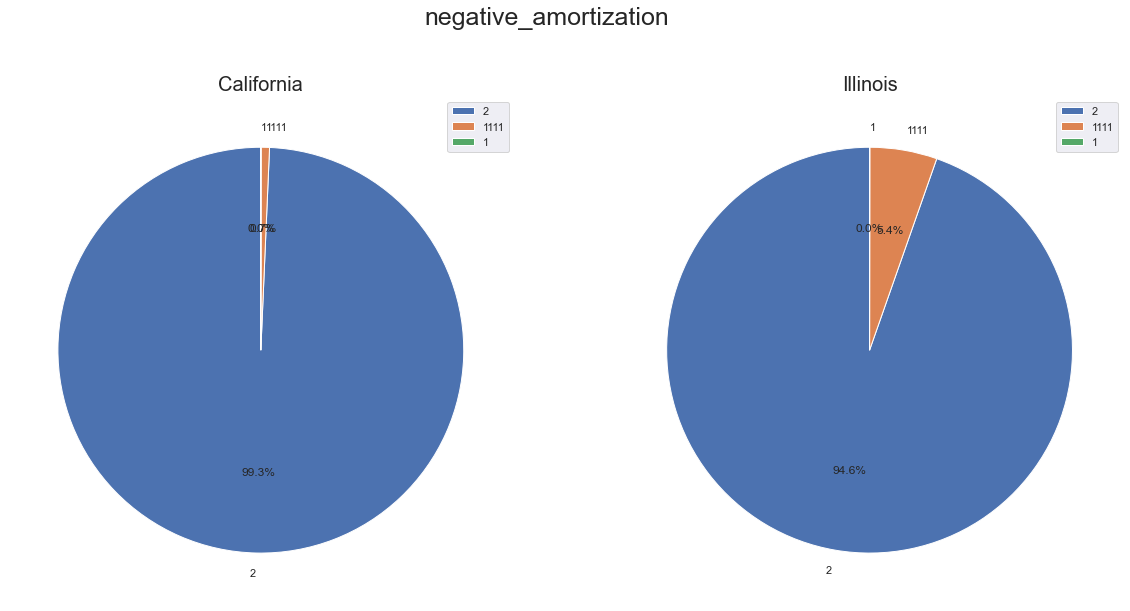

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: interest_only_payment


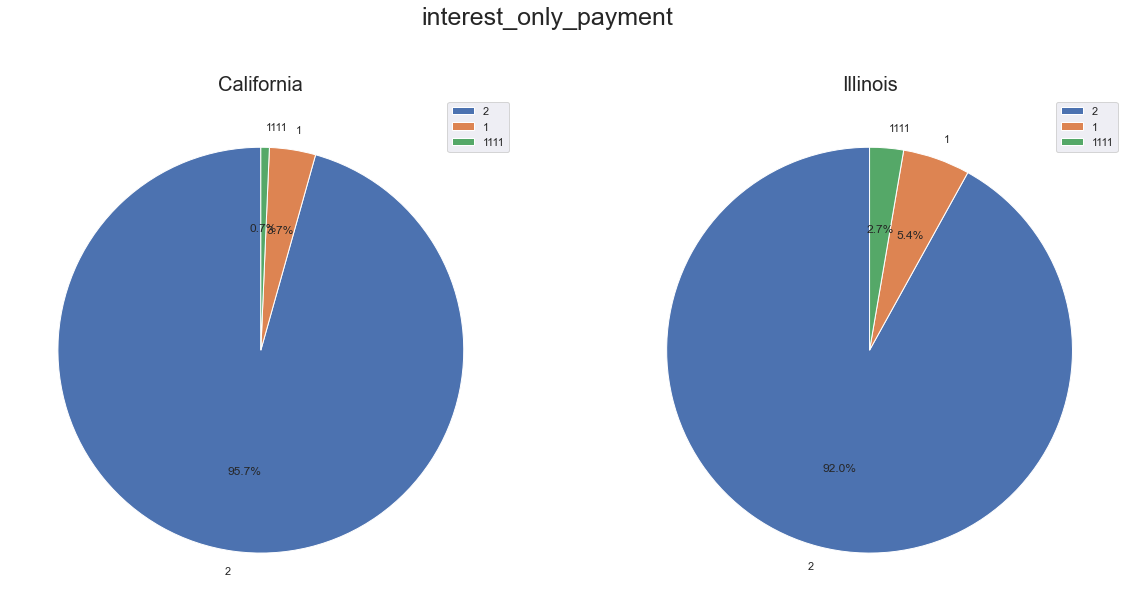

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: balloon_payment


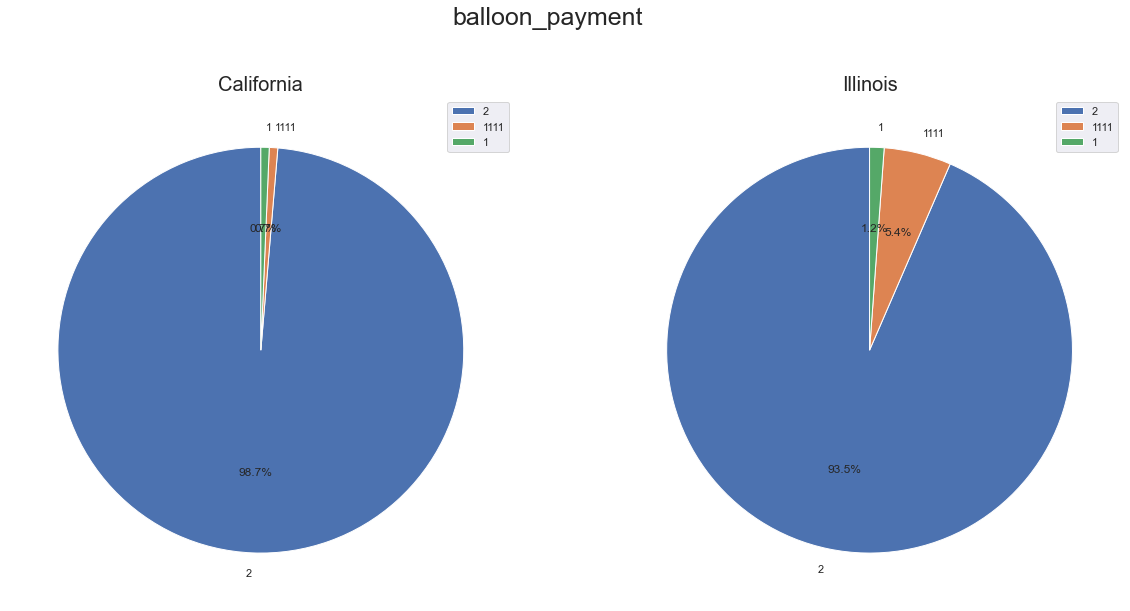

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: other_nonamortizing_features


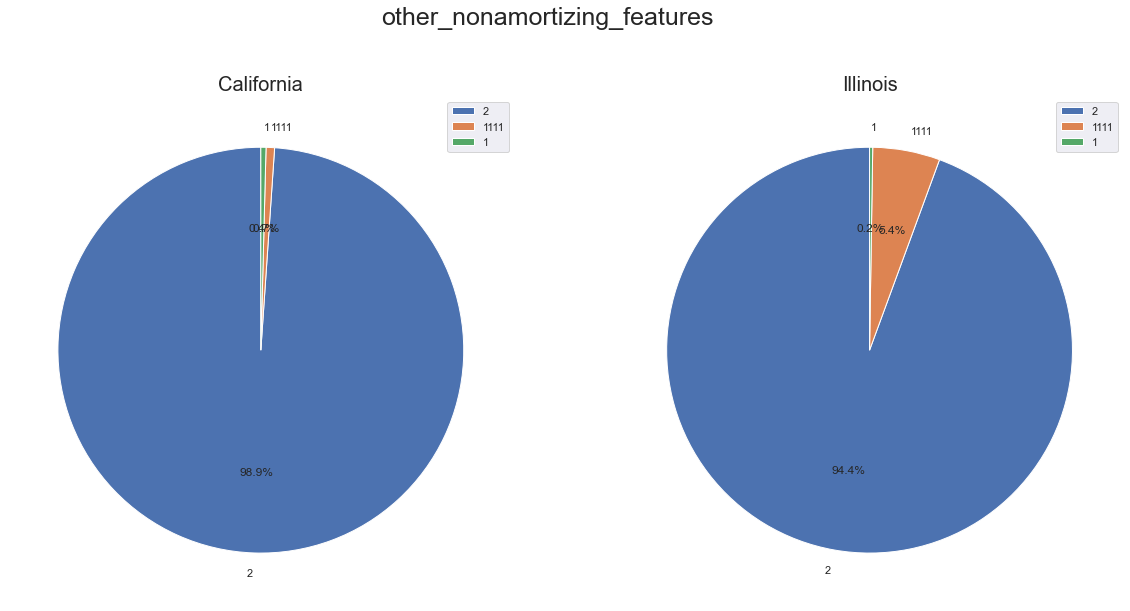

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: construction_method


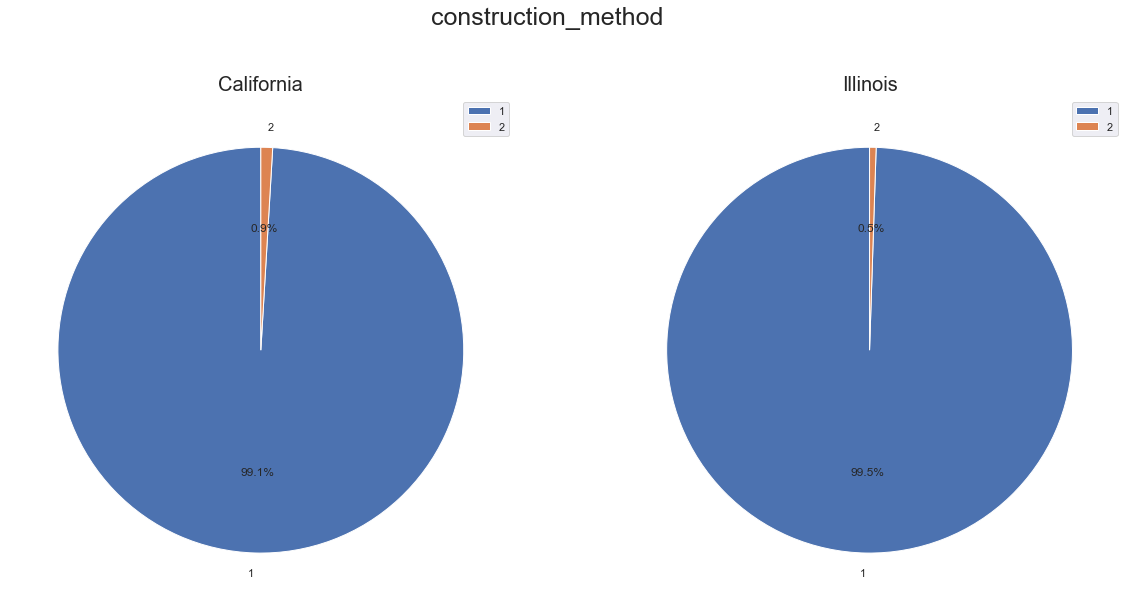

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: occupancy_type


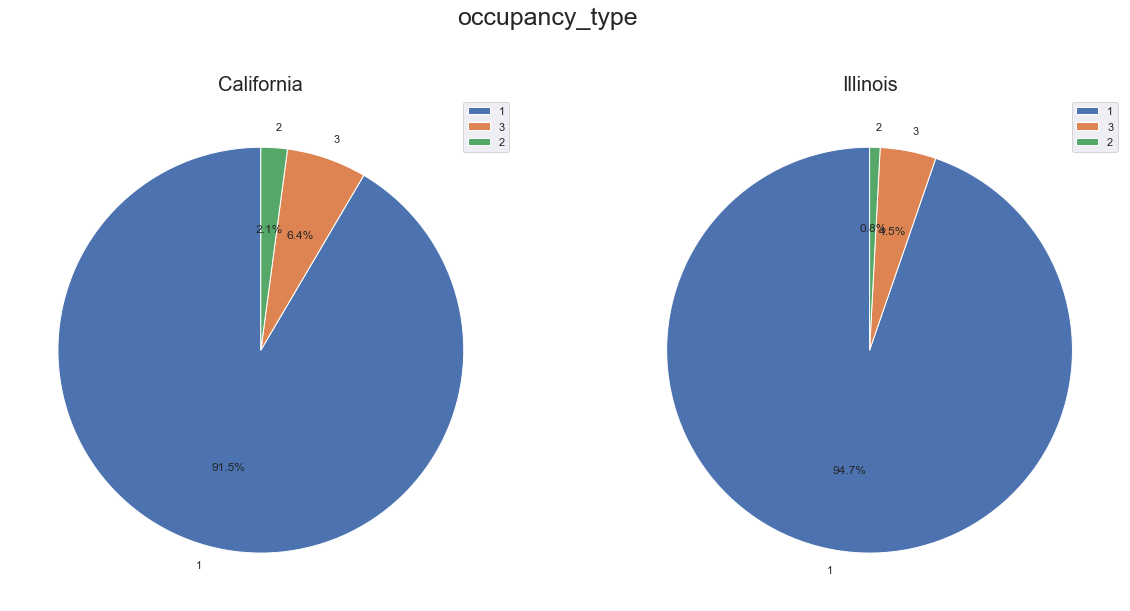

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: manufactured_home_secured_property_type


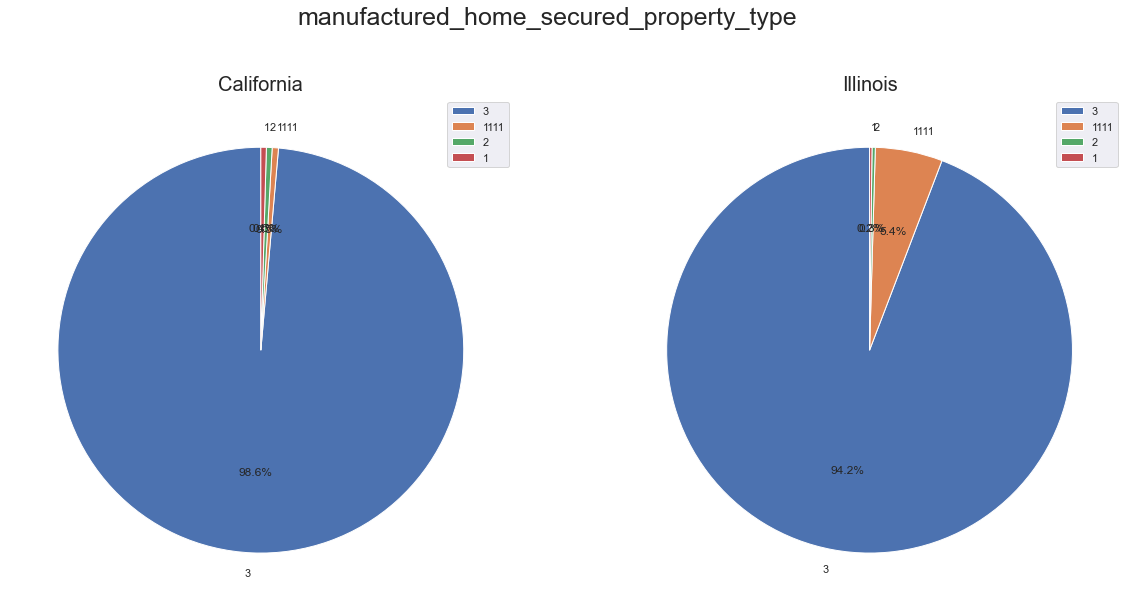

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: manufactured_home_land_property_interest


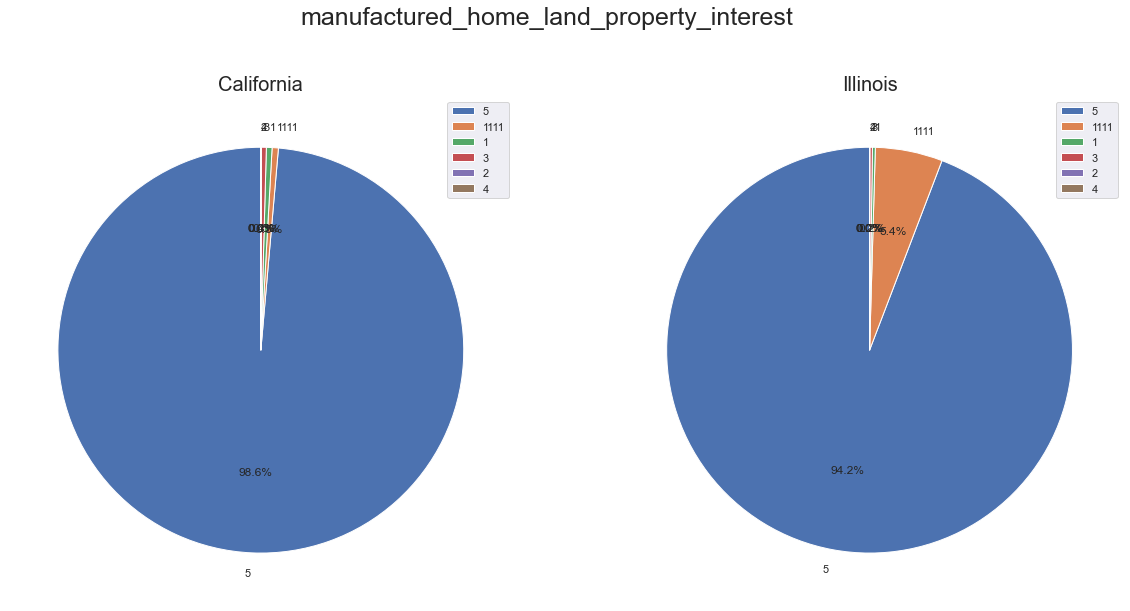

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: total_units


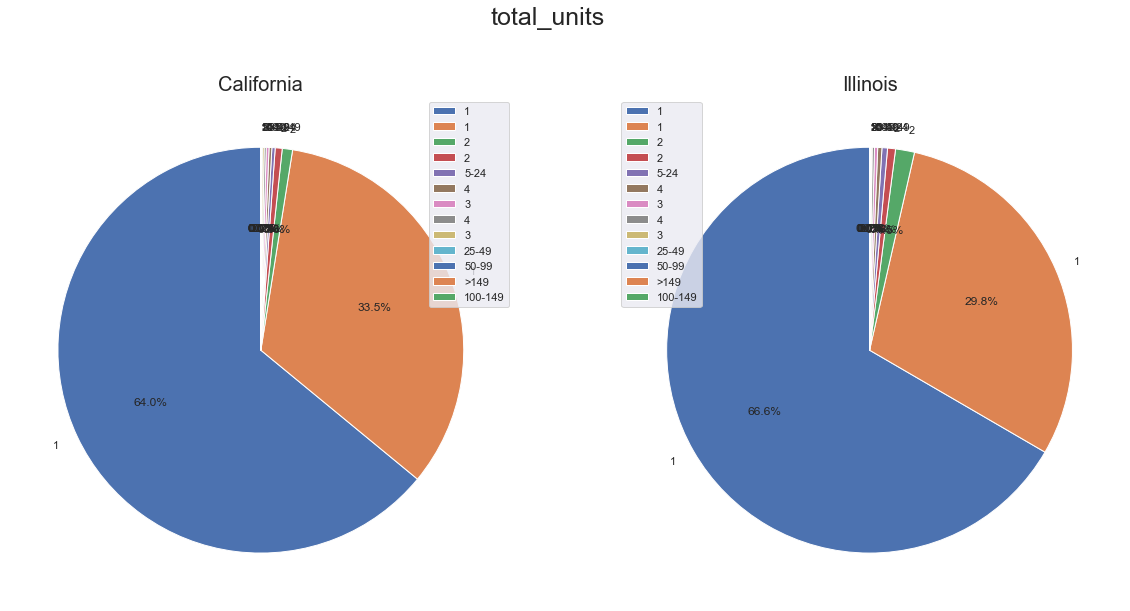

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: debt_to_income_ratio


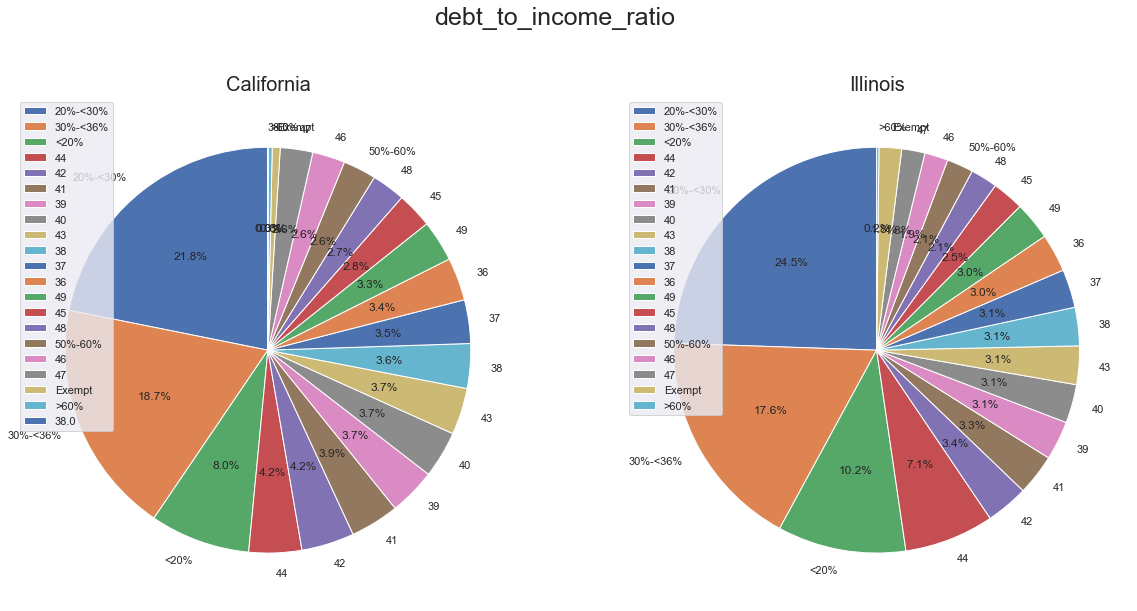

California: 1,861,709    |    Illinois: 492,550


-------------------------------------------------------------------


Variable: applicant_credit_score_type


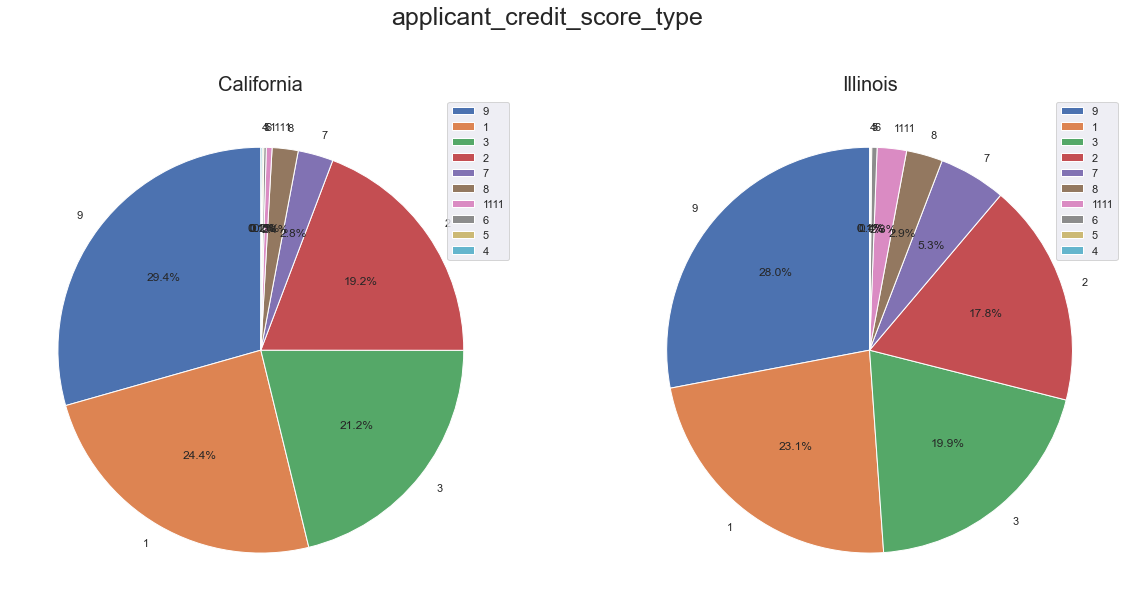

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: co-applicant_credit_score_type


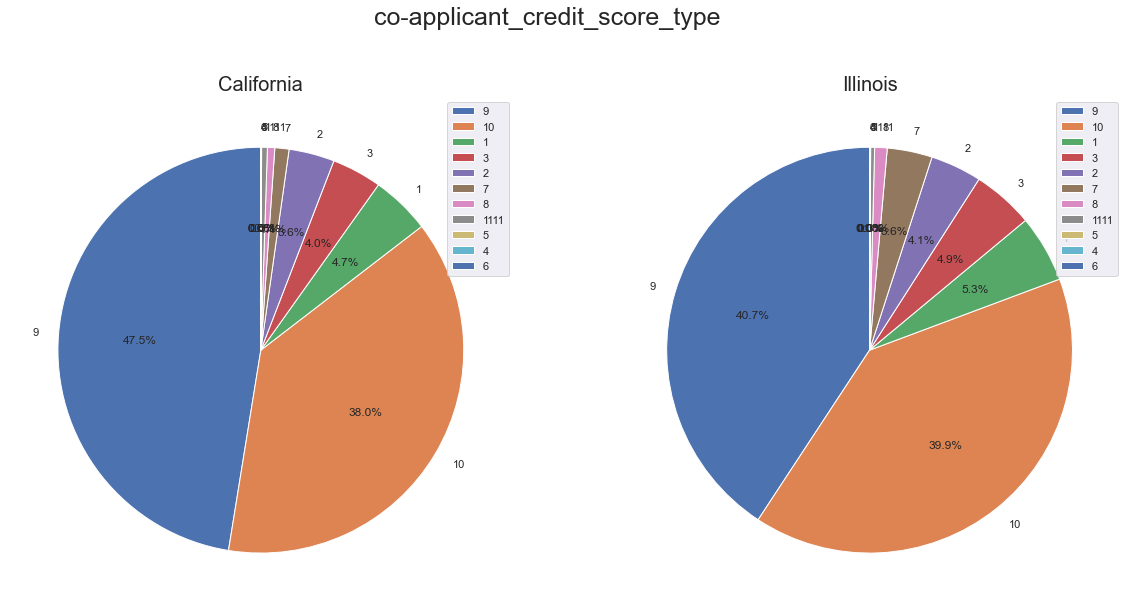

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: applicant_ethnicity-1


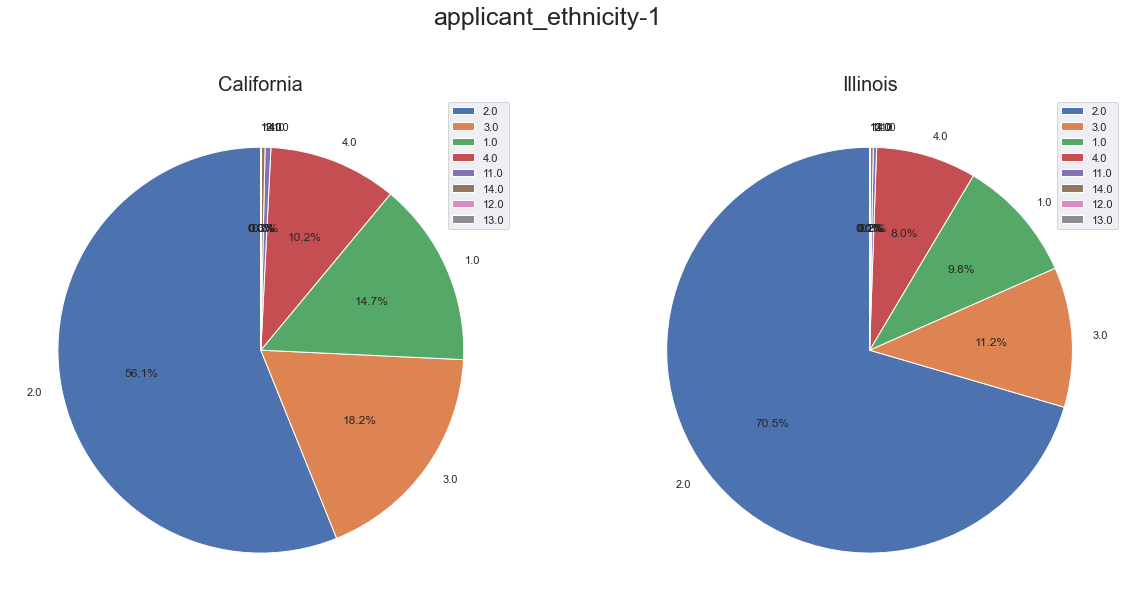

California: 2,583,782    |    Illinois: 662,177


-------------------------------------------------------------------


Variable: applicant_ethnicity-2


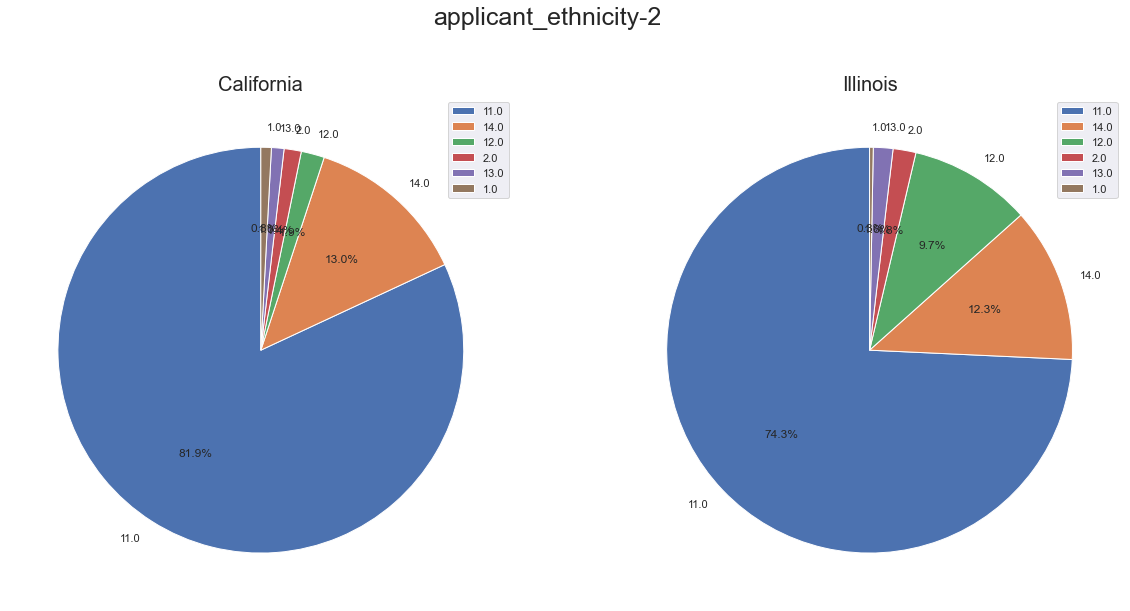

California: 182,378    |    Illinois: 29,488


-------------------------------------------------------------------


Variable: applicant_ethnicity-3


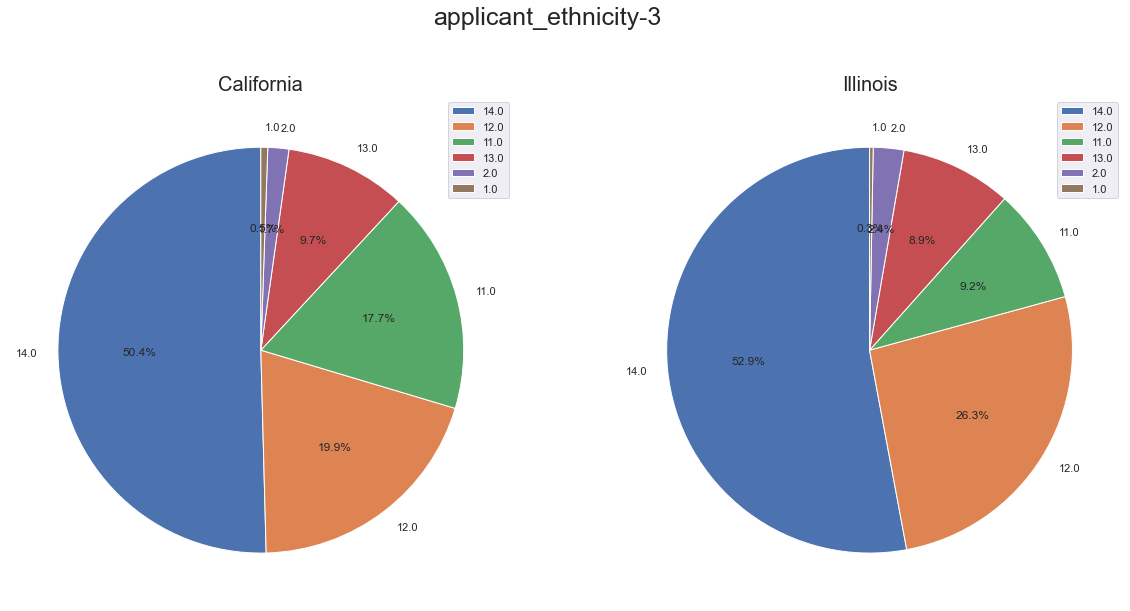

California: 2,747    |    Illinois: 699


-------------------------------------------------------------------


Variable: applicant_ethnicity-4


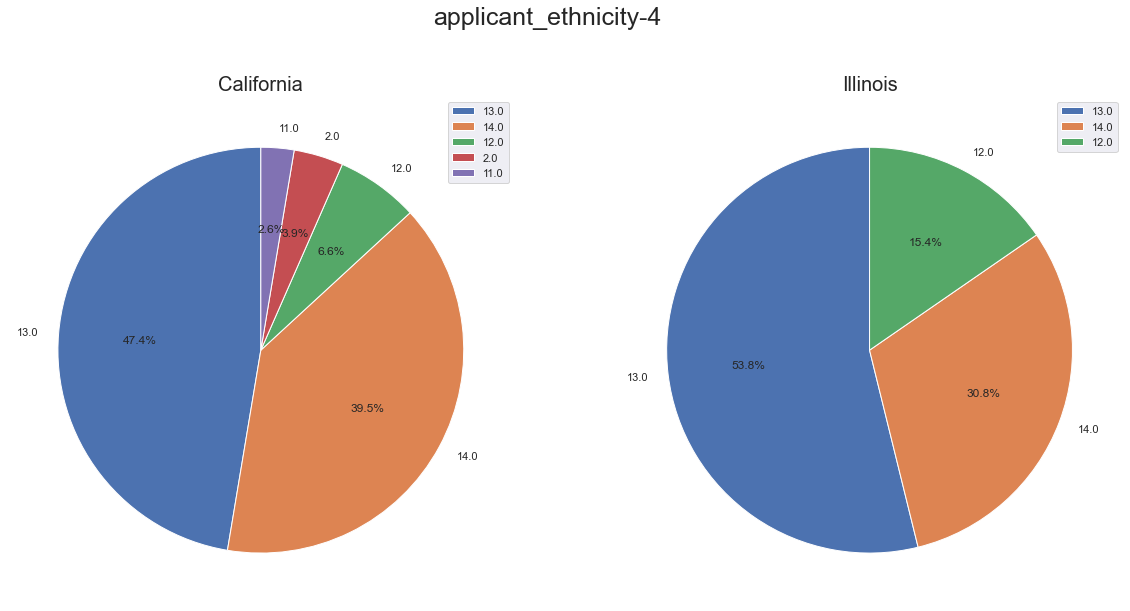

California: 76    |    Illinois: 13


-------------------------------------------------------------------


Variable: applicant_ethnicity-5


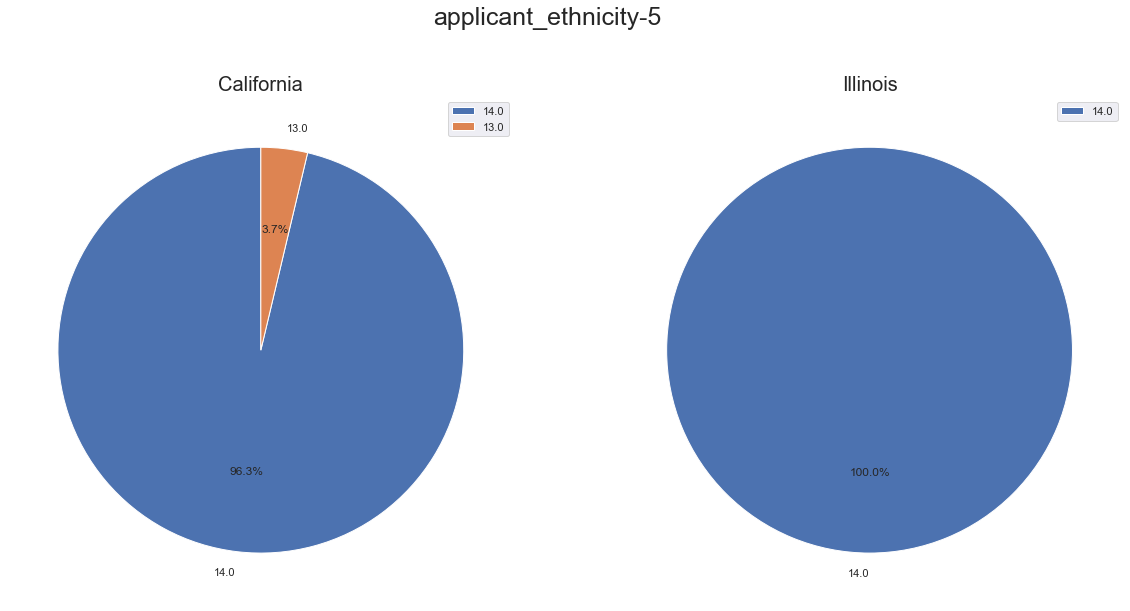

California: 27    |    Illinois: 3


-------------------------------------------------------------------


Variable: co-applicant_ethnicity-1


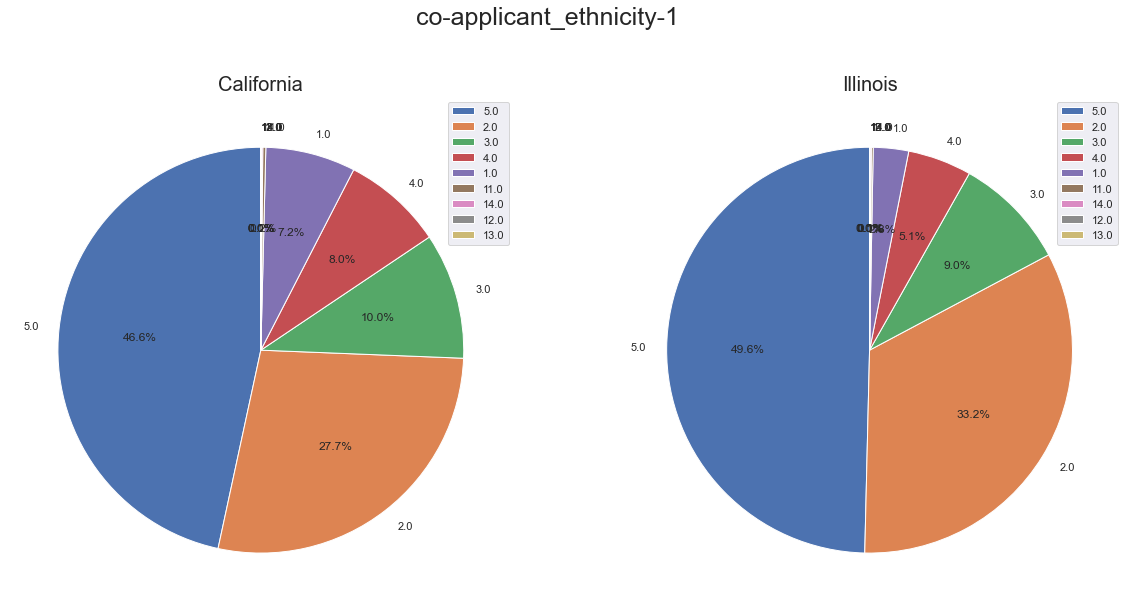

California: 2,584,073    |    Illinois: 662,216


-------------------------------------------------------------------


Variable: co-applicant_ethnicity-2


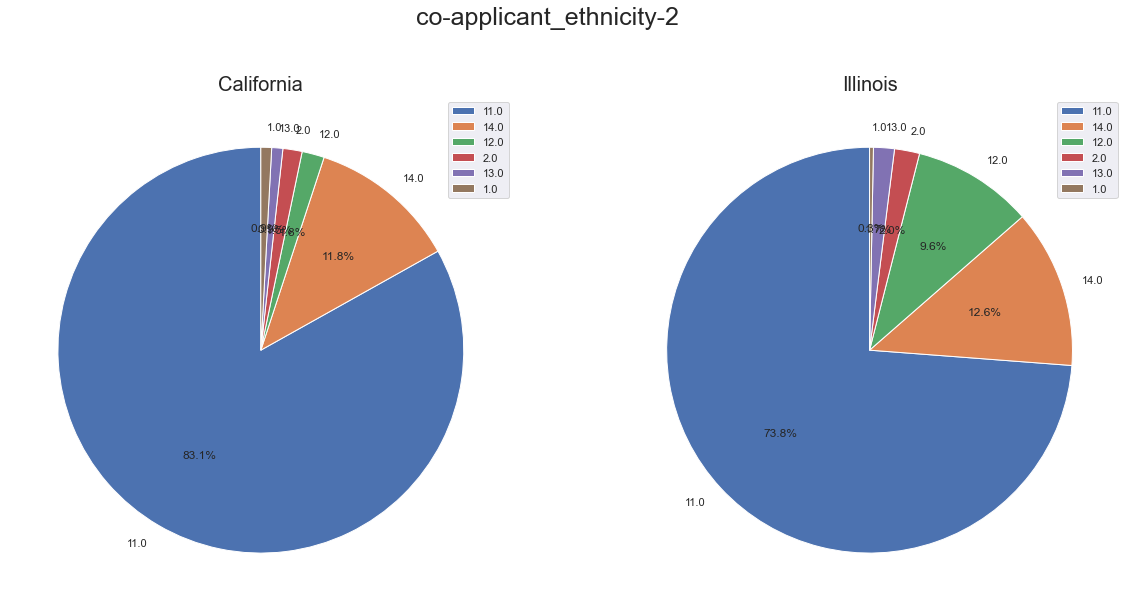

California: 87,499    |    Illinois: 9,865


-------------------------------------------------------------------


Variable: co-applicant_ethnicity-3


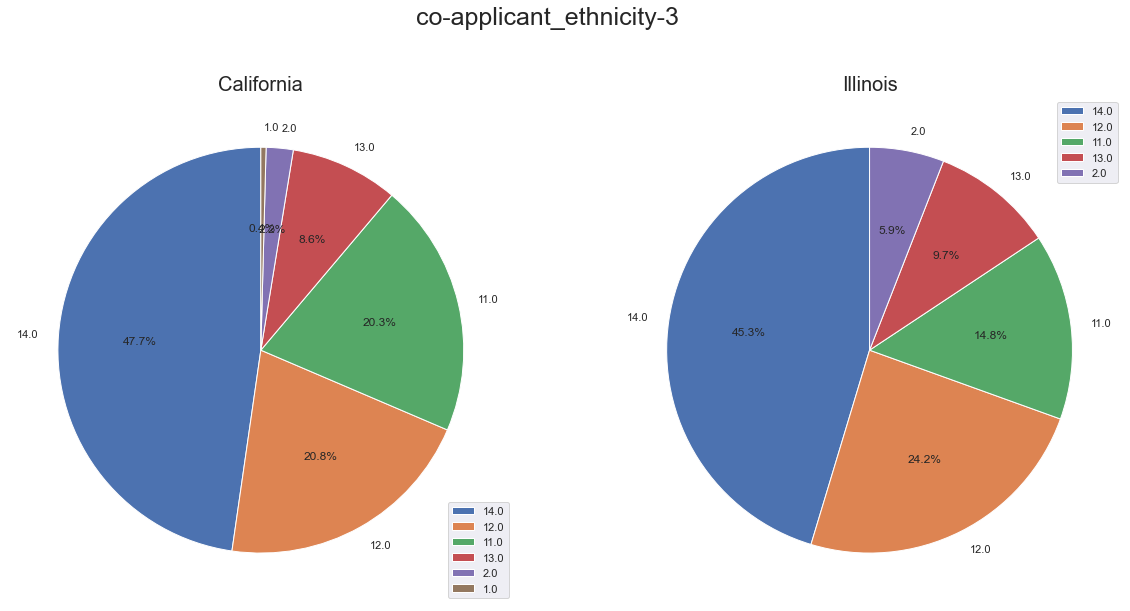

California: 1,209    |    Illinois: 236


-------------------------------------------------------------------


Variable: co-applicant_ethnicity-4


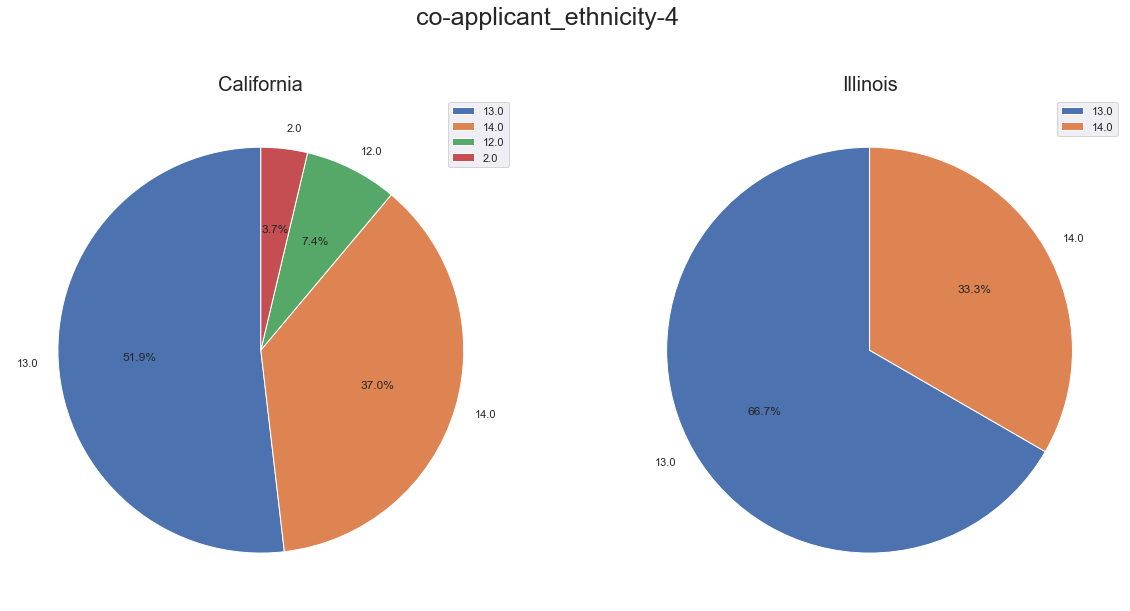

<ipython-input-21-a75e859f6fcb>:29: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax2.pie(value2, labels = index2, autopct='%1.1f%%', startangle = 90)
No handles with labels found to put in legend.


California: 27    |    Illinois: 3


-------------------------------------------------------------------


Variable: co-applicant_ethnicity-5


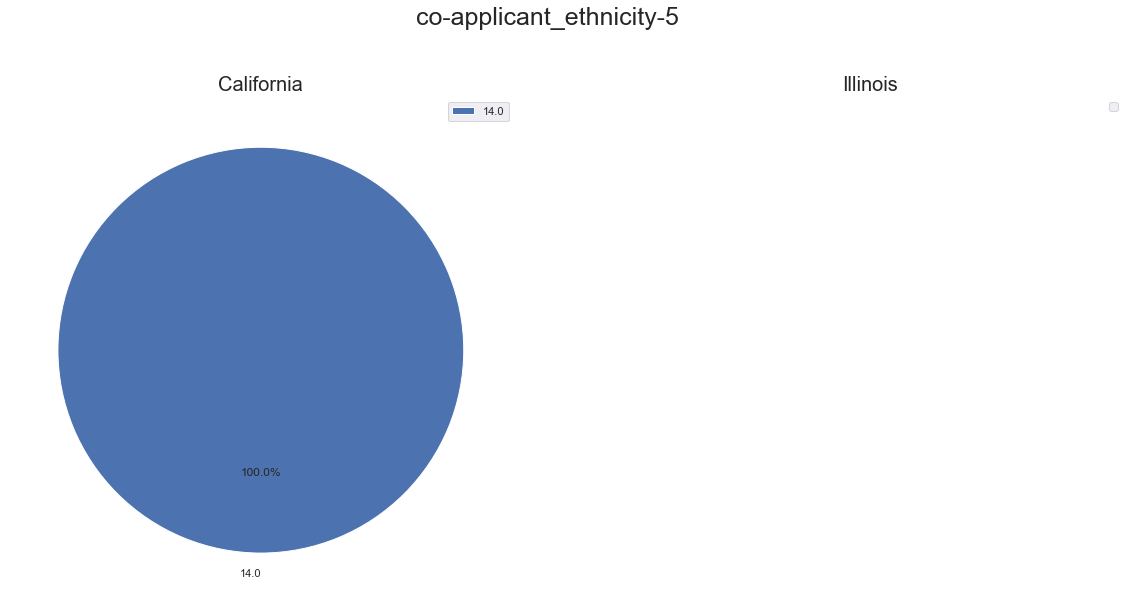

California: 12    |    Illinois: 0


-------------------------------------------------------------------


Variable: applicant_ethnicity_observed


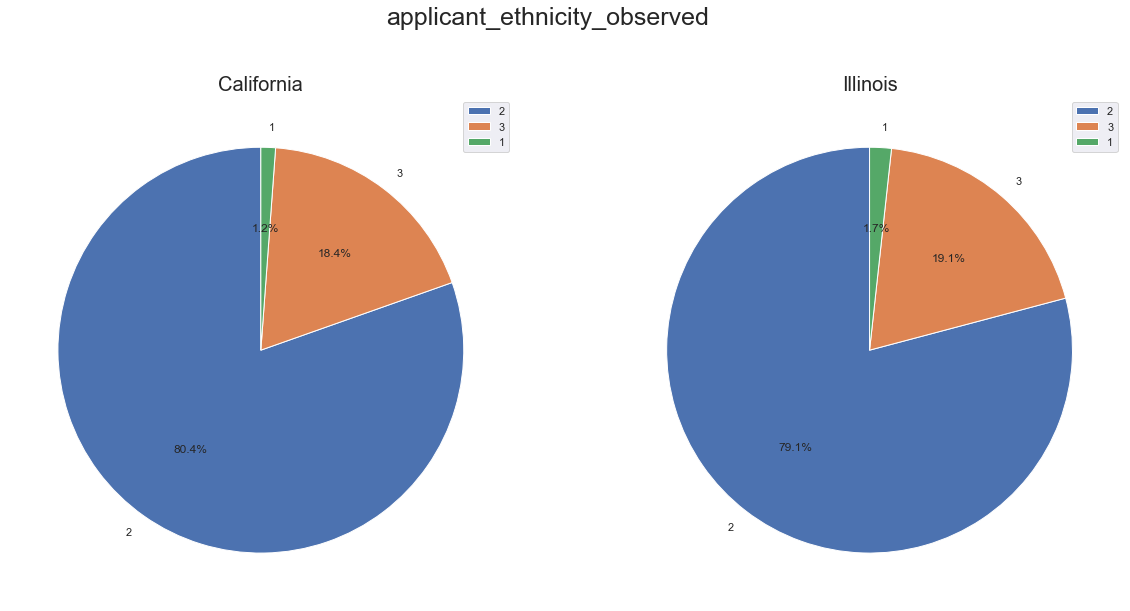

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: co-applicant_ethnicity_observed


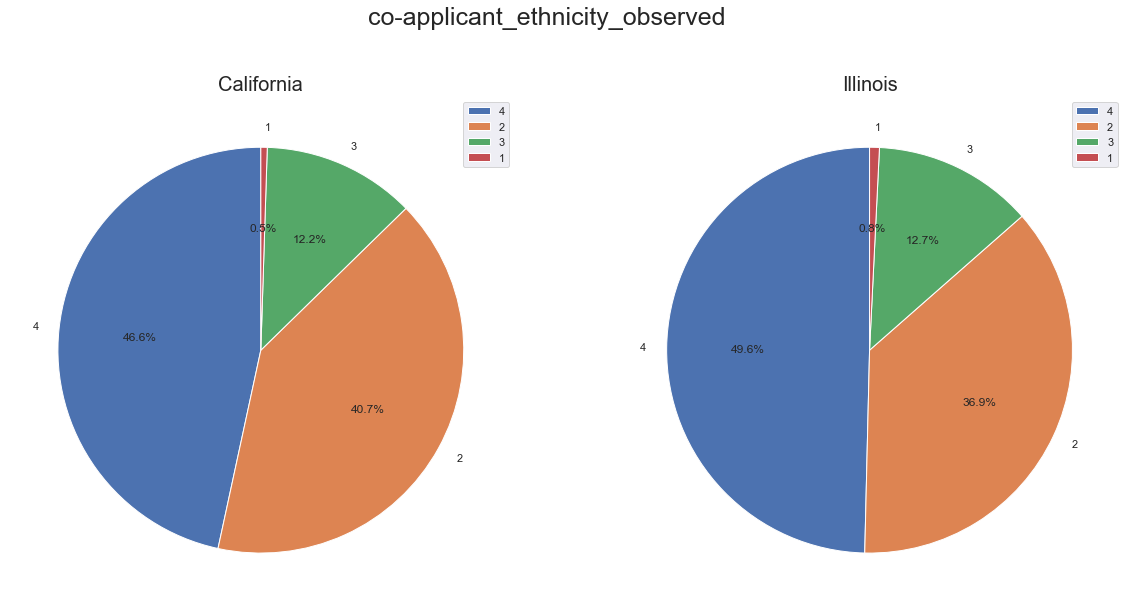

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: applicant_race-1


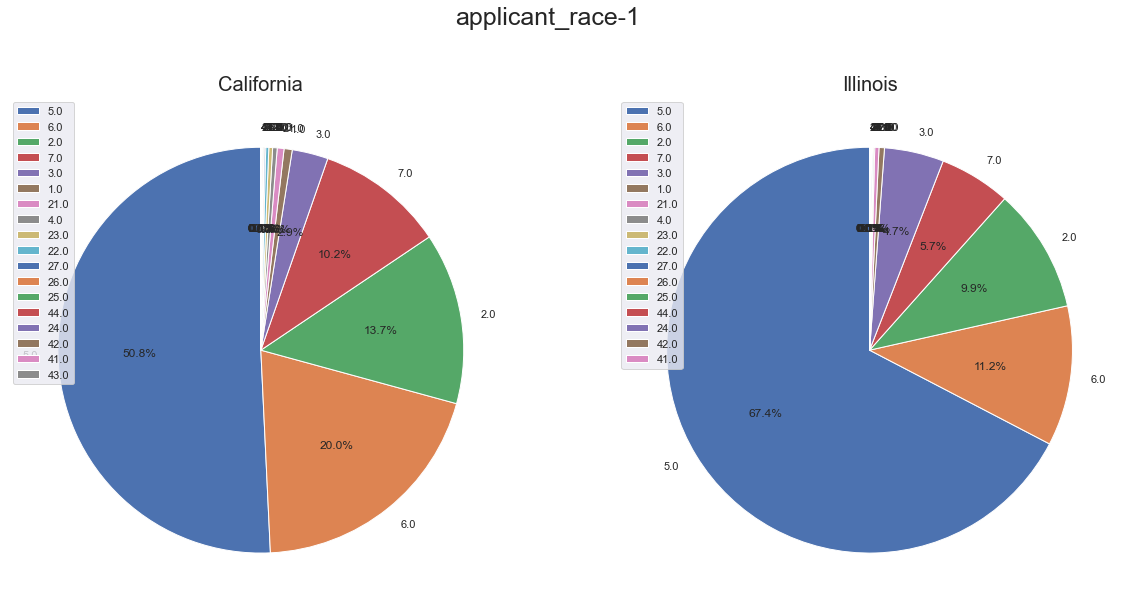

California: 2,584,061    |    Illinois: 662,220


-------------------------------------------------------------------


Variable: applicant_race-2


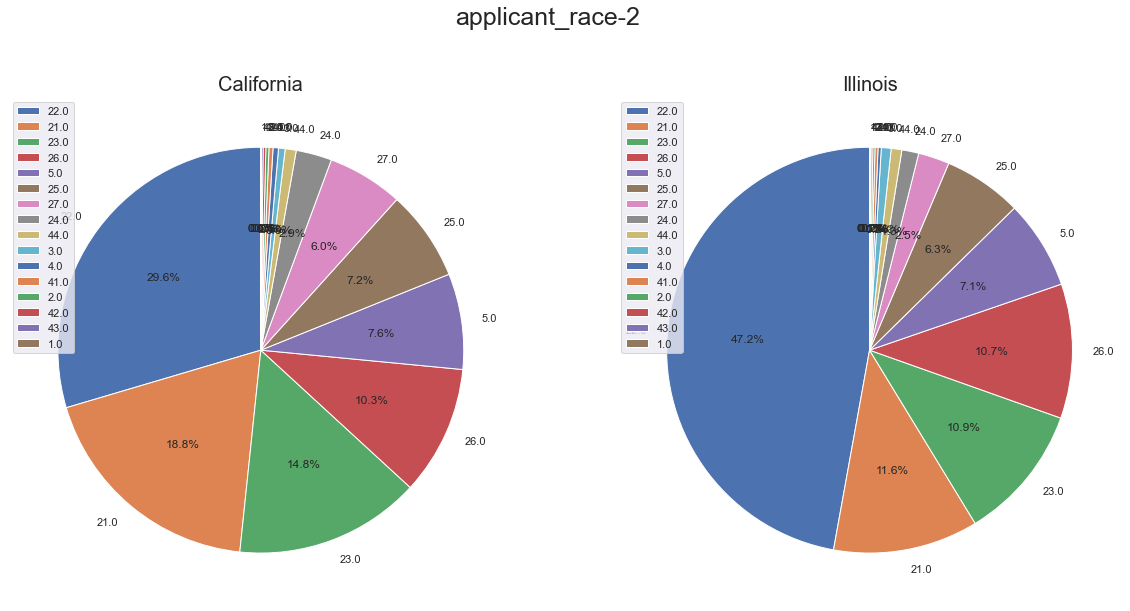

California: 252,261    |    Illinois: 28,249


-------------------------------------------------------------------


Variable: applicant_race-3


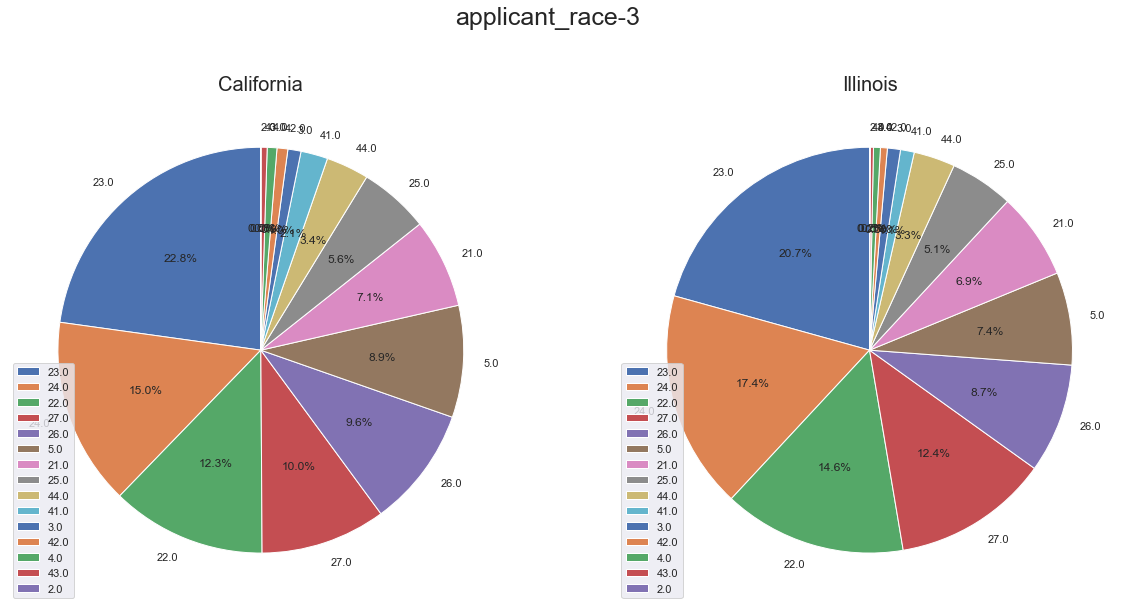

California: 13,222    |    Illinois: 1,639


-------------------------------------------------------------------


Variable: applicant_race-4


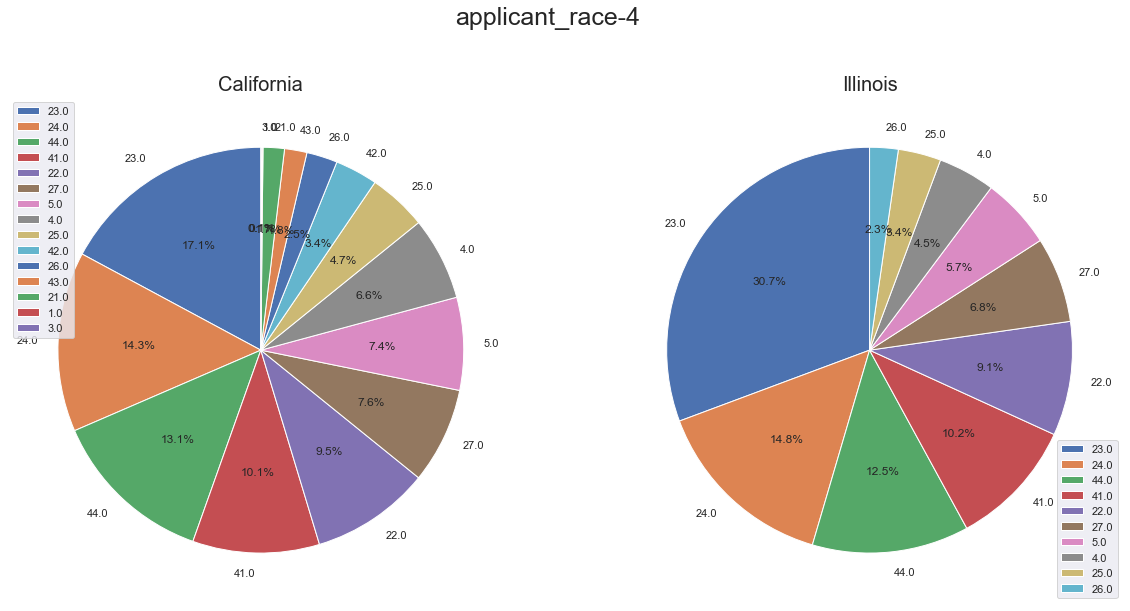

California: 1,178    |    Illinois: 88


-------------------------------------------------------------------


Variable: applicant_race-5


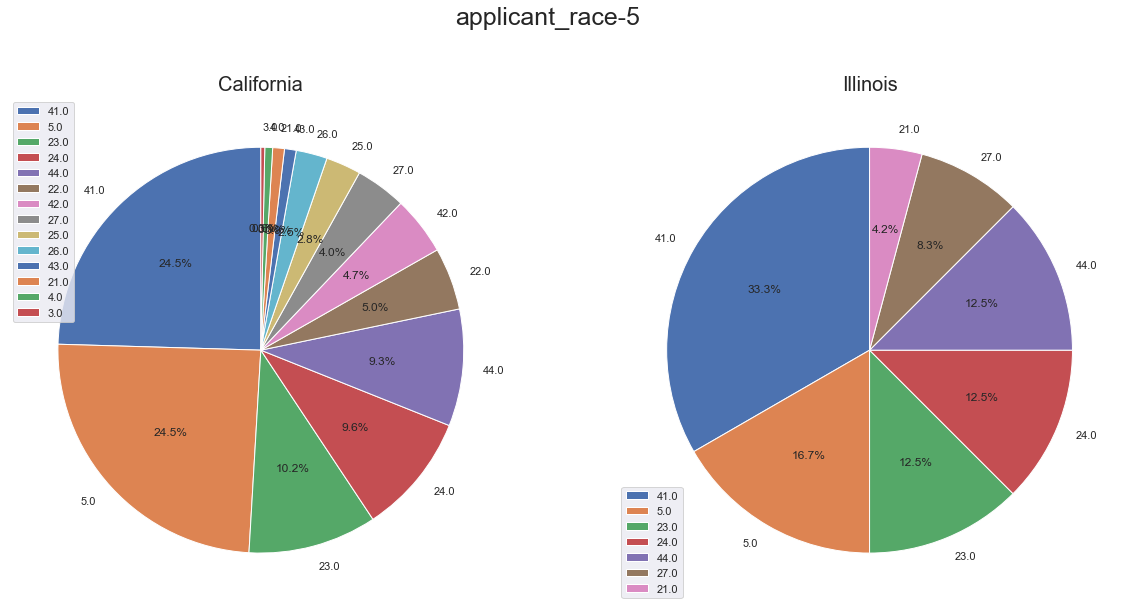

California: 322    |    Illinois: 24


-------------------------------------------------------------------


Variable: co-applicant_race-1


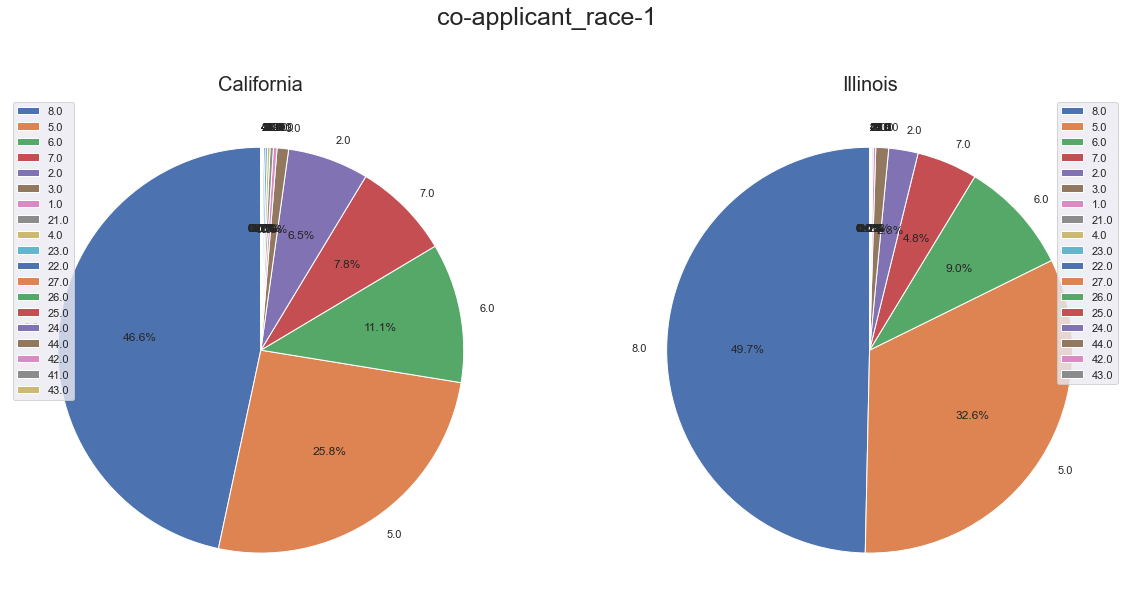

California: 2,584,158    |    Illinois: 662,225


-------------------------------------------------------------------


Variable: co-applicant_race-2


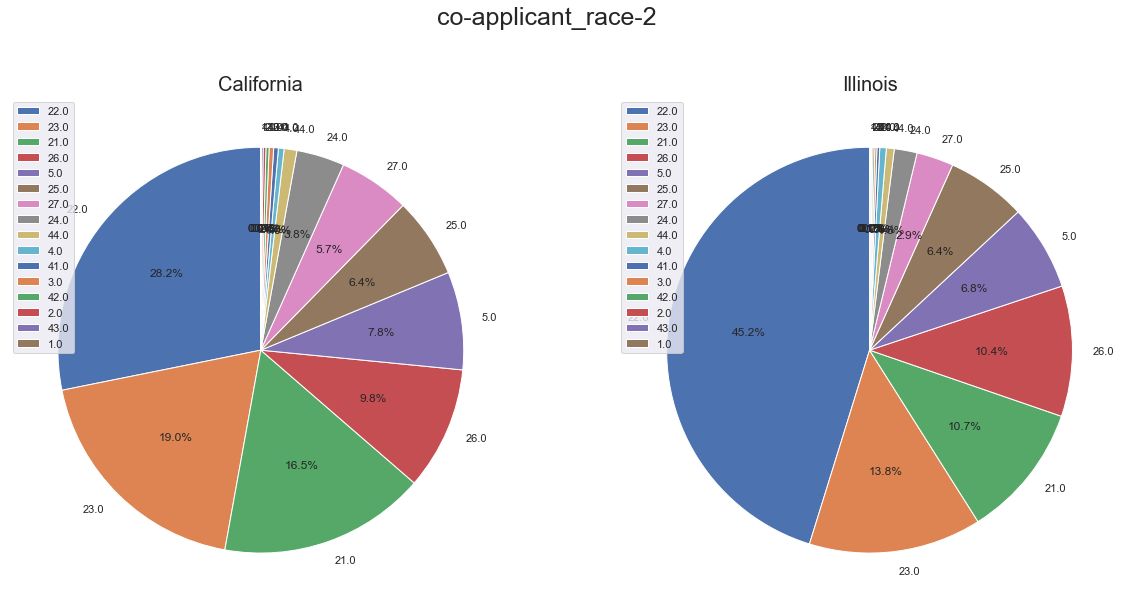

California: 115,837    |    Illinois: 10,835


-------------------------------------------------------------------


Variable: co-applicant_race-3


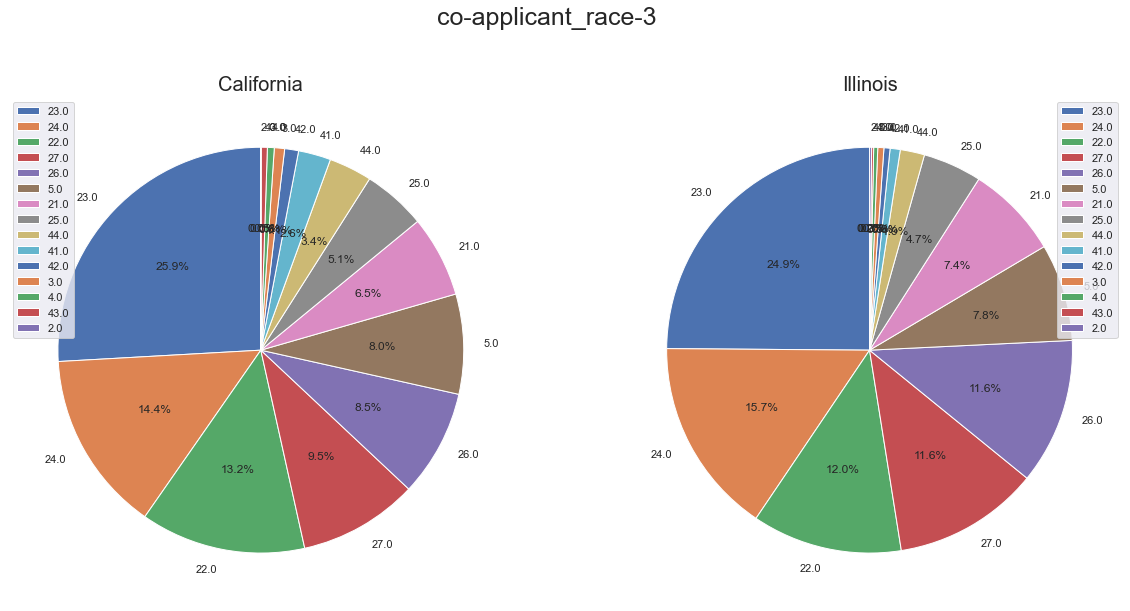

California: 6,233    |    Illinois: 619


-------------------------------------------------------------------


Variable: co-applicant_race-4


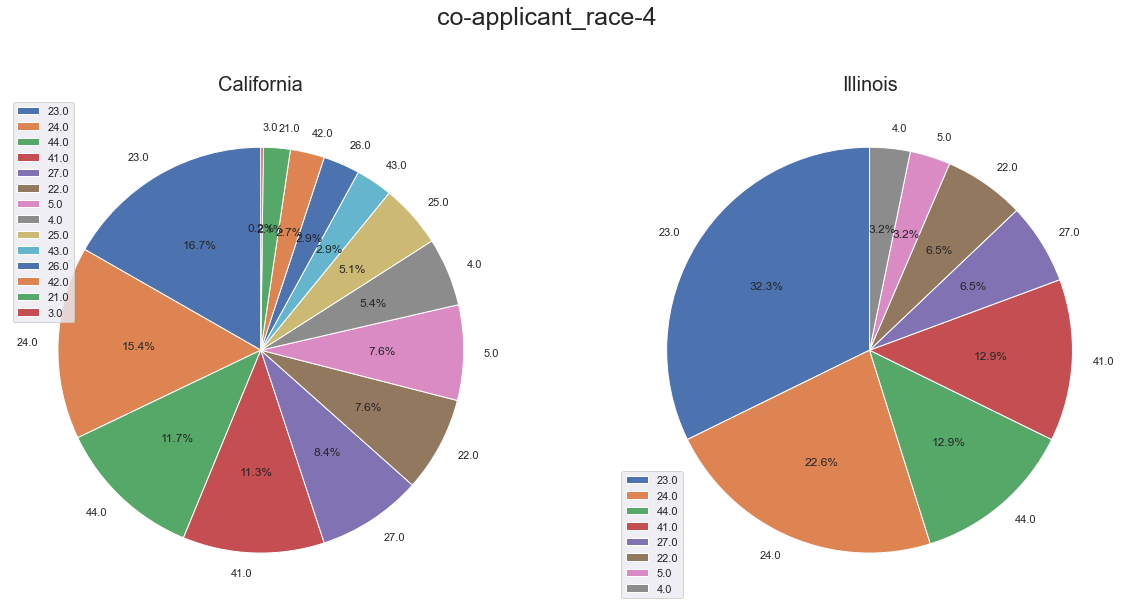

California: 514    |    Illinois: 31


-------------------------------------------------------------------


Variable: co-applicant_race-5


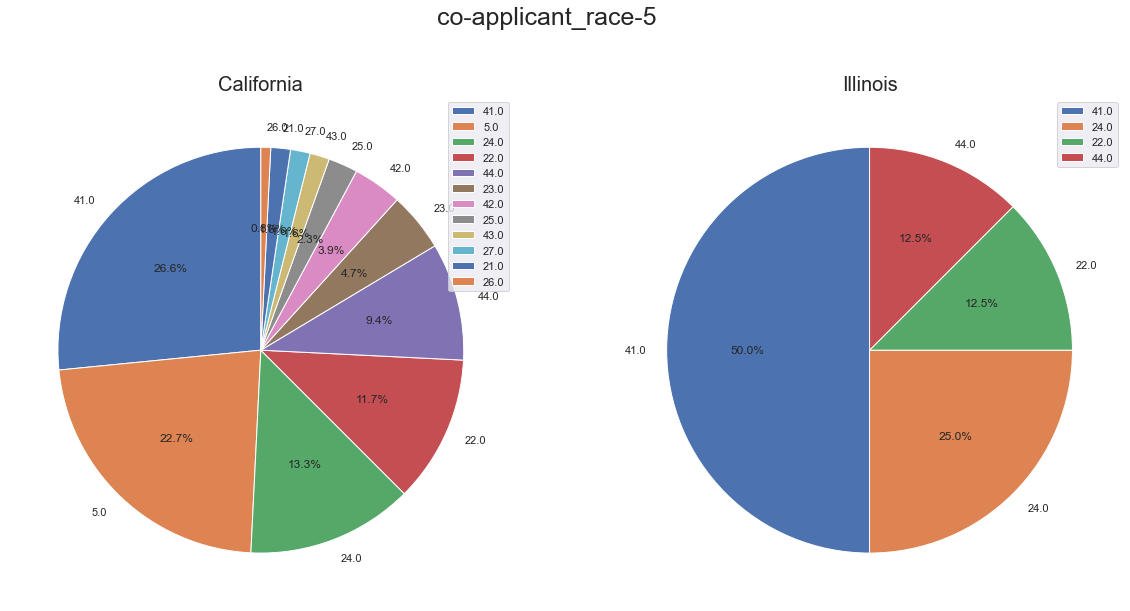

California: 128    |    Illinois: 8


-------------------------------------------------------------------


Variable: applicant_race_observed


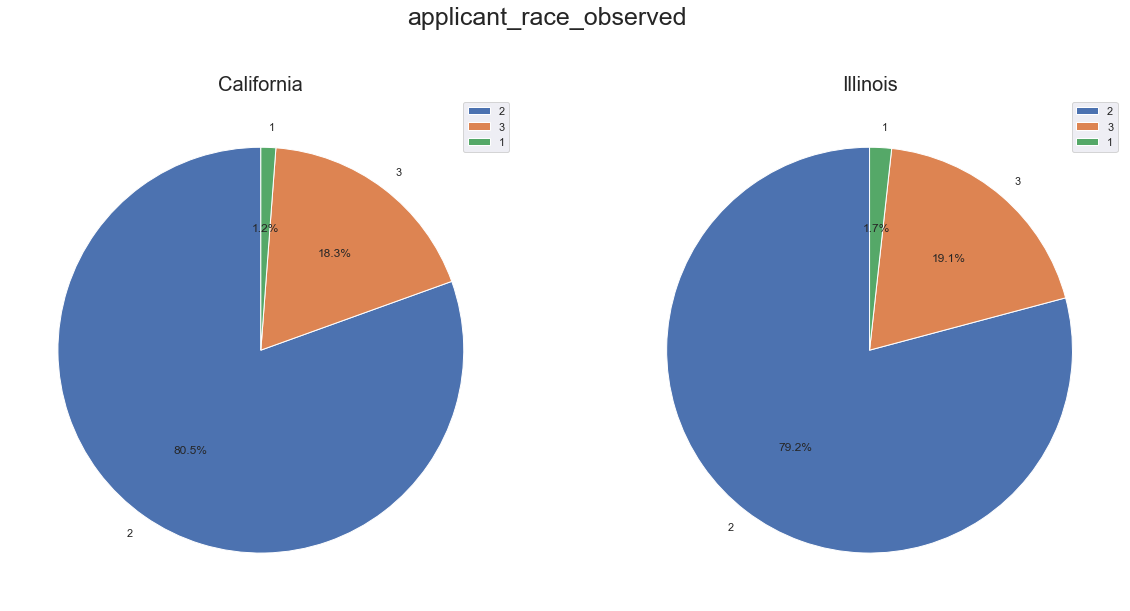

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: co-applicant_race_observed


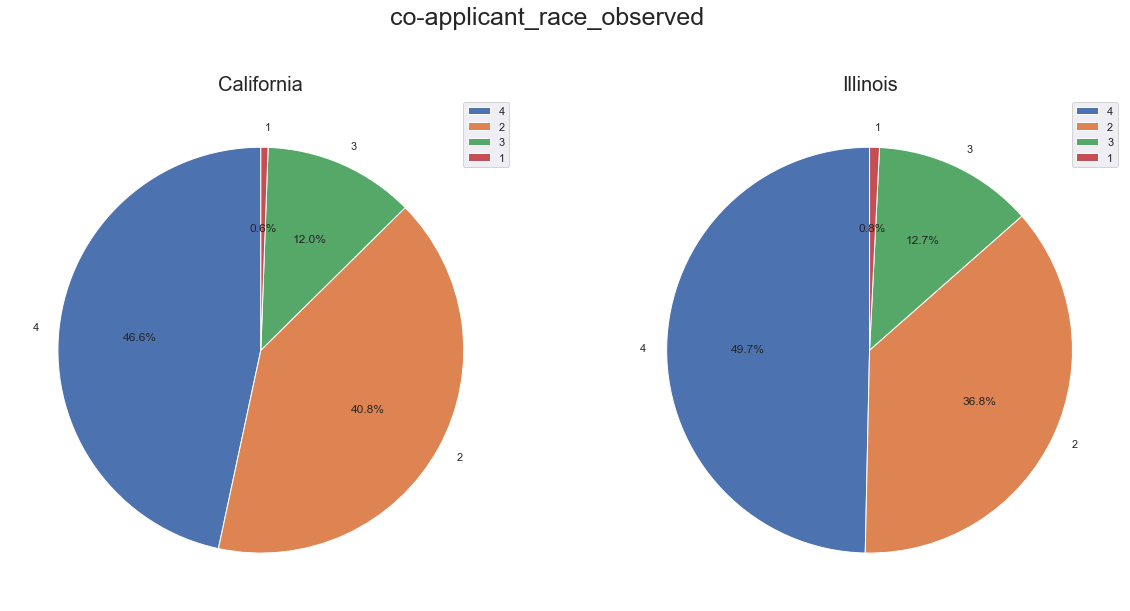

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: applicant_sex


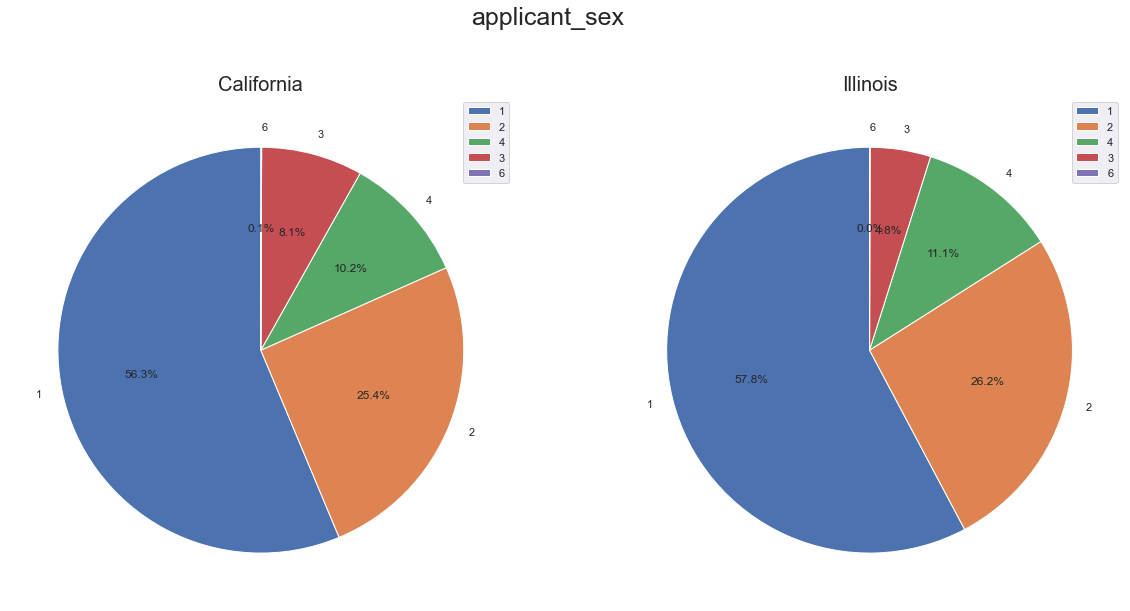

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: co-applicant_sex


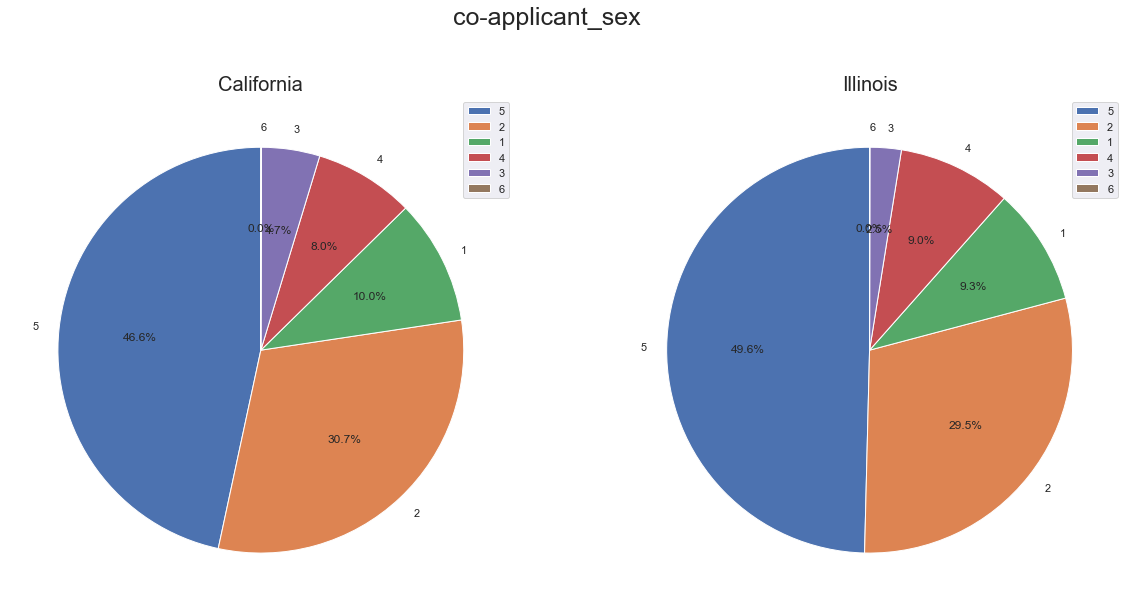

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: applicant_sex_observed


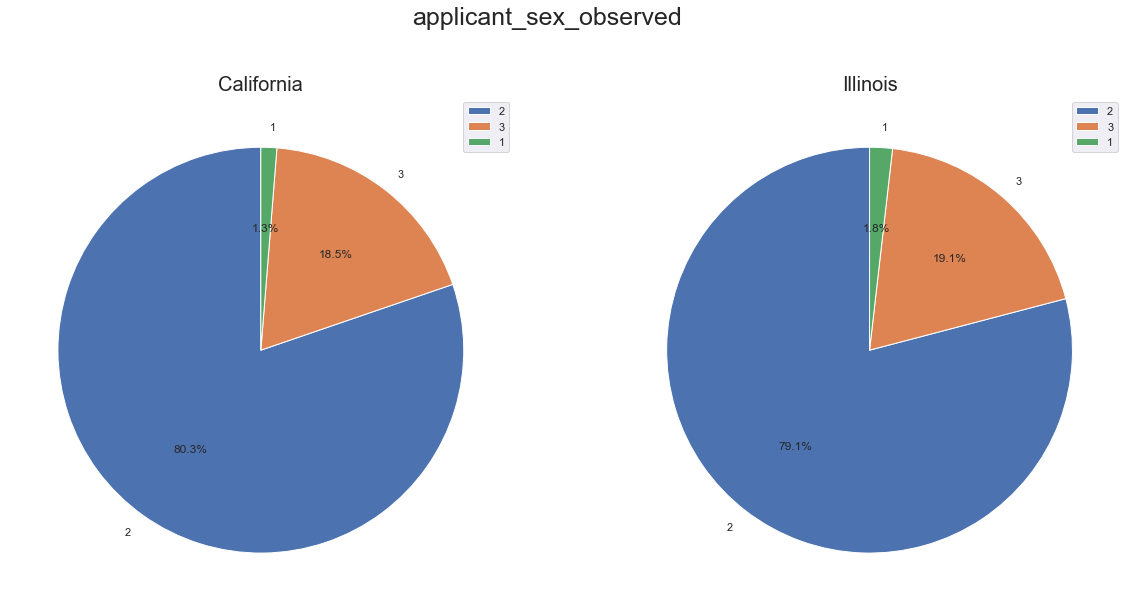

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: co-applicant_sex_observed


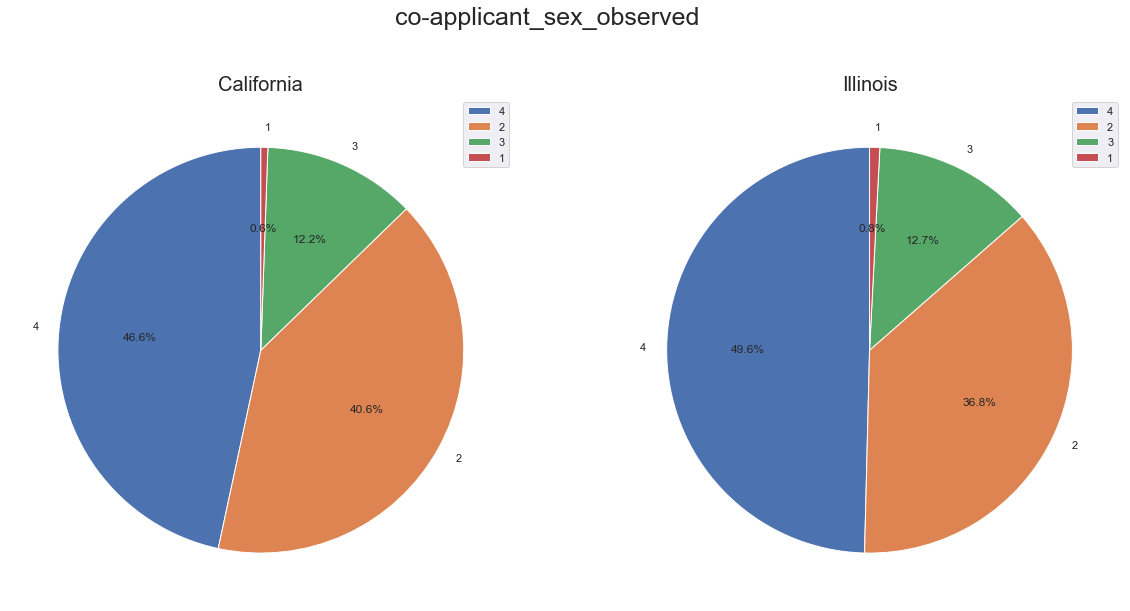

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: applicant_age


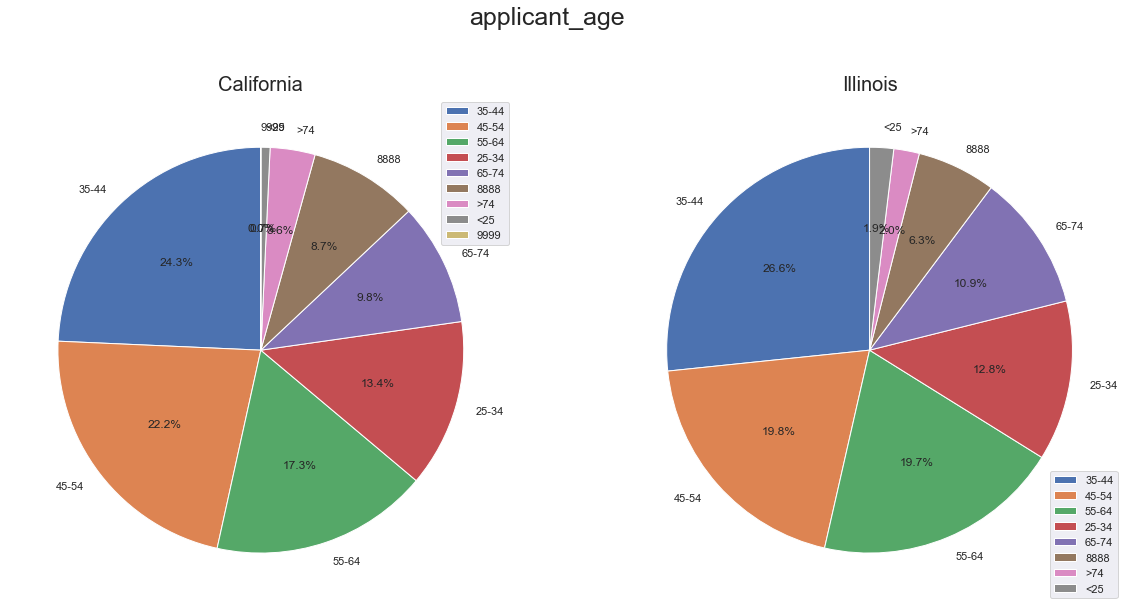

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: co-applicant_age


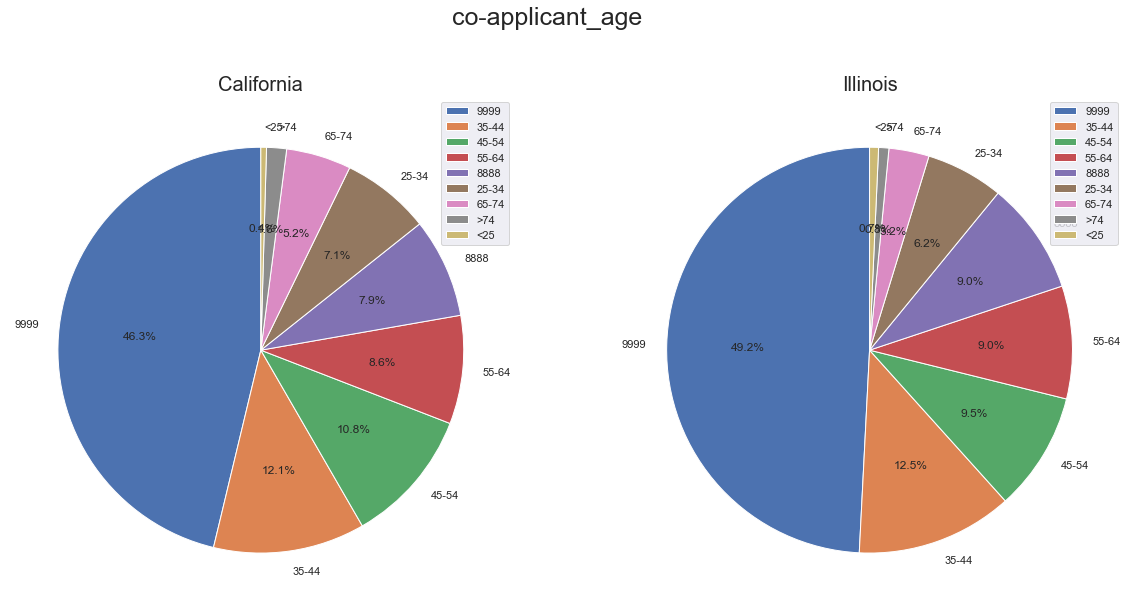

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: applicant_age_above_62


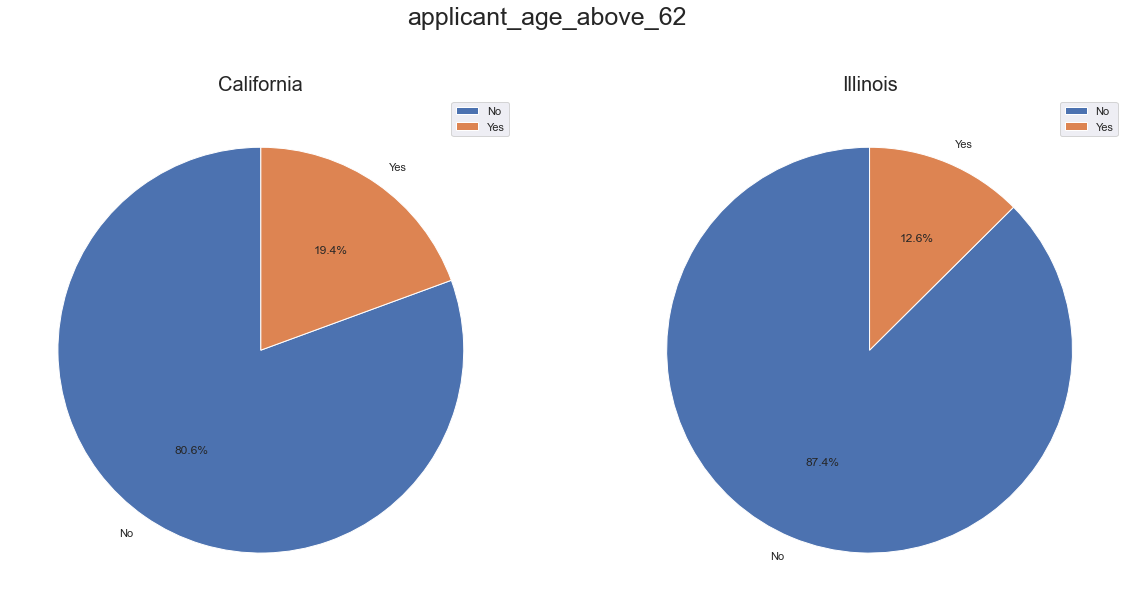

California: 2,359,897    |    Illinois: 590,228


-------------------------------------------------------------------


Variable: co-applicant_age_above_62


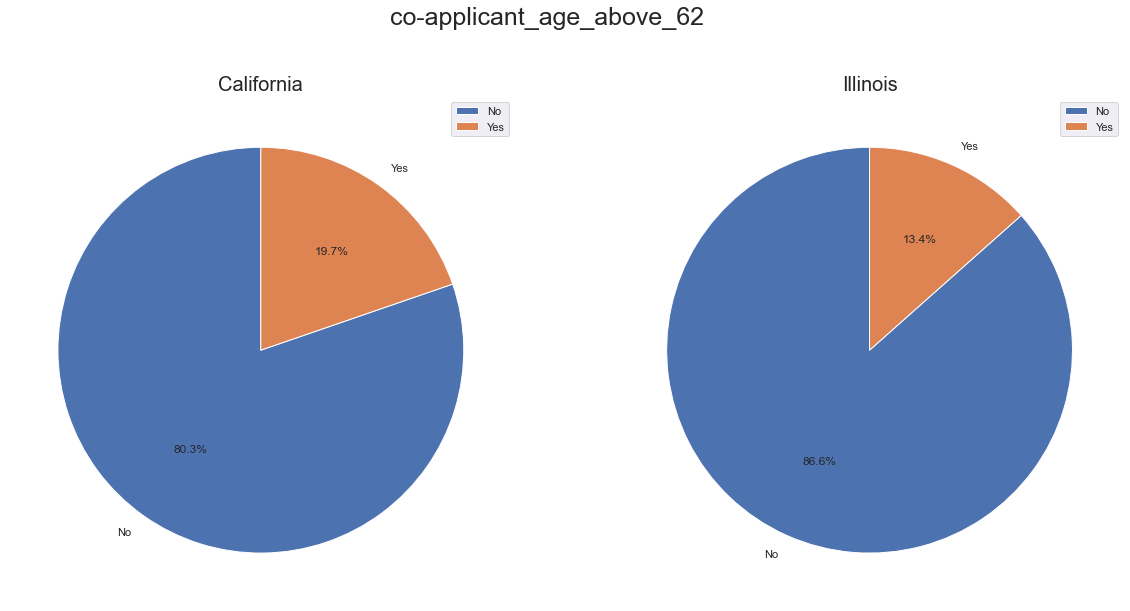

California: 1,183,890    |    Illinois: 273,778


-------------------------------------------------------------------


Variable: submission_of_application


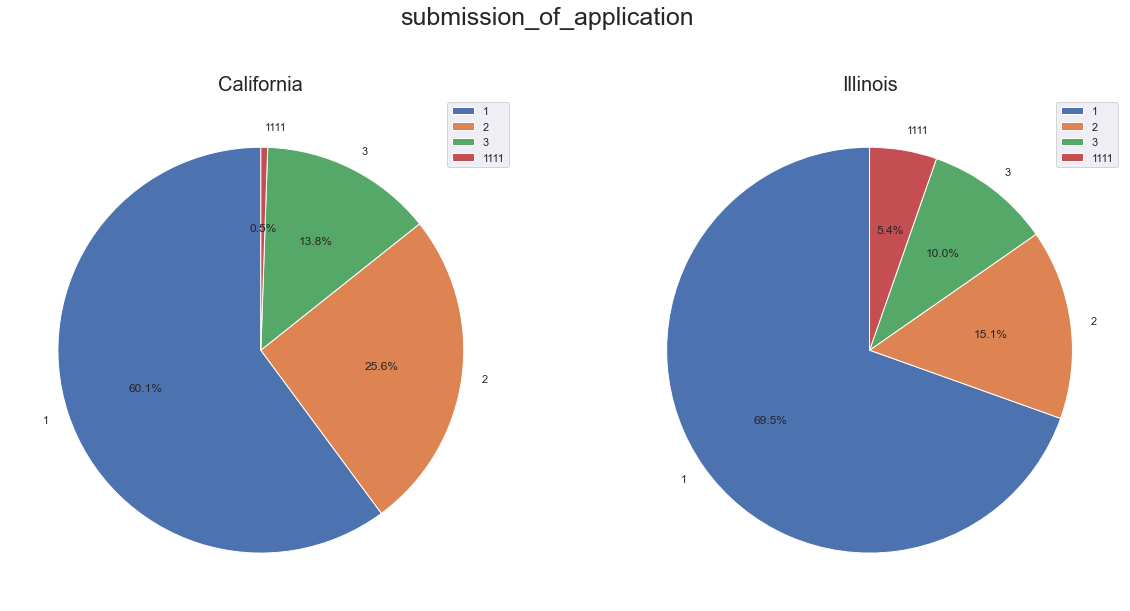

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: initially_payable_to_institution


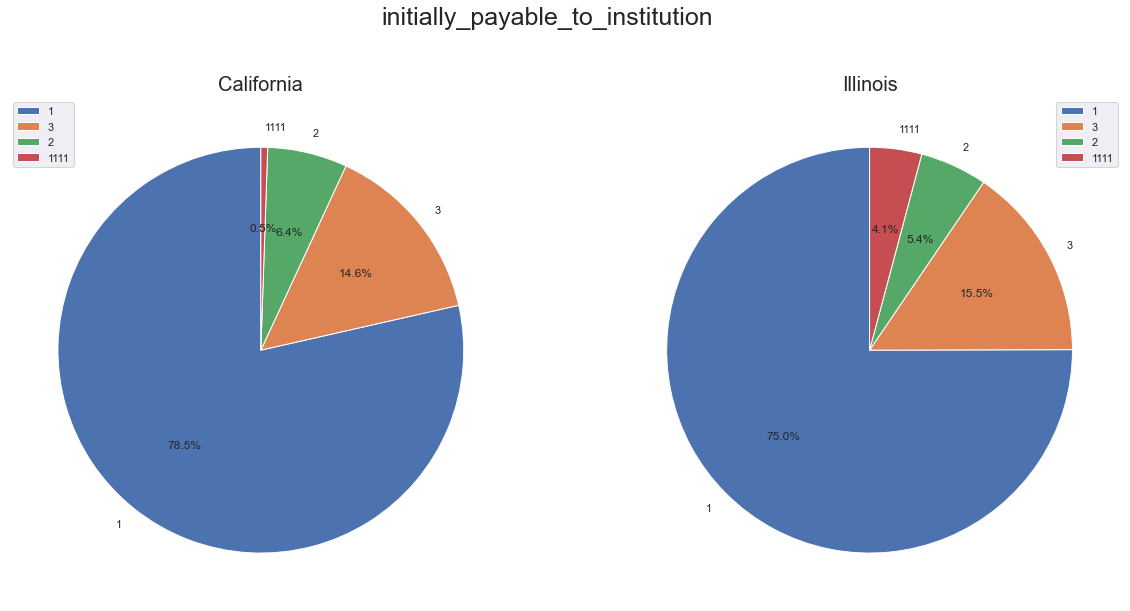

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: aus-1


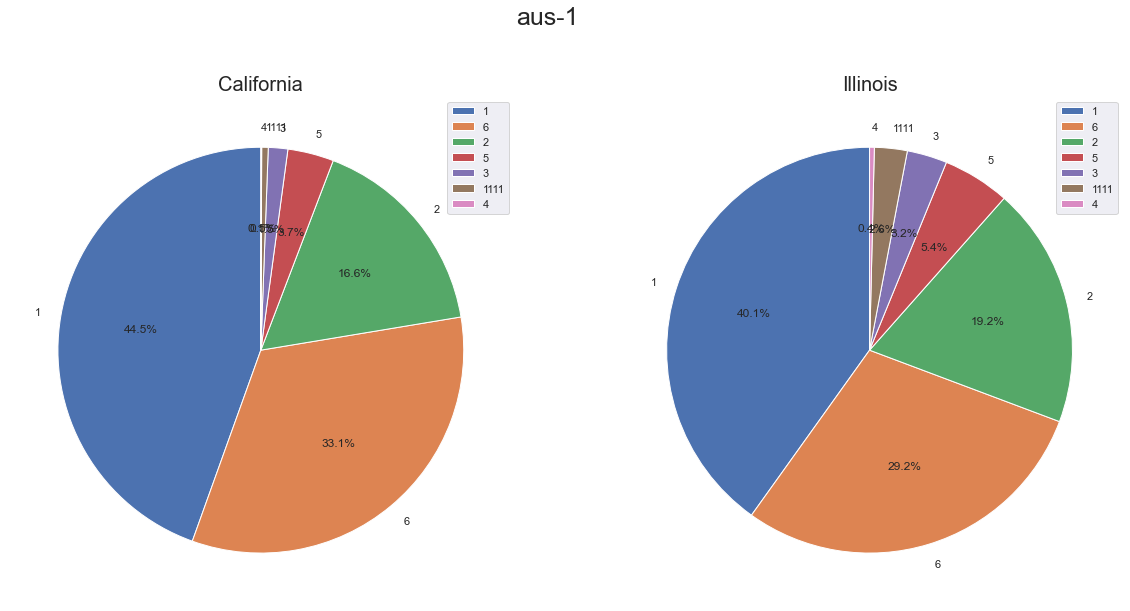

California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: aus-2


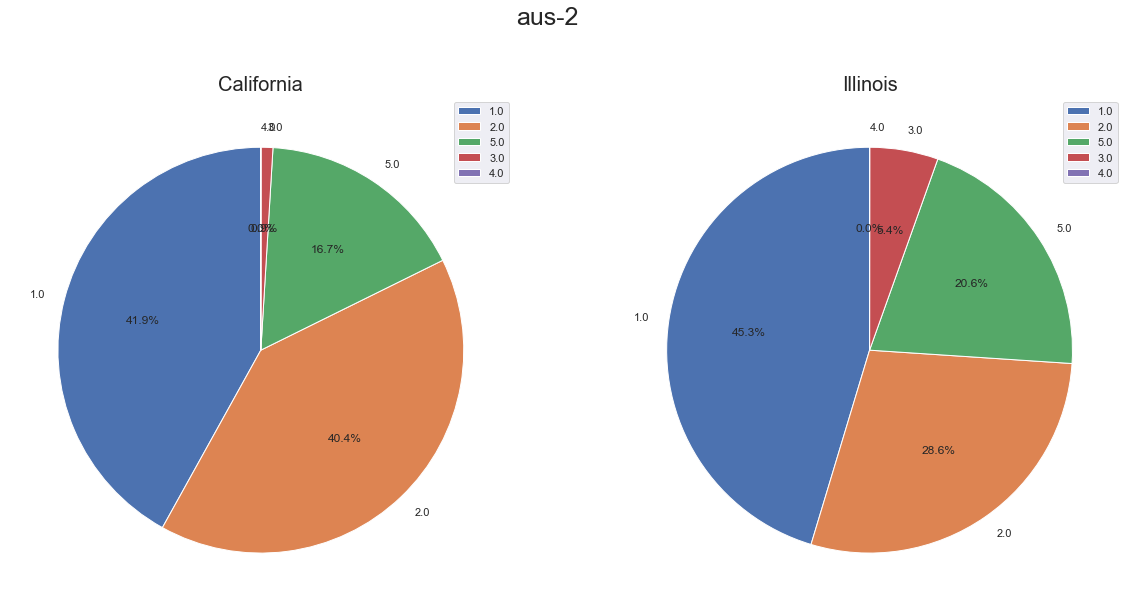

California: 272,309    |    Illinois: 46,493


-------------------------------------------------------------------


Variable: aus-3


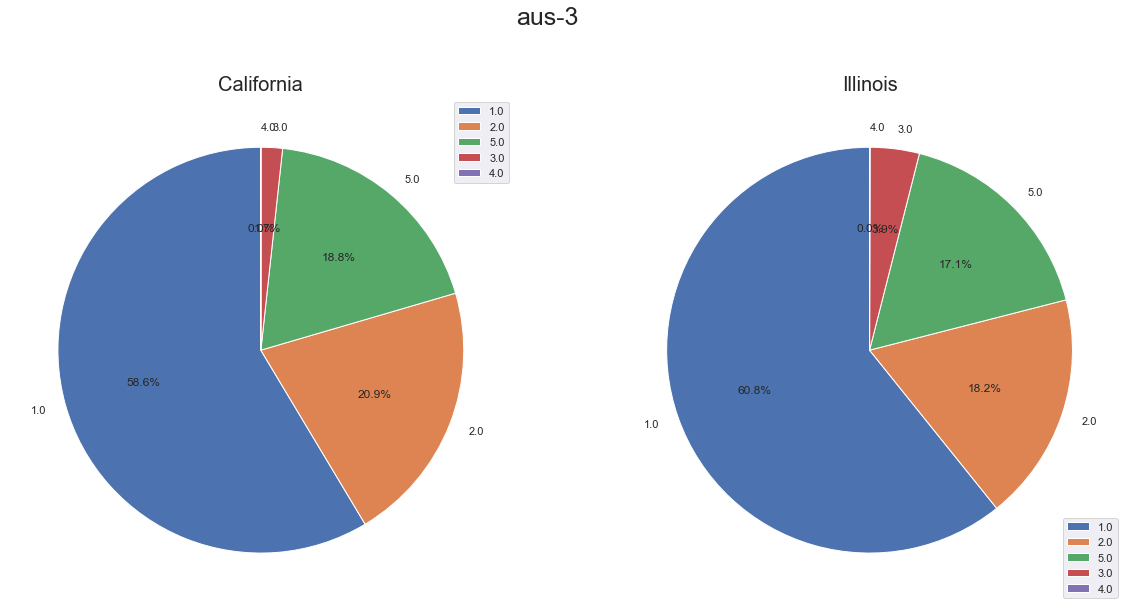

California: 35,391    |    Illinois: 7,891


-------------------------------------------------------------------


Variable: aus-4


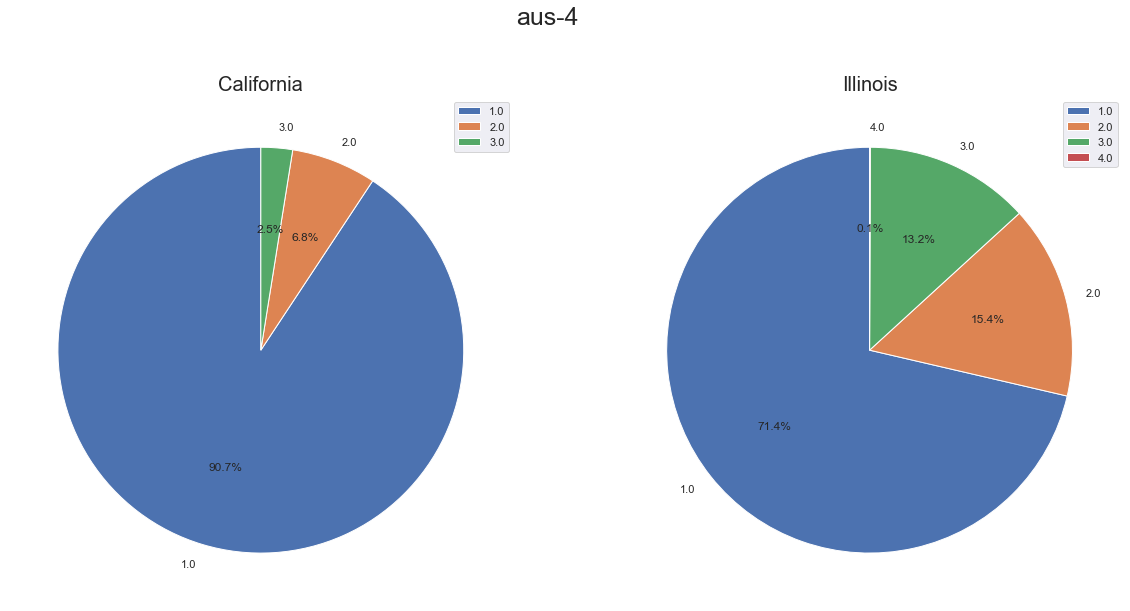

California: 20,123    |    Illinois: 1,680


-------------------------------------------------------------------


Variable: aus-5


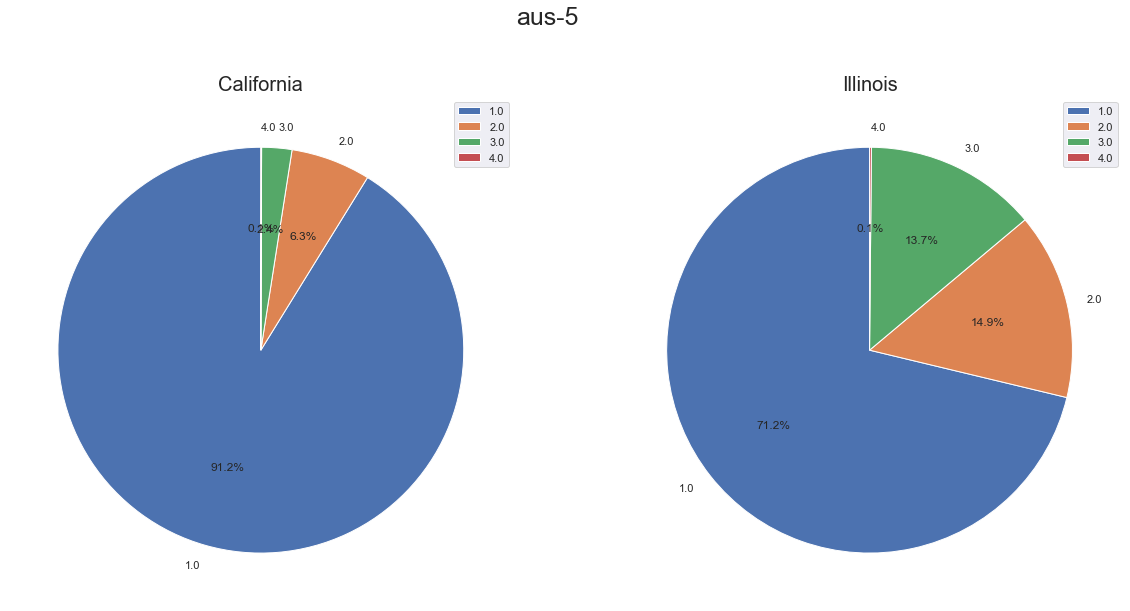

California: 16,662    |    Illinois: 1,346


-------------------------------------------------------------------


Variable: denial_reason-1


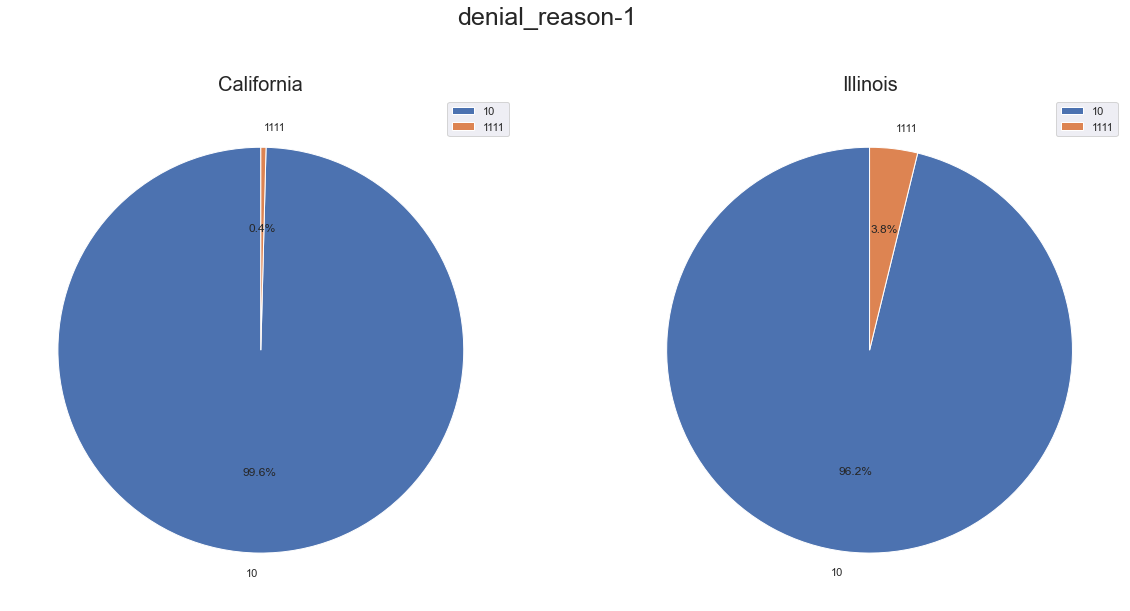

<ipython-input-21-a75e859f6fcb>:25: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 
  ax1.pie(value1, labels = index1, autopct='%1.1f%%', startangle = 90)
No handles with labels found to put in legend.
No handles with labels found to put in legend.


California: 2,584,267    |    Illinois: 662,236


-------------------------------------------------------------------


Variable: denial_reason-2


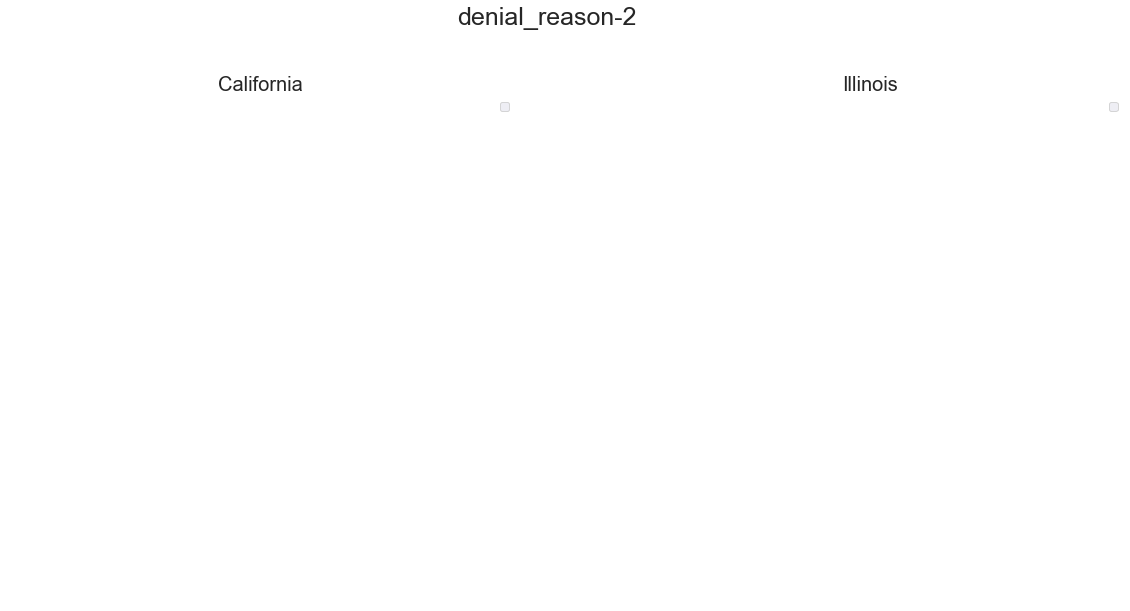

No handles with labels found to put in legend.
No handles with labels found to put in legend.


California: 0    |    Illinois: 0


-------------------------------------------------------------------


Variable: denial_reason-3


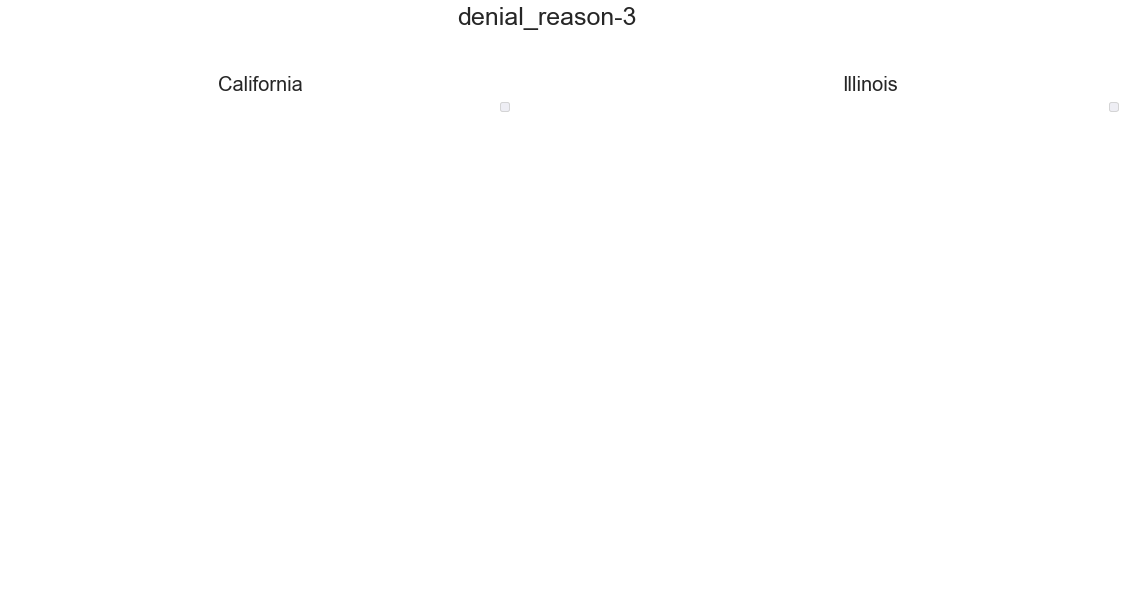

No handles with labels found to put in legend.
No handles with labels found to put in legend.


California: 0    |    Illinois: 0


-------------------------------------------------------------------


Variable: denial_reason-4


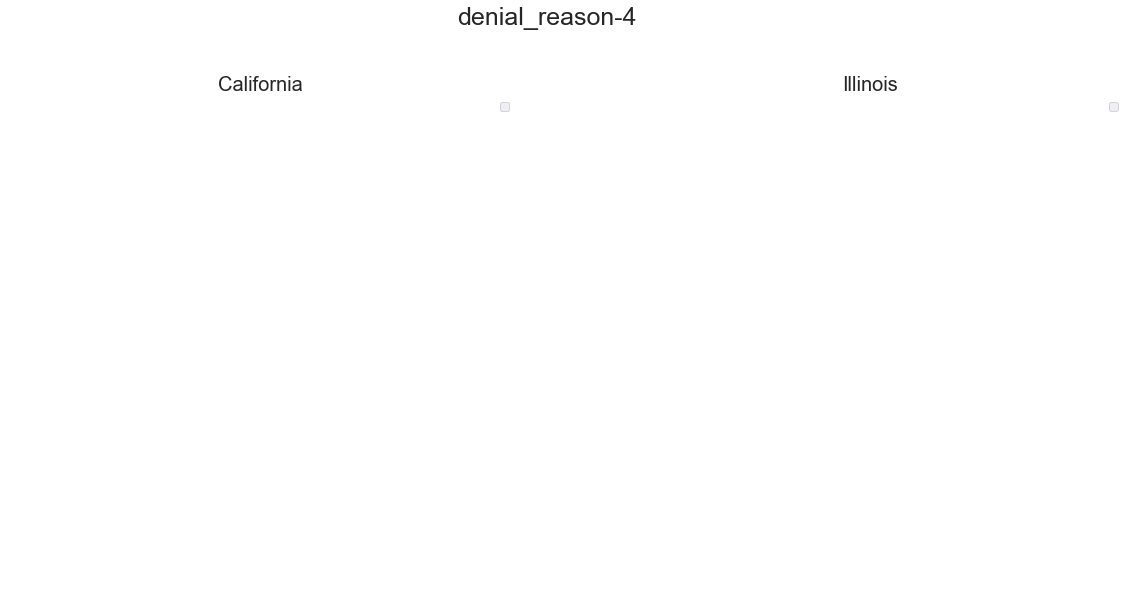

California: 0    |    Illinois: 0


-------------------------------------------------------------------




In [23]:
for var in cat_vars:
    plot_categorical(var)

In [24]:
'''
derived_race
loan_purpose
reverse_mortgage
business_or_commercial_purpose
negative_amortization
baloon_payment
other_nonamortizing_features
manufactured_home_secured_property_type
manufactured_home_land_property_interest
co-applicant_credit_score_type
applicant_race-1
submission_of_application
'''

'\nderived_race\nloan_purpose\nreverse_mortgage\nbusiness_or_commercial_purpose\nnegative_amortization\nbaloon_payment\nother_nonamortizing_features\nmanufactured_home_secured_property_type\nmanufactured_home_land_property_interest\nco-applicant_credit_score_type\napplicant_race-1\nsubmission_of_application\n'

Variable: loan_amount


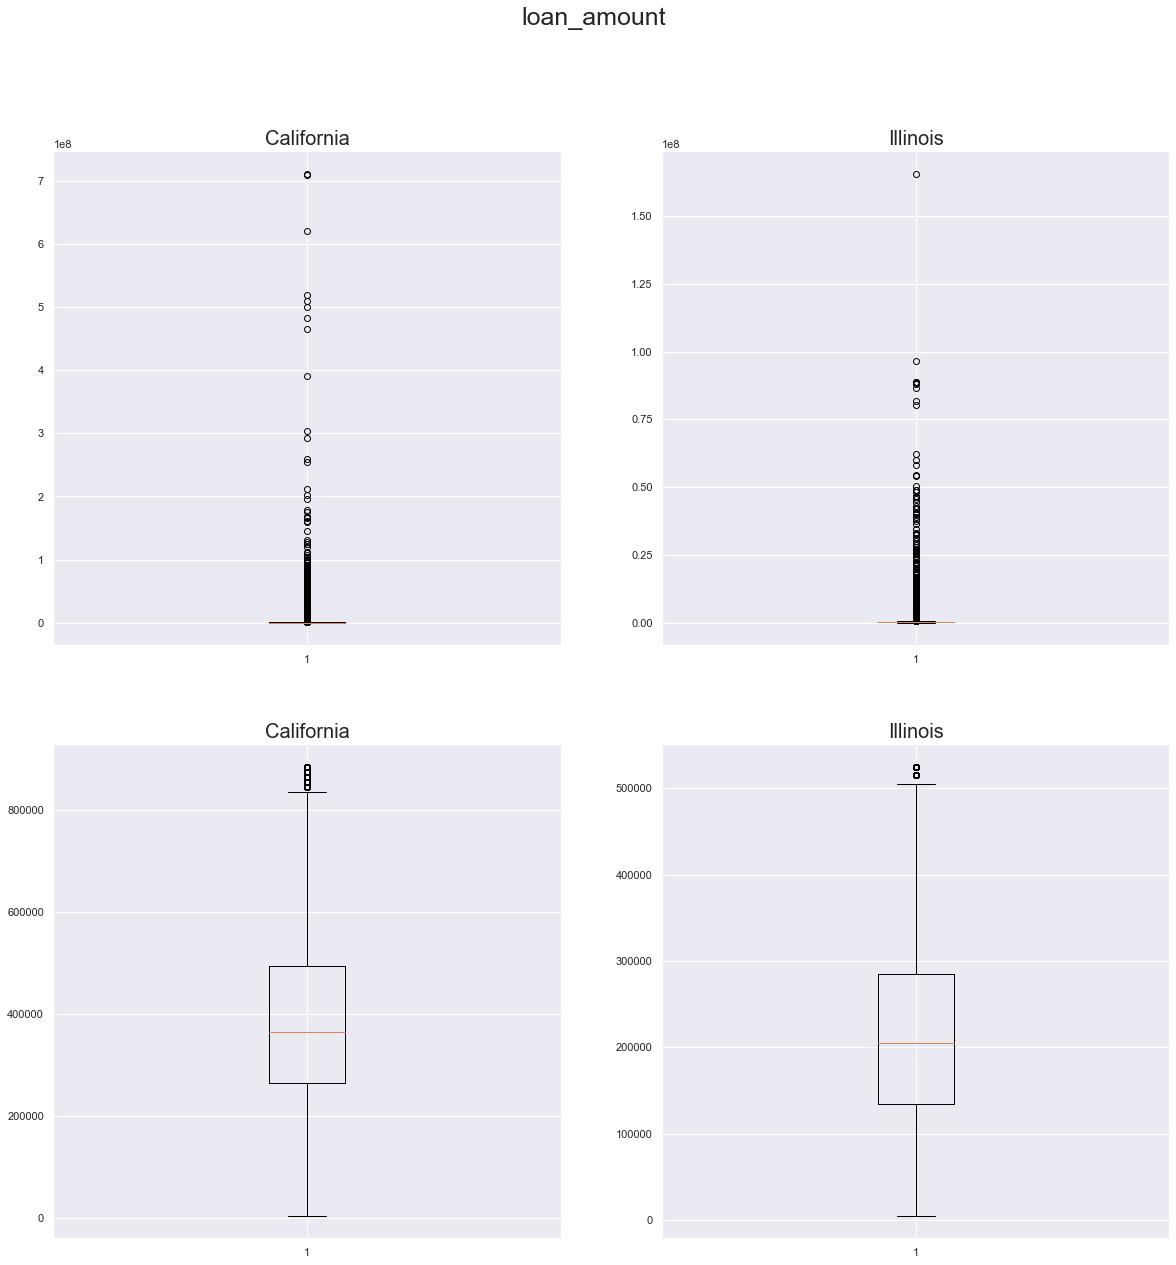

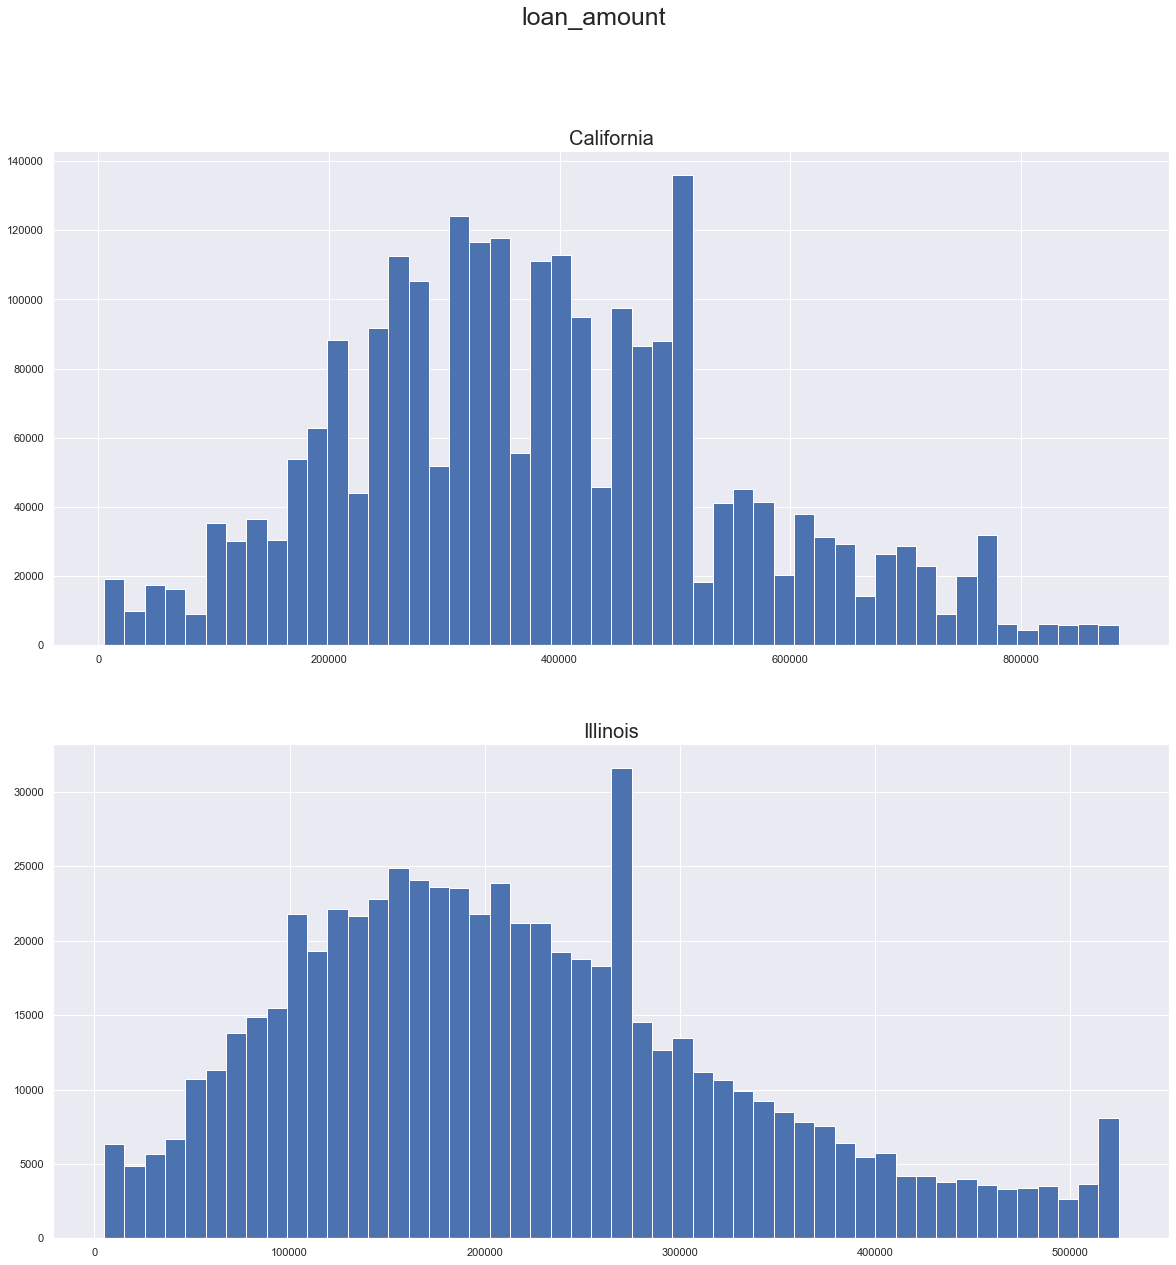

         California      Illinois  California_nol   Illinois_nol
count  2.584267e+06  6.622360e+05    2.455176e+06  637305.000000
mean   4.517593e+05  2.485405e+05    3.841494e+05  217096.186284
std    1.347899e+06  5.592410e+05    1.712729e+05  113115.054436
min    5.000000e+03  5.000000e+03    5.000000e+03    5000.000000
25%    2.650000e+05  1.350000e+05    2.650000e+05  135000.000000
50%    3.850000e+05  2.050000e+05    3.650000e+05  205000.000000
75%    5.150000e+05  2.950000e+05    4.950000e+05  285000.000000
max    7.110050e+08  1.656050e+08    8.850000e+05  525000.000000


-------------------------------------------------------------------


Variable: loan_to_value_ratio


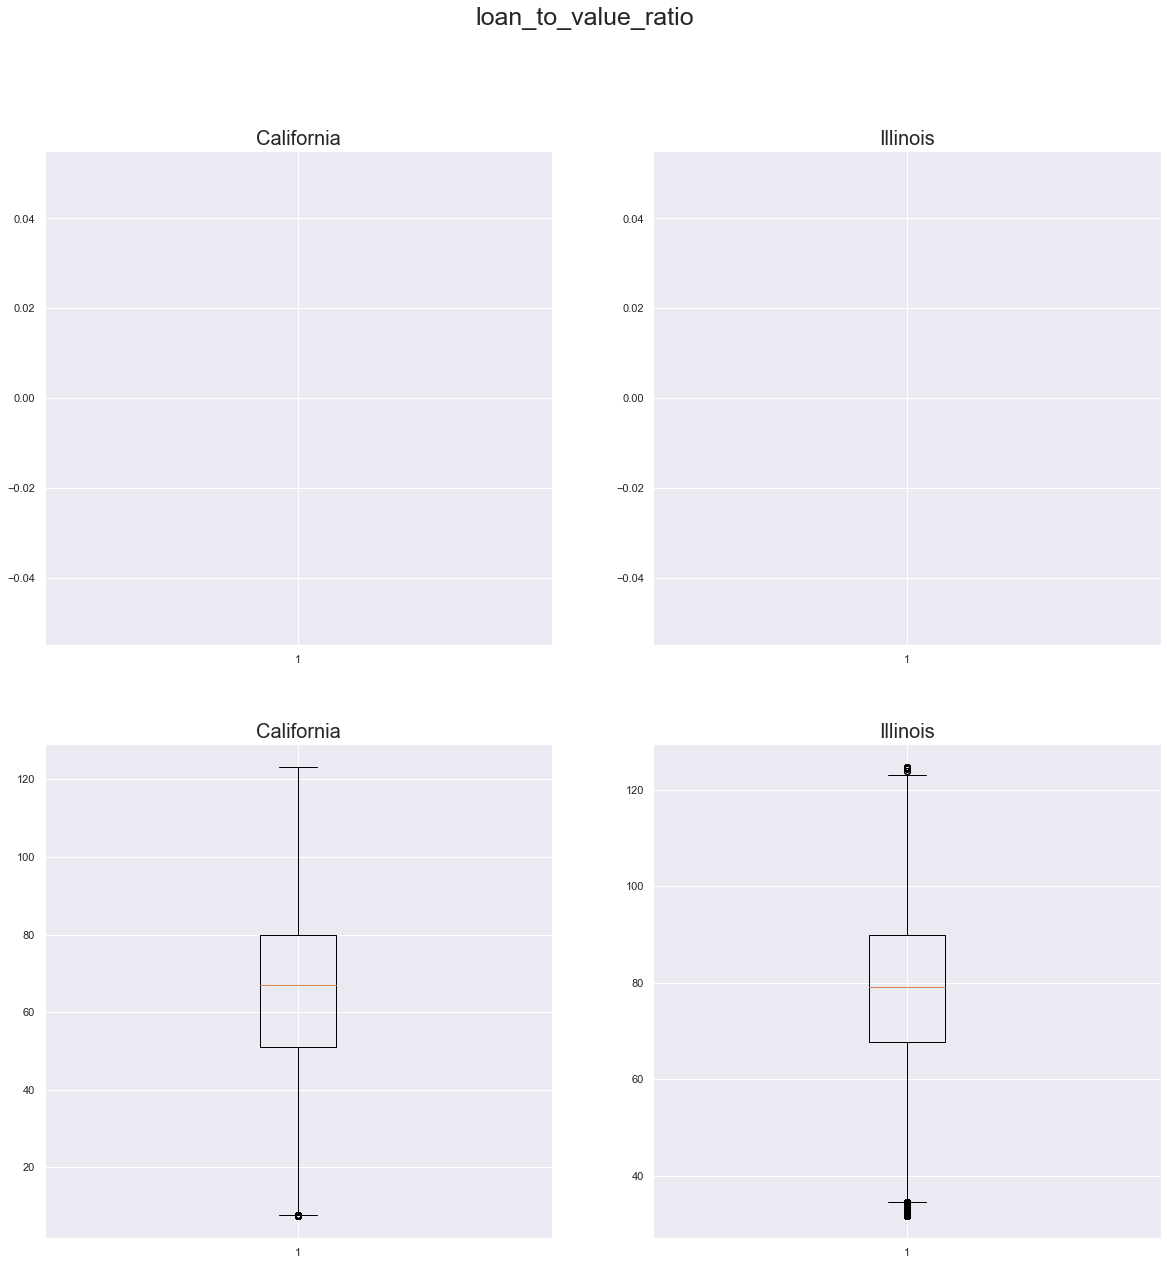

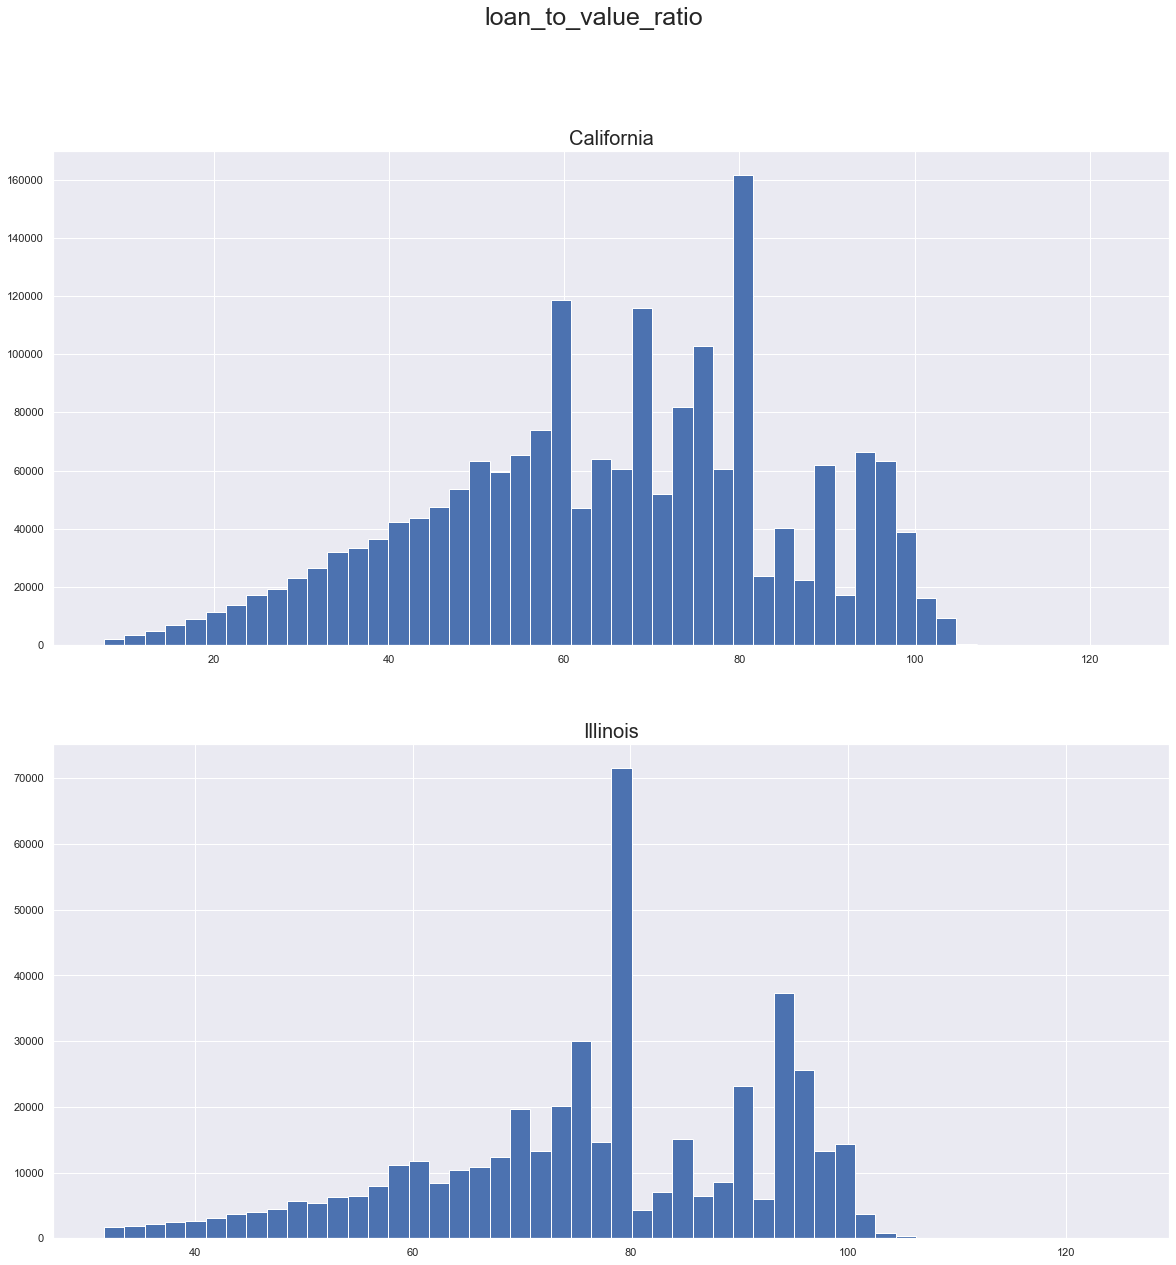

         California       Illinois  California_nol   Illinois_nol
count  1.919792e+06  467894.000000    1.915770e+06  458674.000000
mean   6.500173e+01      75.831241    6.500233e+01      76.860454
std    9.578845e+01      20.942969    2.026433e+01      15.640250
min    1.200000e-02       0.012000    7.506000e+00      31.677000
25%    5.100000e+01      66.670000    5.105000e+01      67.800000
50%    6.685300e+01      78.689000    6.693000e+01      79.036000
75%    8.000000e+01      90.000000    8.000000e+01      90.000000
max    1.136370e+05    8092.320000    1.232900e+02     124.830000


-------------------------------------------------------------------


Variable: interest_rate


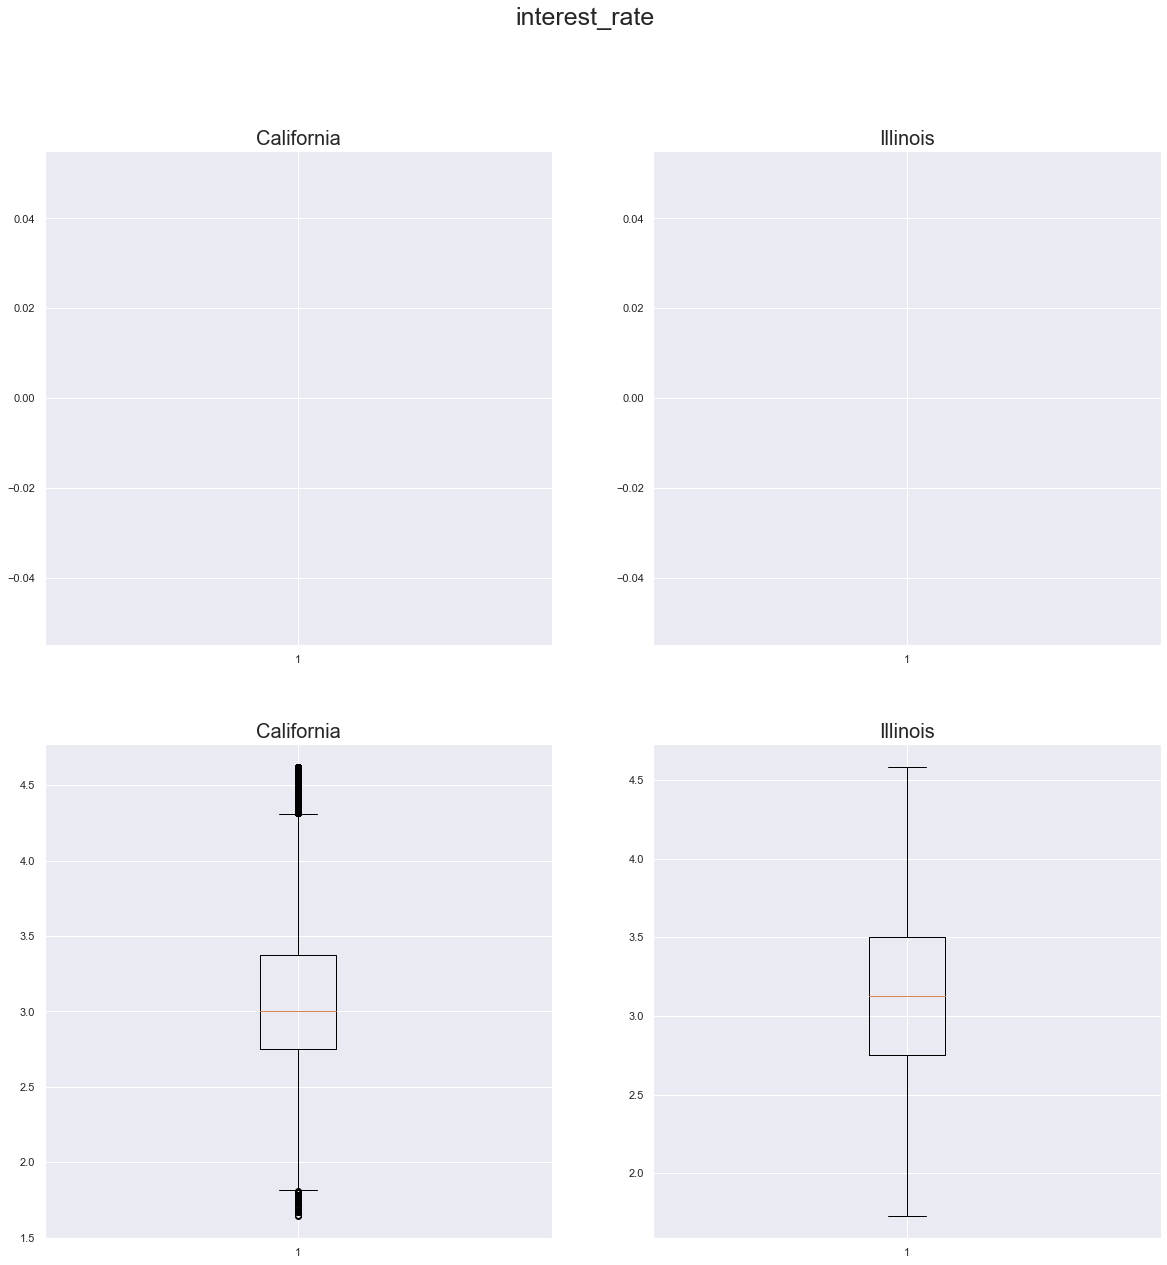

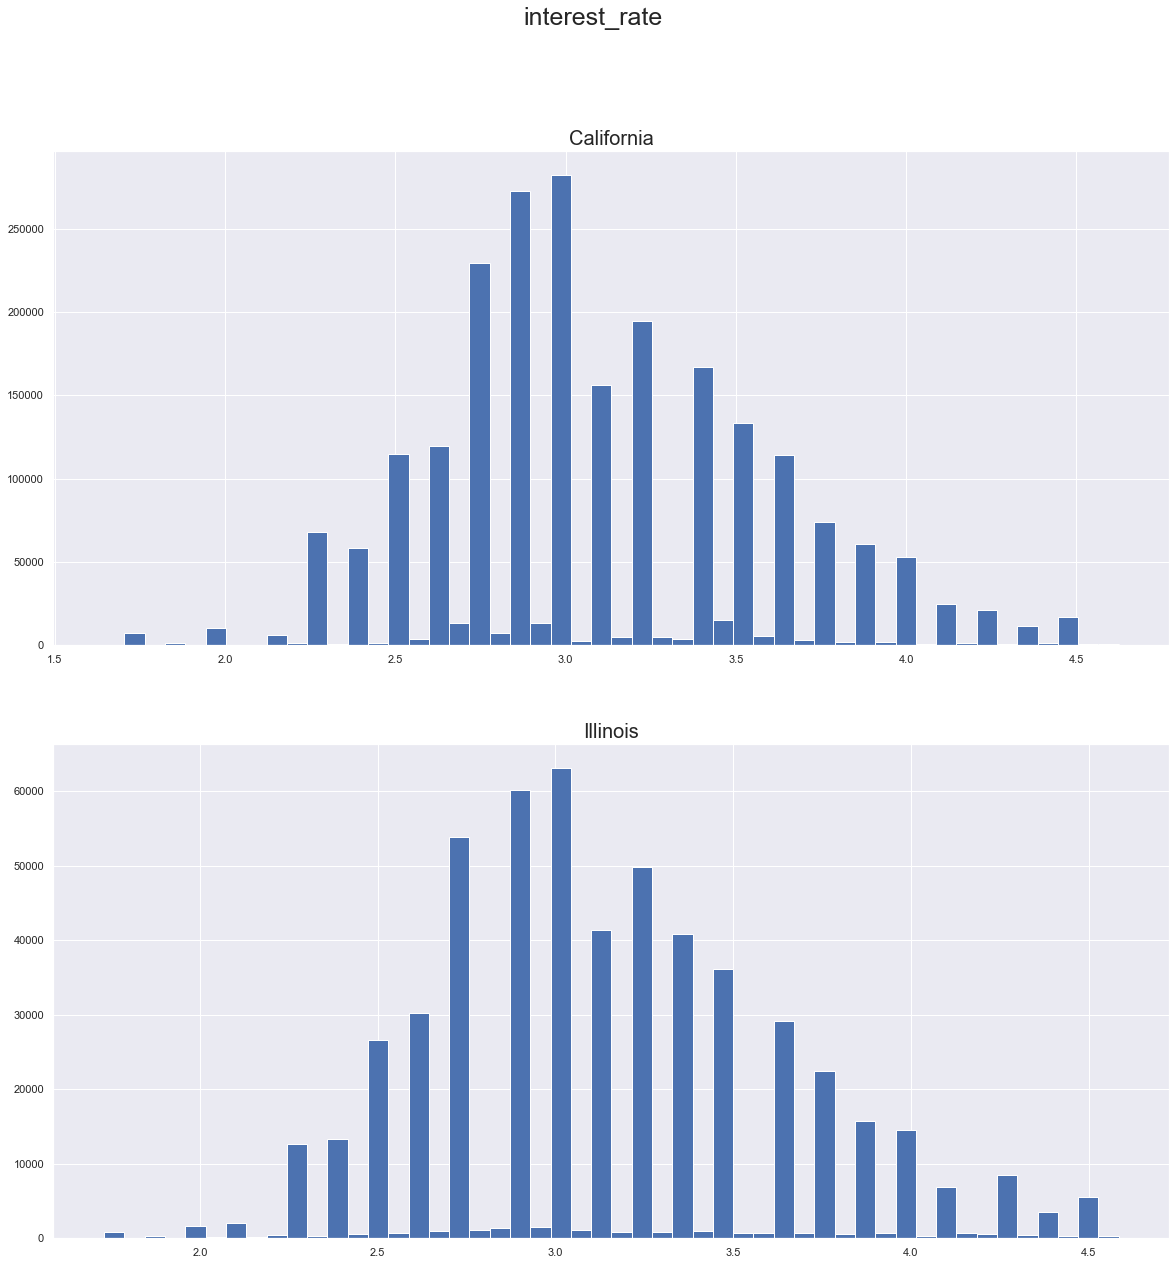

         California       Illinois  California_nol   Illinois_nol
count  2.389759e+06  589081.000000    2.288078e+06  556520.000000
mean   3.206810e+00       3.297281    3.100732e+00       3.146312
std    1.554659e+01       4.467435    4.830693e-01       0.498154
min    0.000000e+00       0.000000    1.645000e+00       1.730000
25%    2.750000e+00       2.775000    2.750000e+00       2.750000
50%    3.000000e+00       3.125000    3.000000e+00       3.125000
75%    3.500000e+00       3.500000    3.375000e+00       3.500000
max    2.362500e+04     900.000000    4.624000e+00       4.585000


-------------------------------------------------------------------


Variable: rate_spread


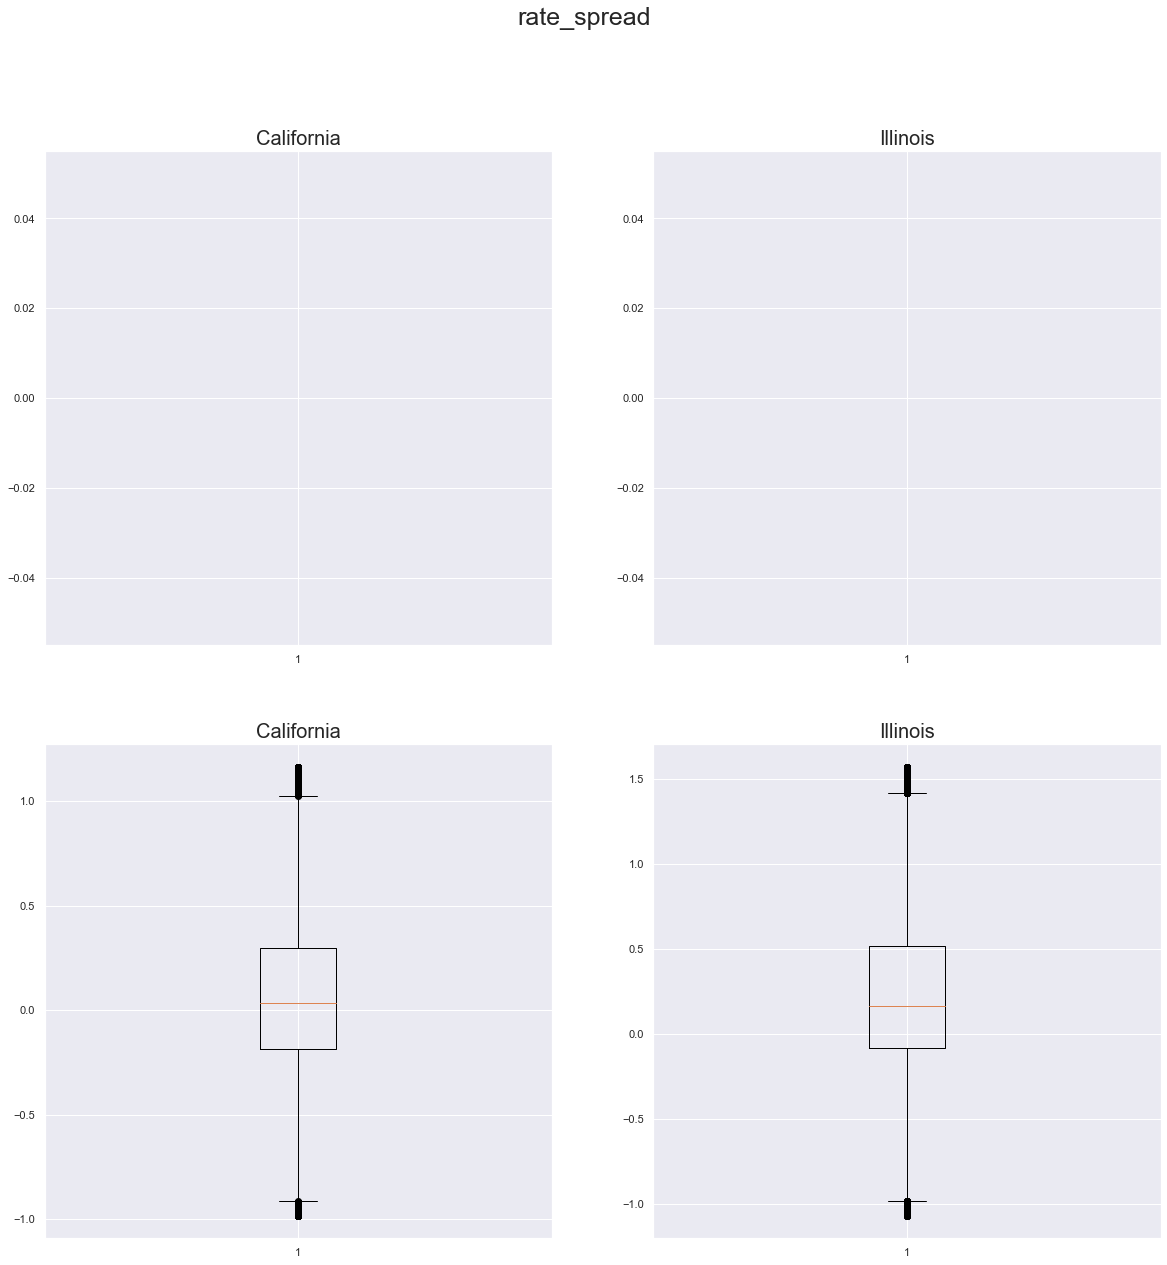

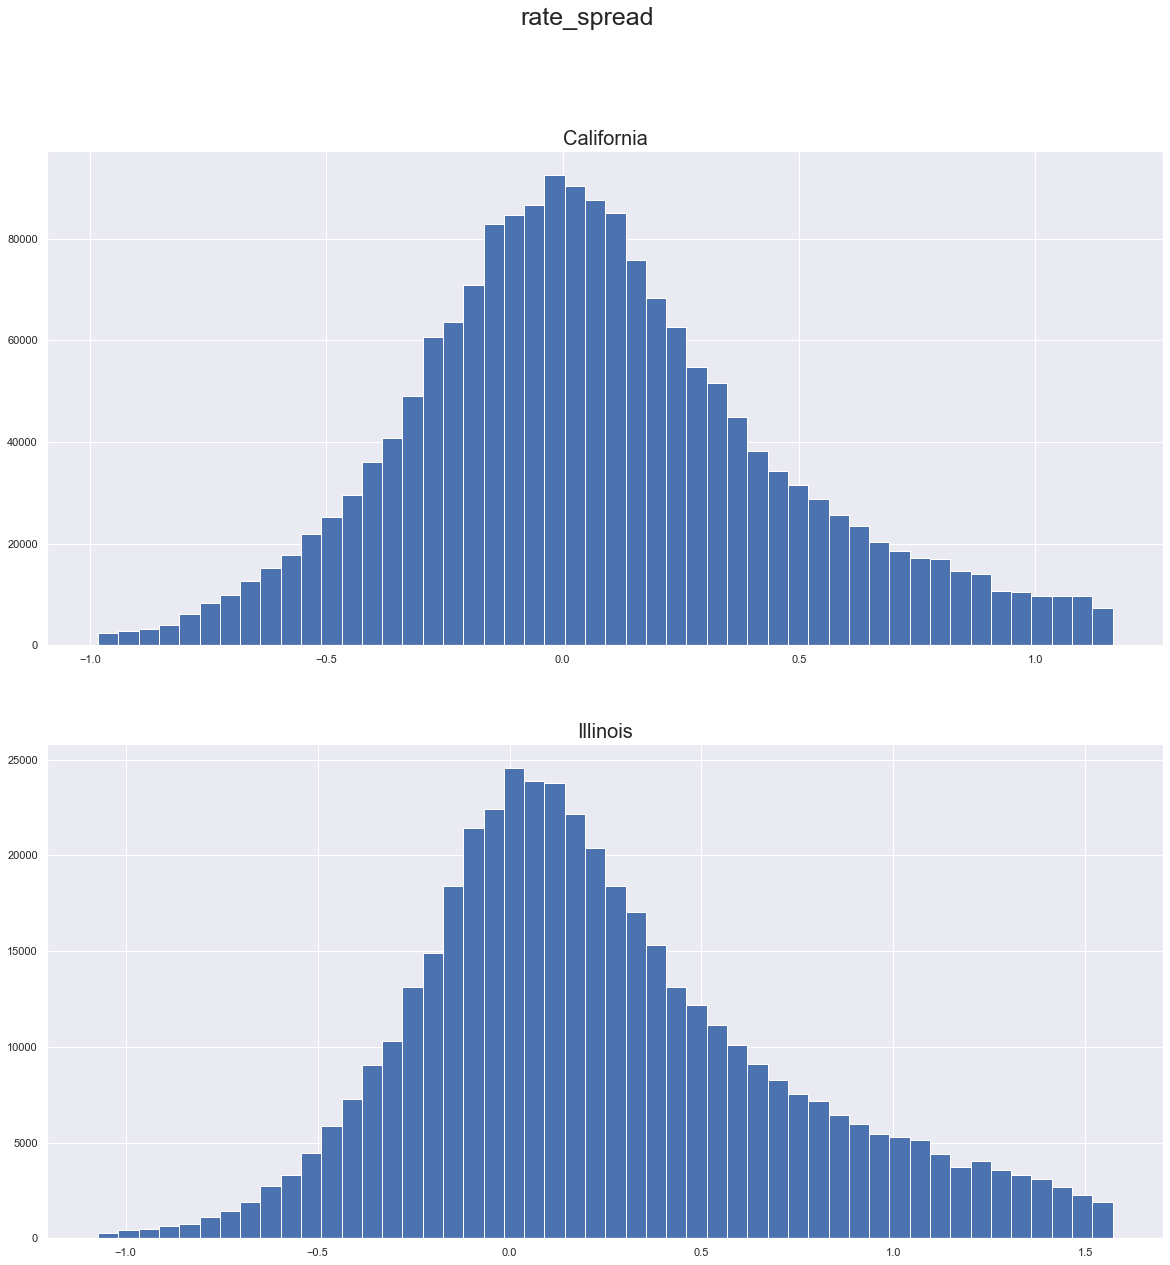

         California       Illinois  California_nol   Illinois_nol
count  1.905592e+06  465310.000000    1.788187e+06  441730.000000
mean   1.742035e-01       0.324838    7.031814e-02       0.239031
std    2.110831e+00       5.704986    3.916762e-01       0.479018
min   -4.140000e+02   -3480.000000   -9.832700e-01      -1.072000
25%   -1.780000e-01      -0.081000   -1.870000e-01      -0.086000
50%    5.800000e-02       0.181150    3.600000e-02       0.163000
75%    3.590000e-01       0.580000    2.980000e-01       0.514482
max    3.800000e+02     418.000000    1.164000e+00       1.571000


-------------------------------------------------------------------


Variable: total_loan_costs


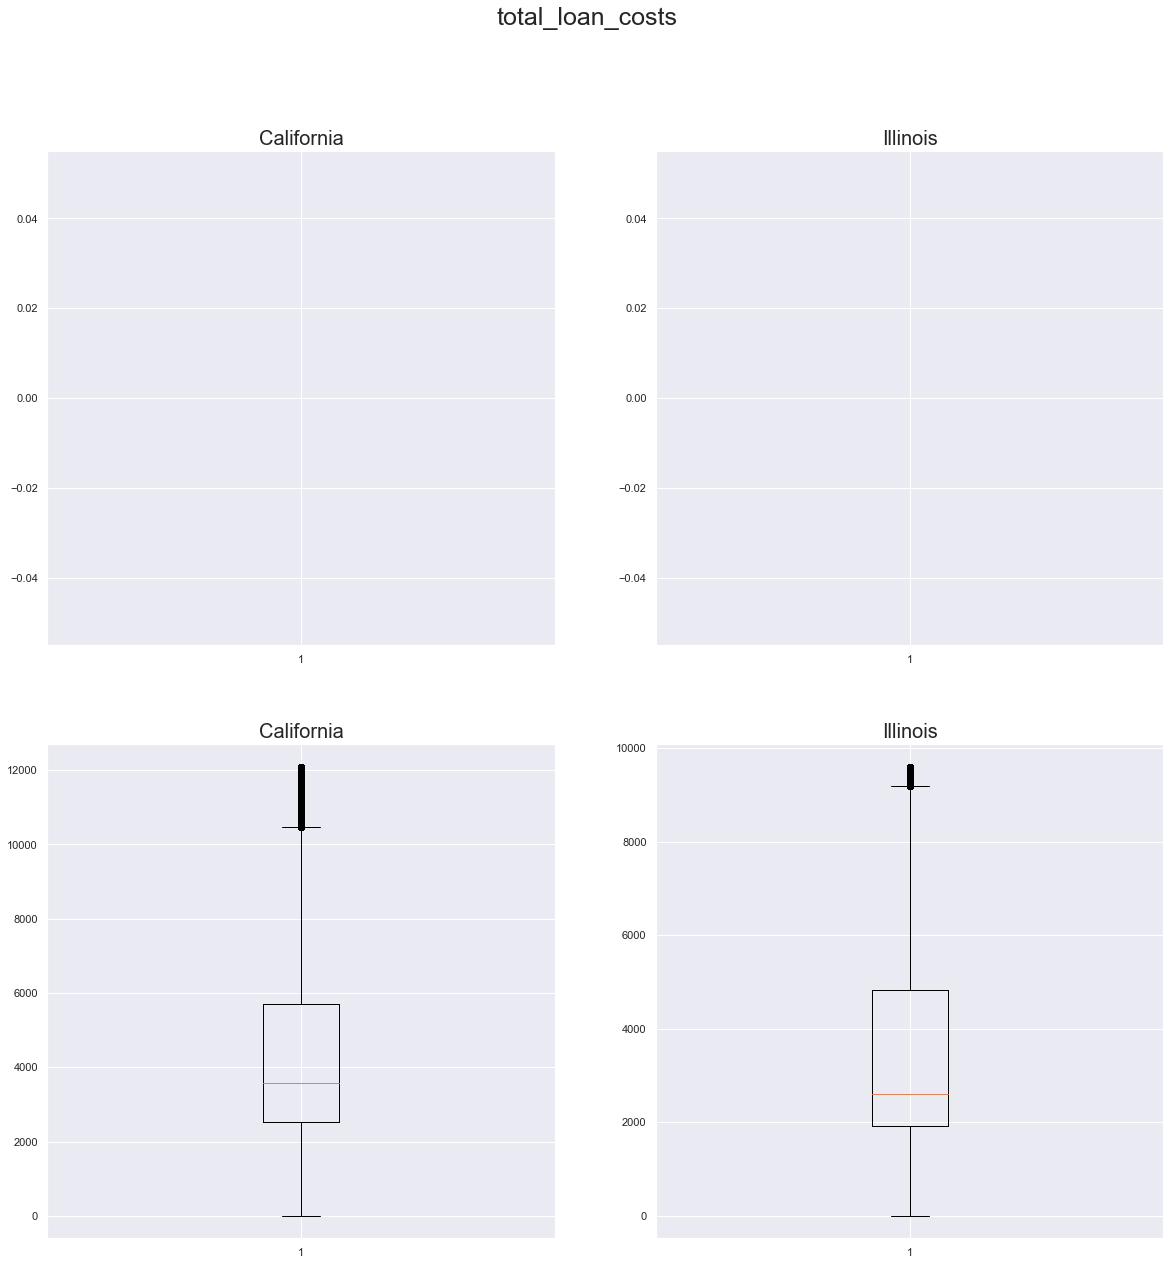

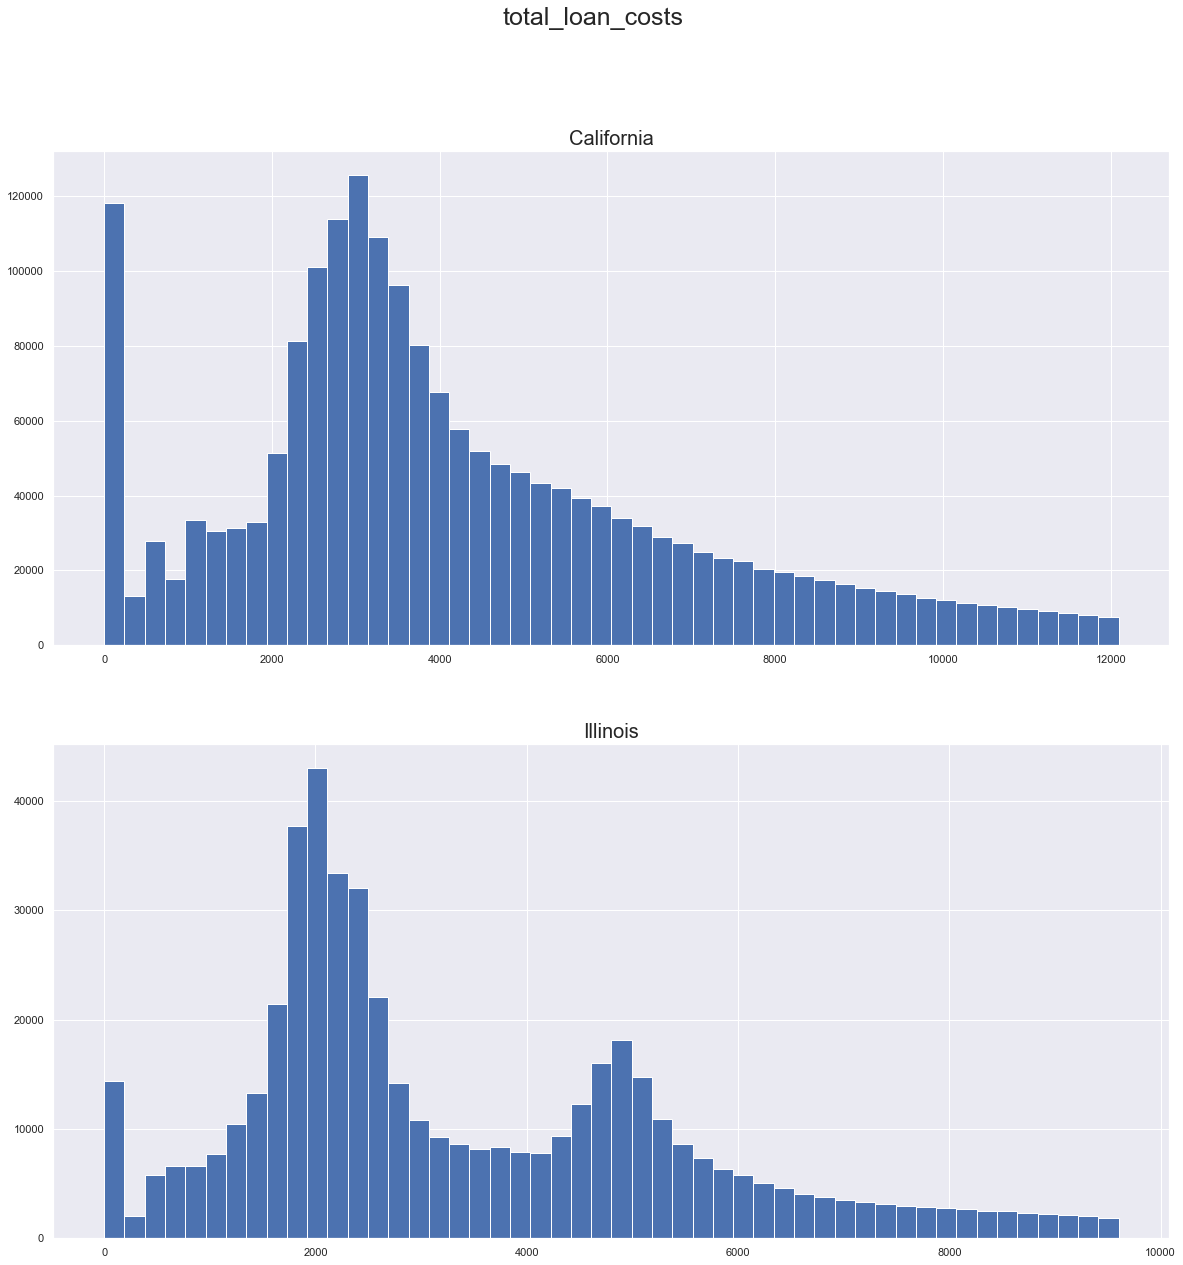

         California      Illinois  California_nol   Illinois_nol
count  2.062473e+06  5.180810e+05    1.926654e+06  495893.000000
mean   5.082494e+03  4.023467e+03    4.222377e+03    3377.512442
std    7.745194e+03  1.446074e+05    2.694469e+03    2086.503750
min    0.000000e+00  0.000000e+00    0.000000e+00       0.000000
25%    2.607310e+03  1.935320e+03    2.533080e+03    1910.500000
50%    3.768300e+03  2.717500e+03    3.574620e+03    2604.000000
75%    6.402500e+03  5.003000e+03    5.709700e+03    4825.300000
max    7.423071e+06  9.895491e+07    1.209528e+04    9604.290000


-------------------------------------------------------------------


Variable: total_points_and_fees


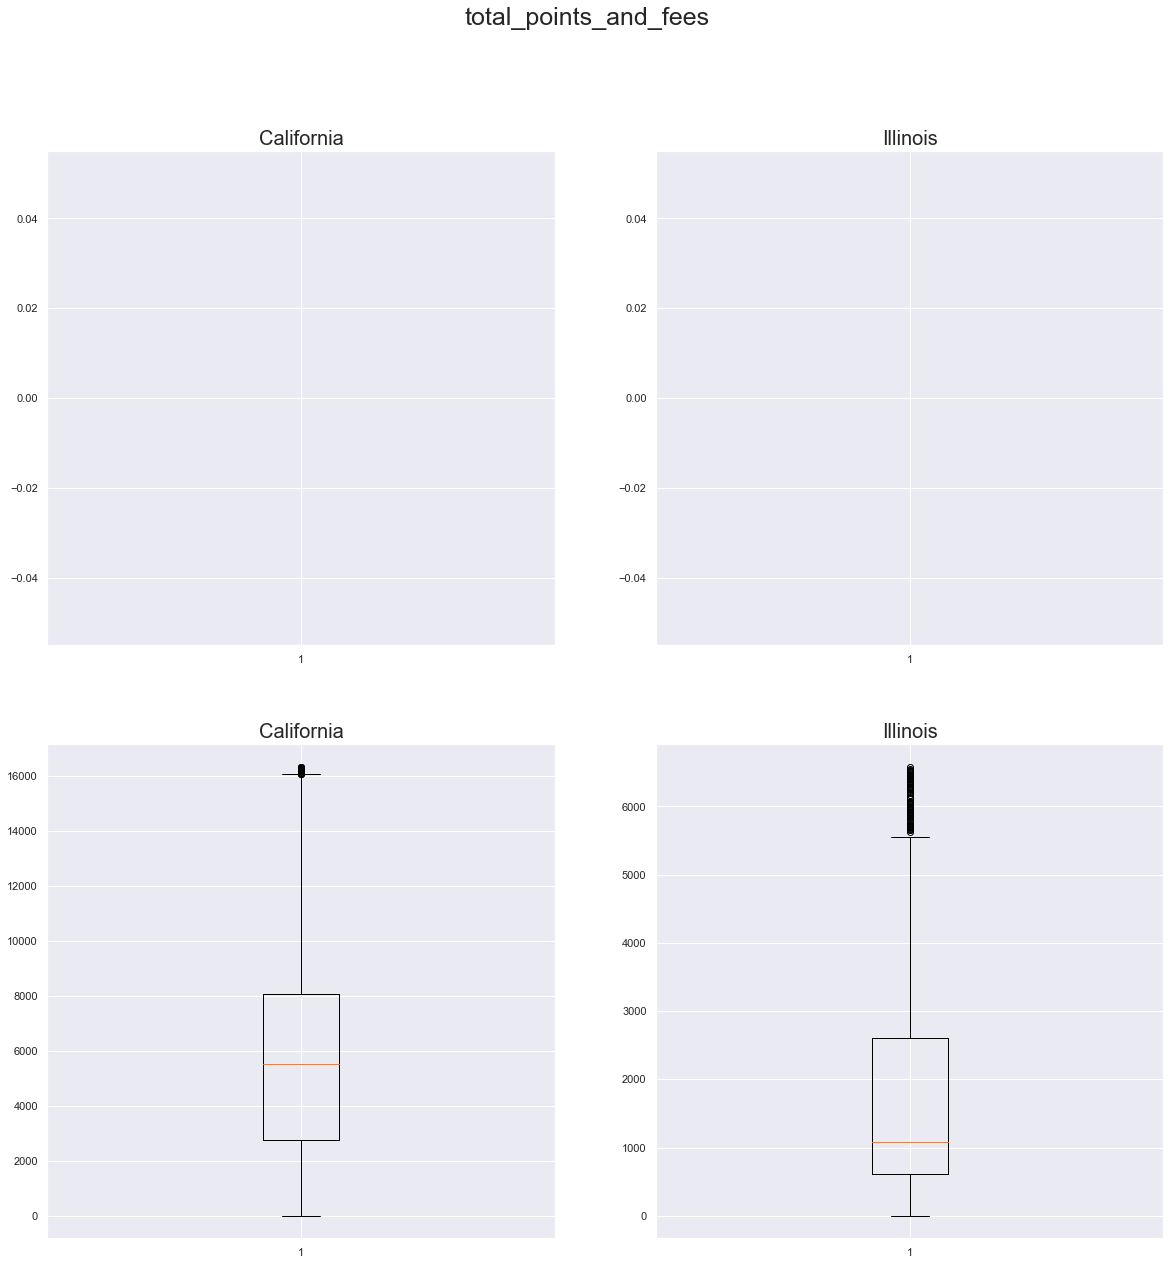

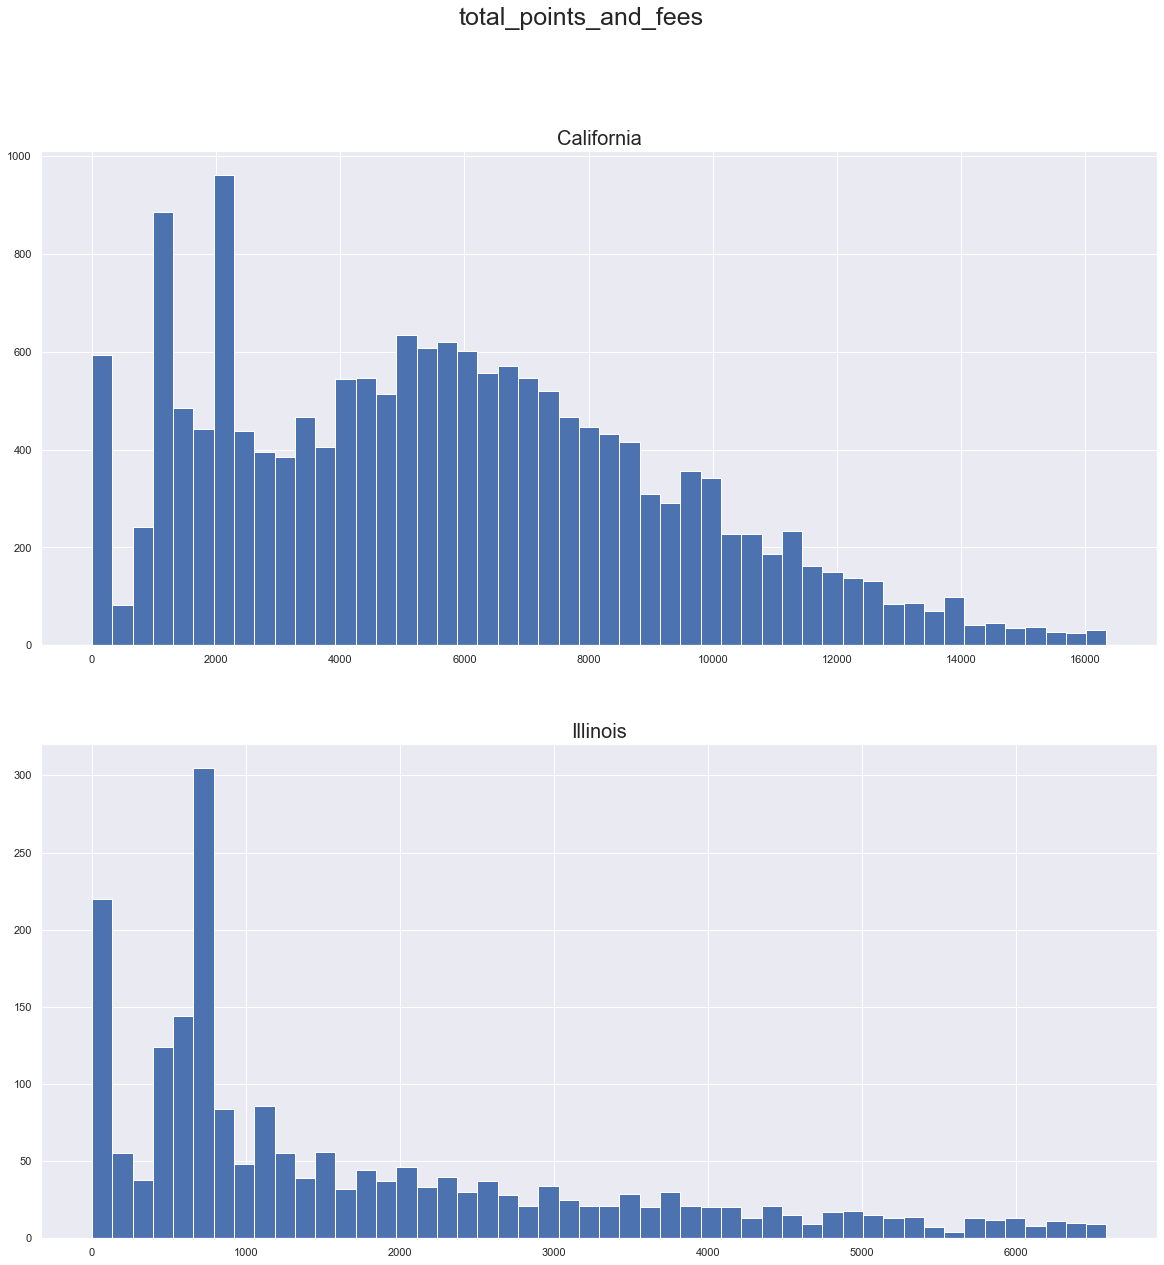

          California      Illinois  California_nol  Illinois_nol
count   17411.000000   2180.000000     17141.00000   2065.000000
mean     5995.366106   2096.914450      5735.91931   1742.183424
std      4451.850548   2226.412253      3521.48652   1631.261211
min         0.000000      0.000000         0.00000      0.000000
25%      2834.010000    648.750000      2770.00000    615.000000
50%      5595.000000   1167.500000      5525.00000   1077.000000
75%      8255.000000   3025.957500      8086.25000   2612.820000
max    223089.950000  18140.600000     16340.75000   6585.000000


-------------------------------------------------------------------


Variable: origination_charges


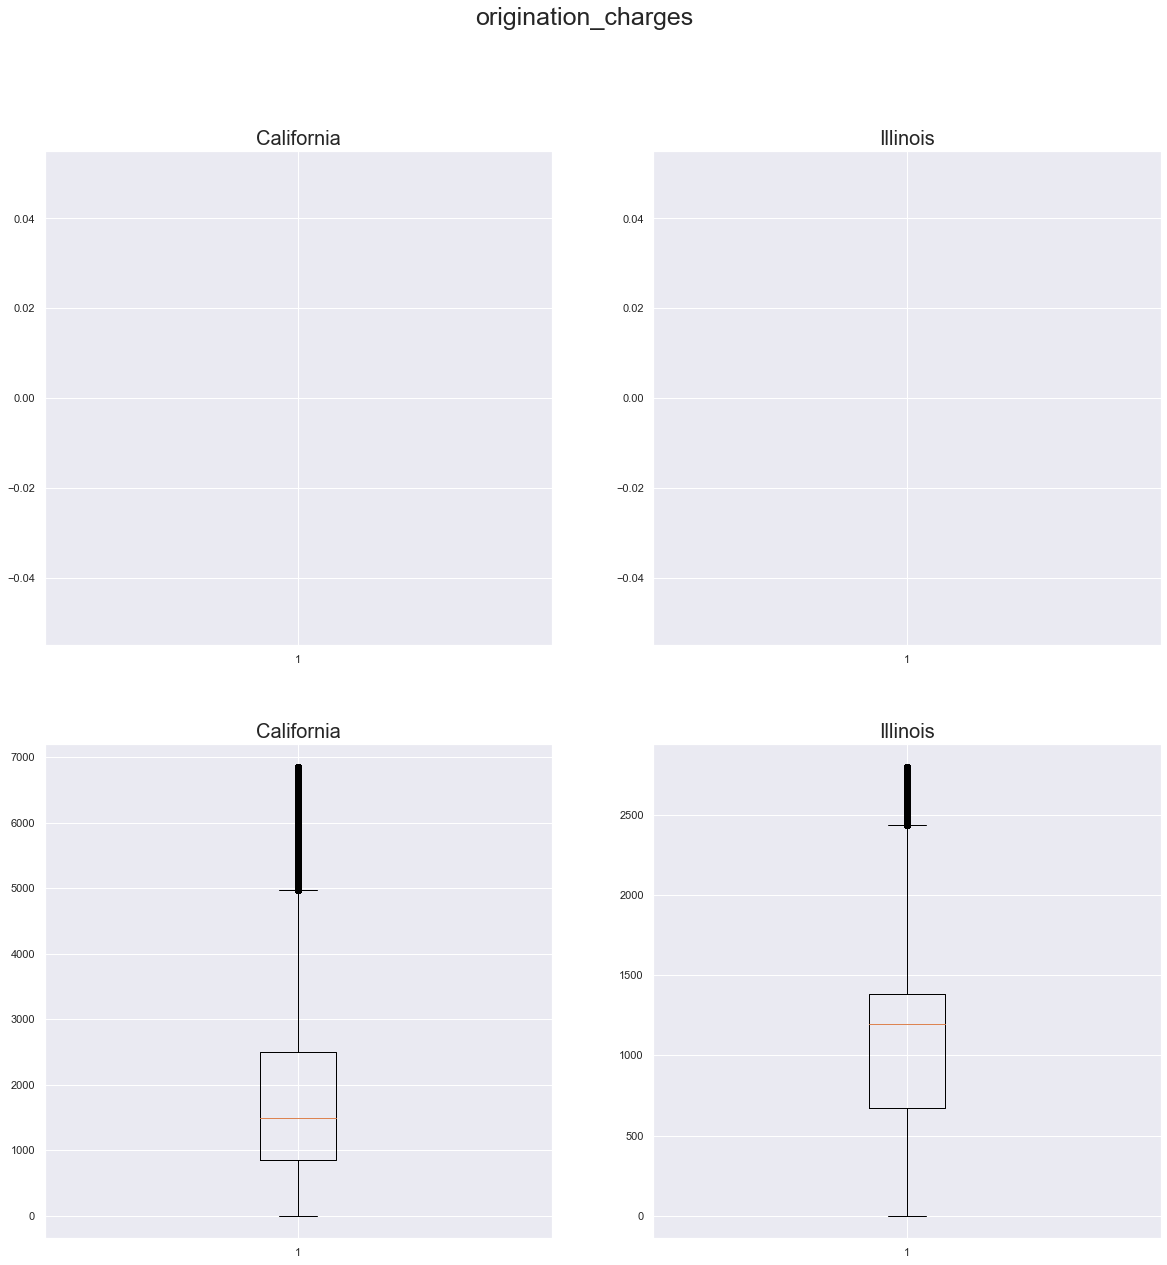

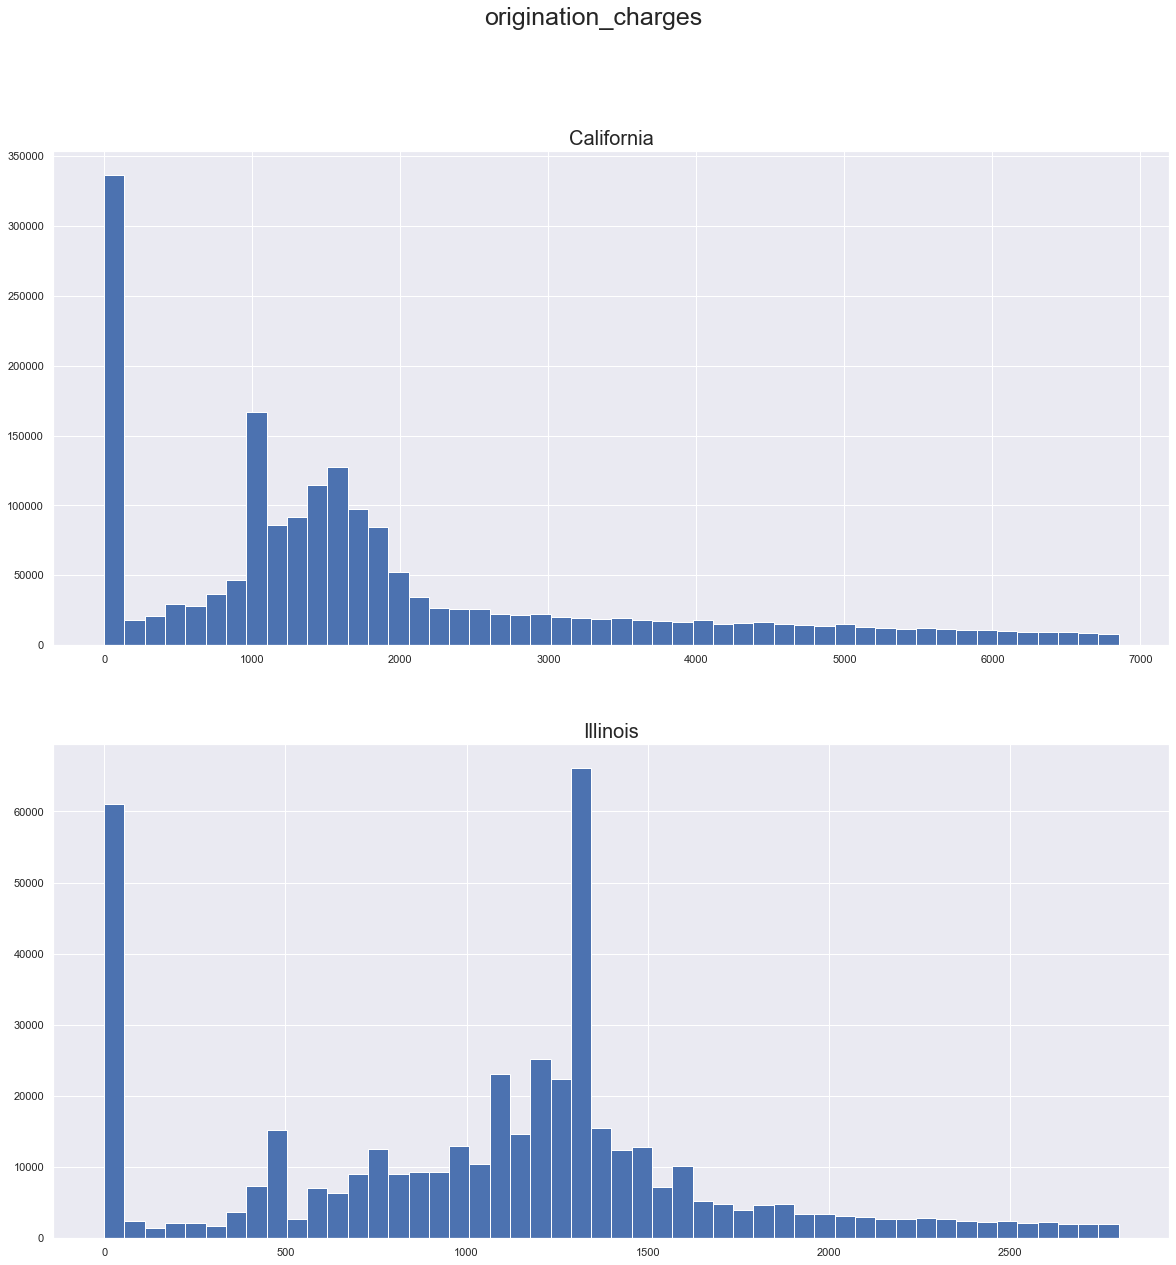

         California       Illinois  California_nol   Illinois_nol
count  2.083436e+06  519270.000000    1.909777e+06  461192.000000
mean   2.560957e+03    1467.493888    1.871273e+03    1078.788241
std    3.116046e+03    1440.654540    1.660752e+03     638.266431
min    0.000000e+00       0.000000    0.000000e+00       0.000000
25%    9.750000e+02     770.000000    8.500000e+02     675.000000
50%    1.590000e+03    1272.670000    1.490000e+03    1195.000000
75%    3.326250e+03    1582.055000    2.500000e+03    1380.000000
max    9.762784e+05   74076.000000    6.853120e+03    2800.110000


-------------------------------------------------------------------


Variable: discount_points


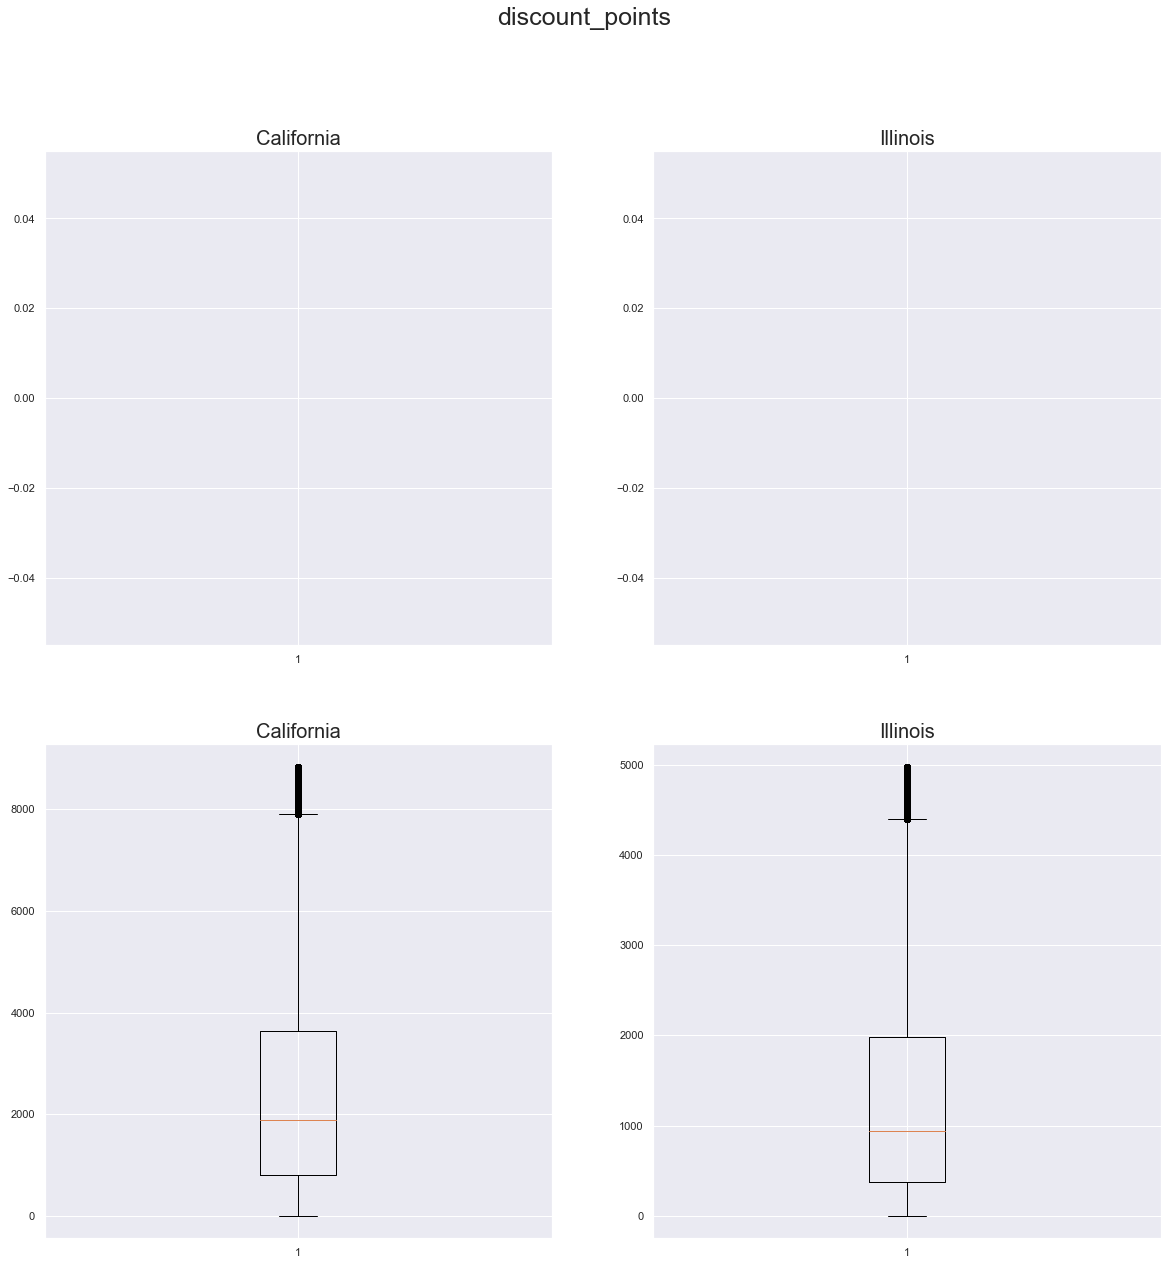

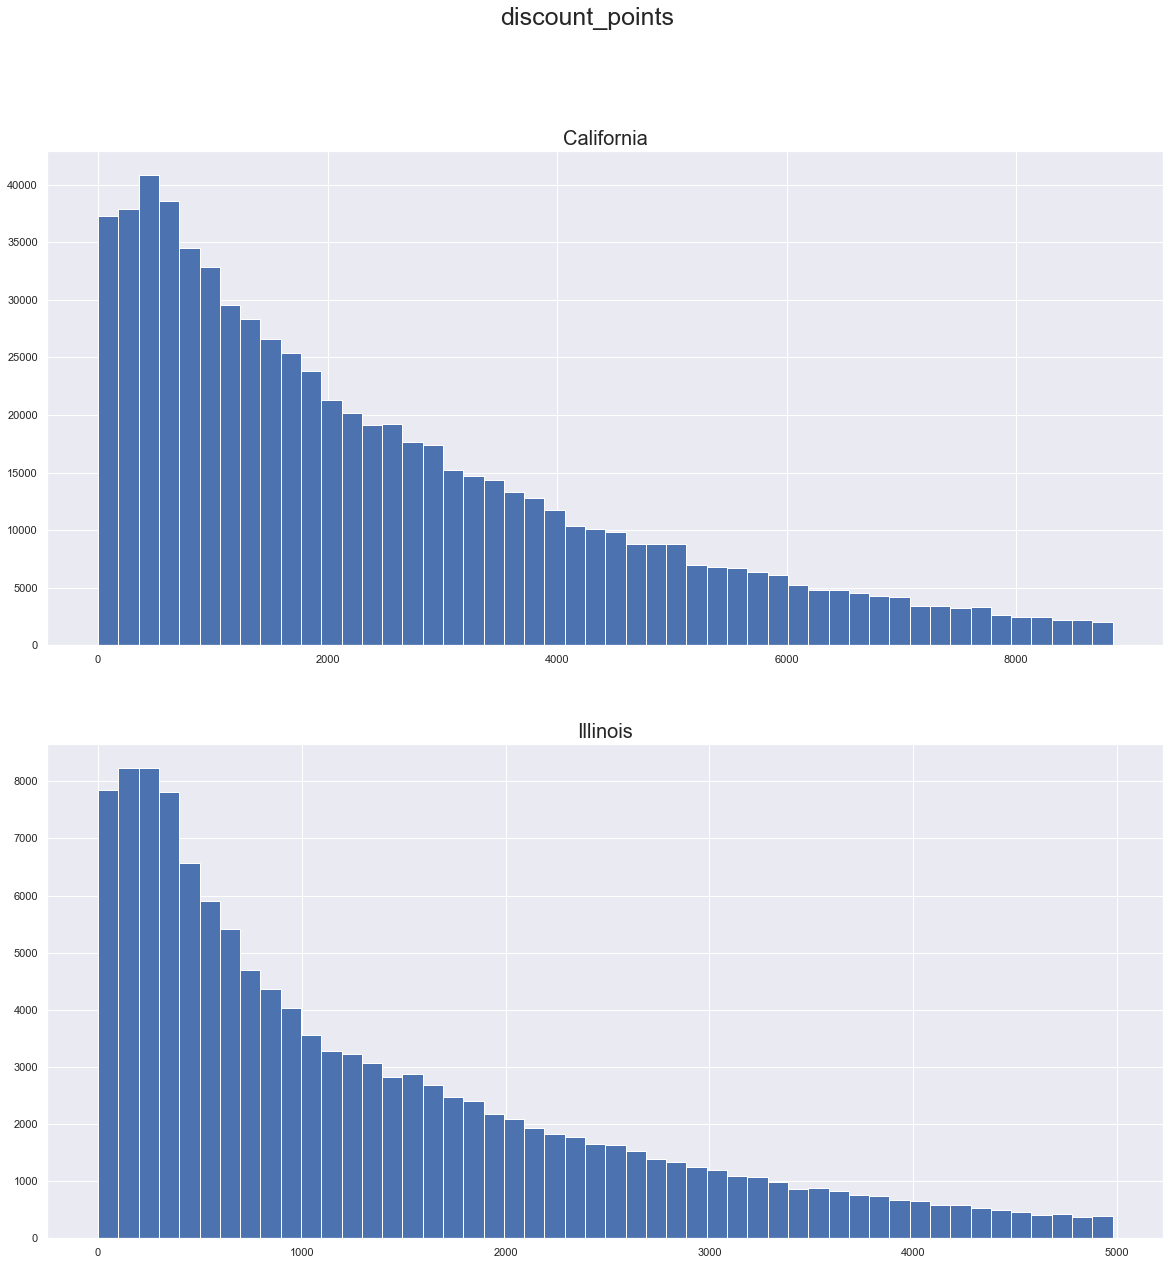

          California       Illinois  California_nol   Illinois_nol
count  735518.000000  128545.000000   697381.000000  122048.000000
mean     3004.956849    1613.132443     2468.749185    1323.004328
std      3259.809198    1804.610292     2056.509849    1176.250220
min         0.004000       0.002000        0.004000       0.002000
25%       856.800000     398.410000      806.250000     377.190000
50%      2042.230000    1026.000000     1895.000000     944.250000
75%      4050.000000    2230.430000     3645.600000    1986.012500
max    272650.000000   47318.050000     8839.750000    4978.130000


-------------------------------------------------------------------


Variable: lender_credits


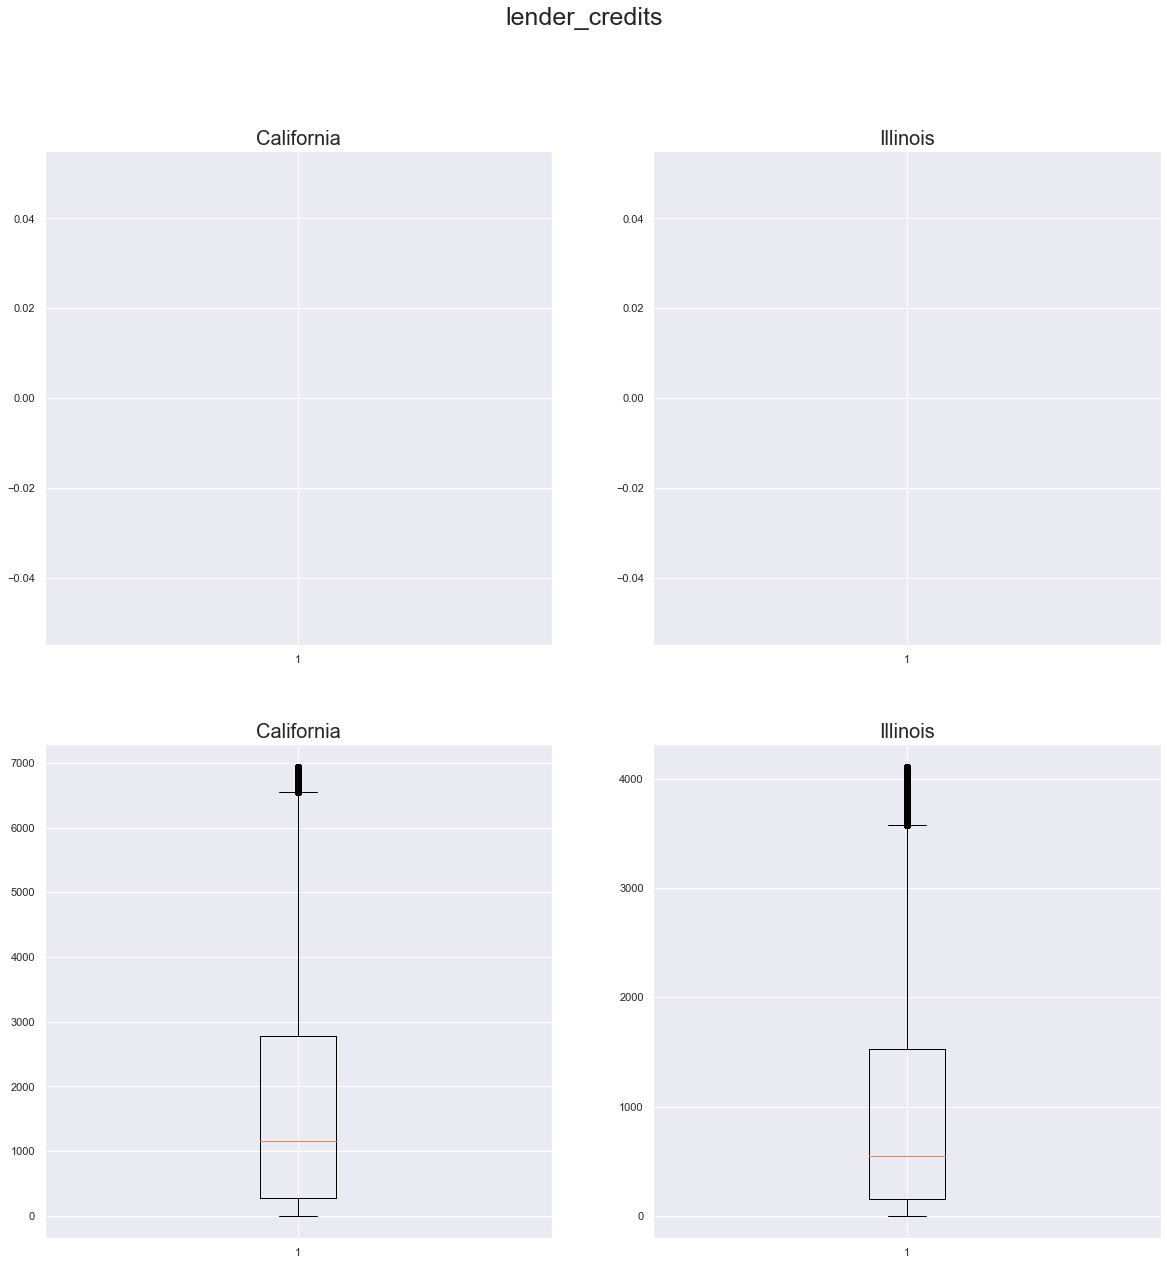

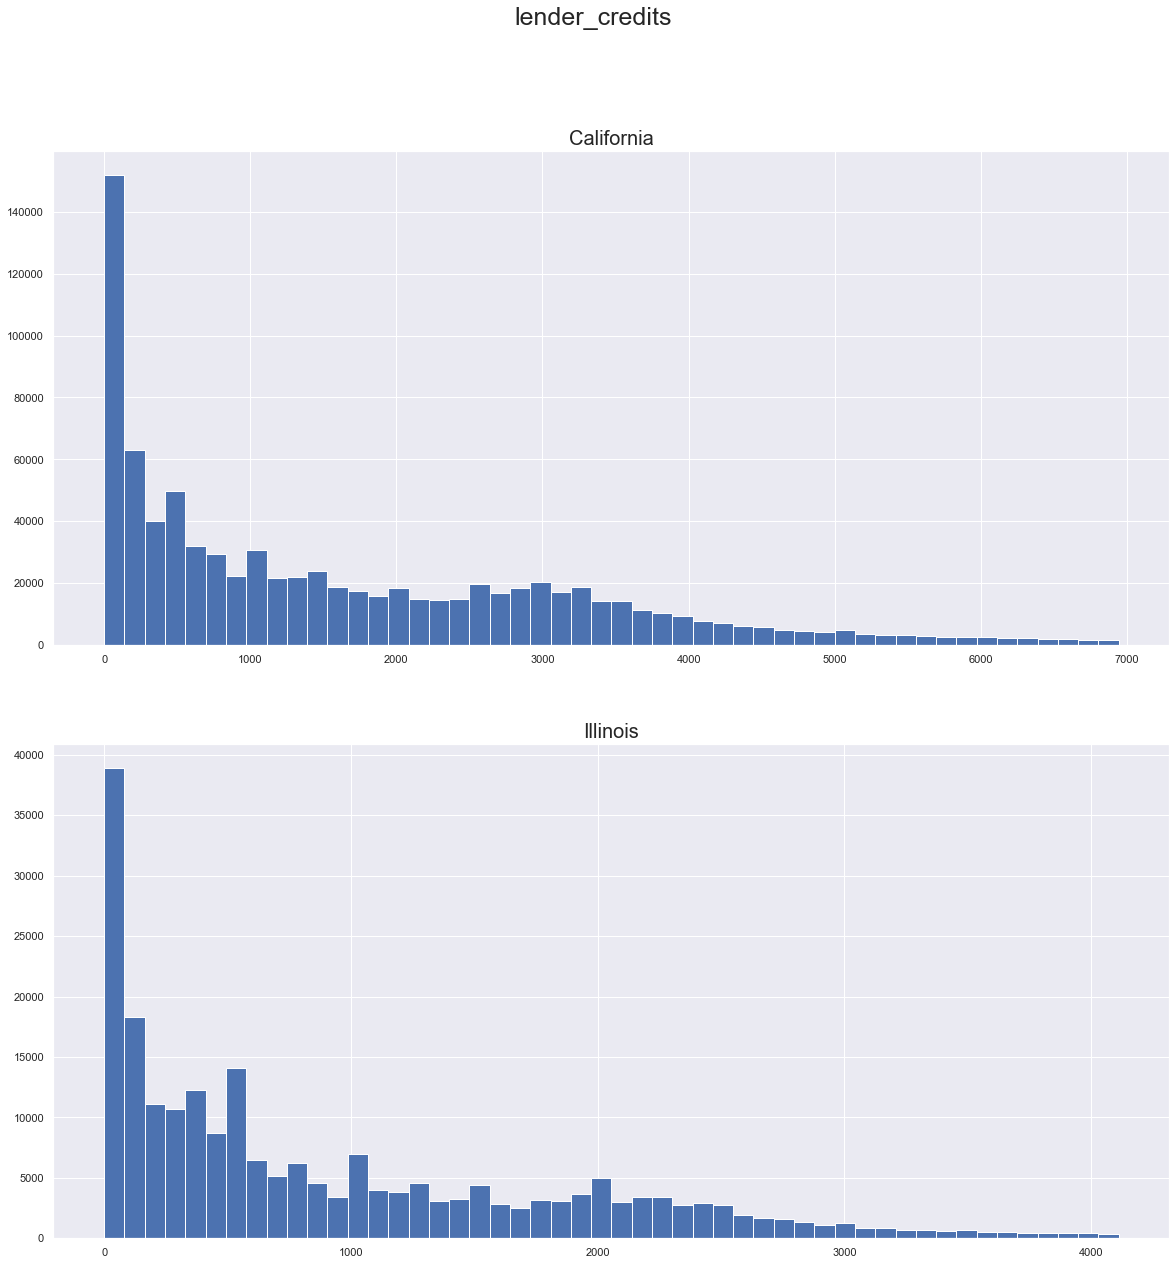

          California       Illinois  California_nol   Illinois_nol
count  883102.000000  234732.000000   852691.000000  224992.000000
mean     1940.177508    1207.824024     1662.843861     940.782996
std      2482.449234    2764.983625     1601.894042     941.389811
min         0.010000       0.010000        0.010000       0.010000
25%       299.000000     175.000000      272.375000     157.080000
50%      1250.000000     611.170000     1155.200000     552.090000
75%      2957.070000    1750.000000     2782.955000    1526.000000
max    678000.000000  464258.090000     6944.000000    4112.200000


-------------------------------------------------------------------


Variable: loan_term


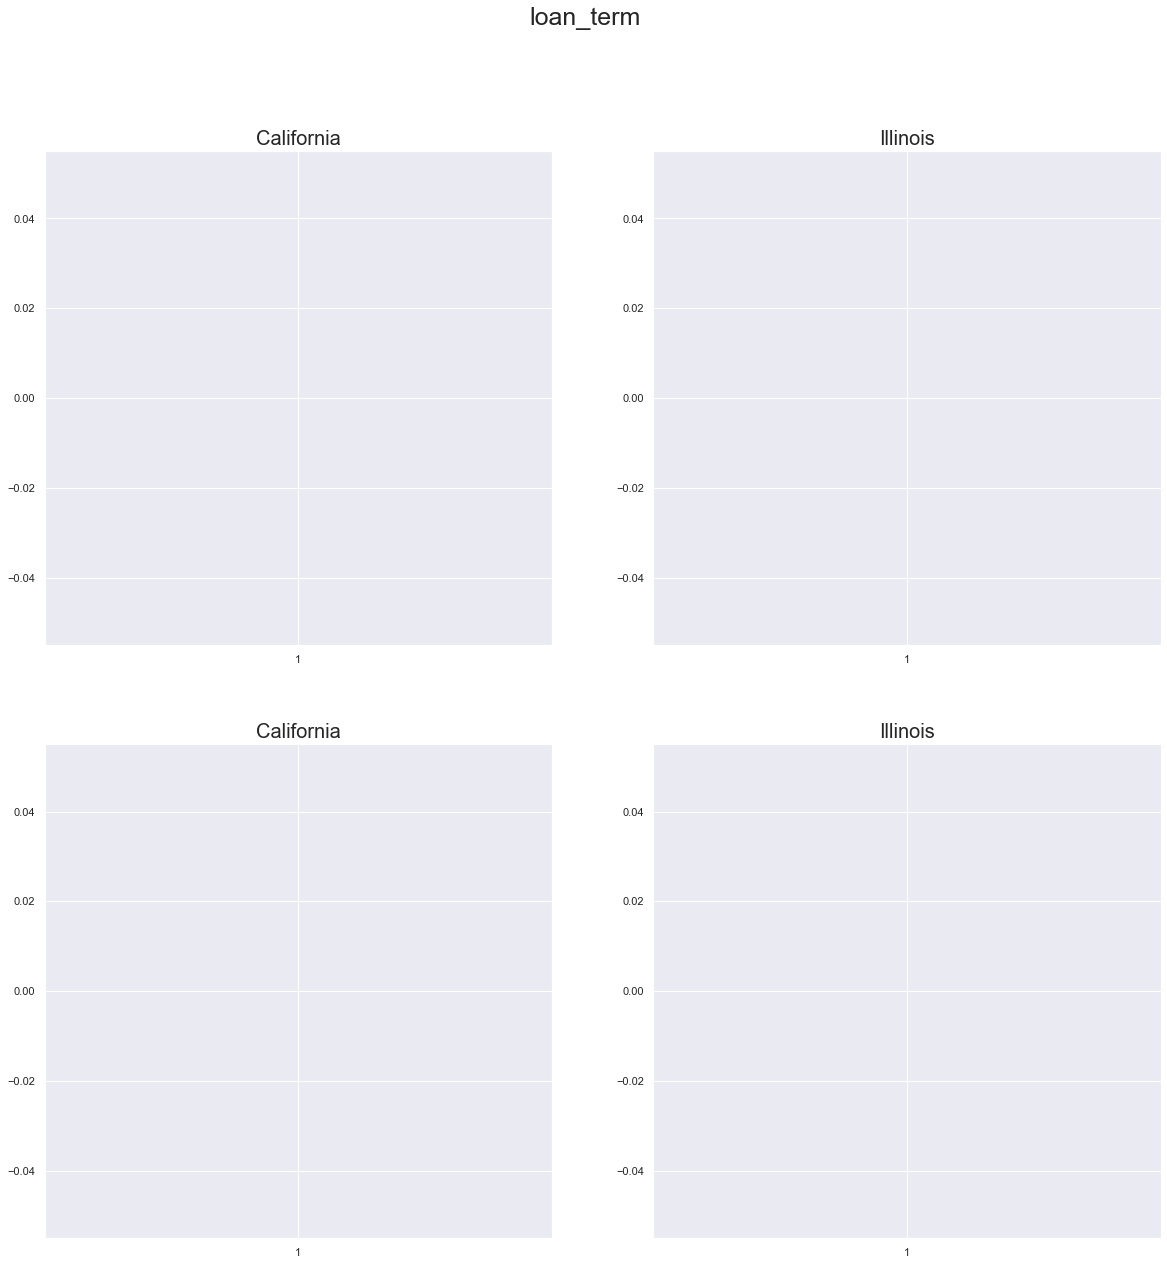

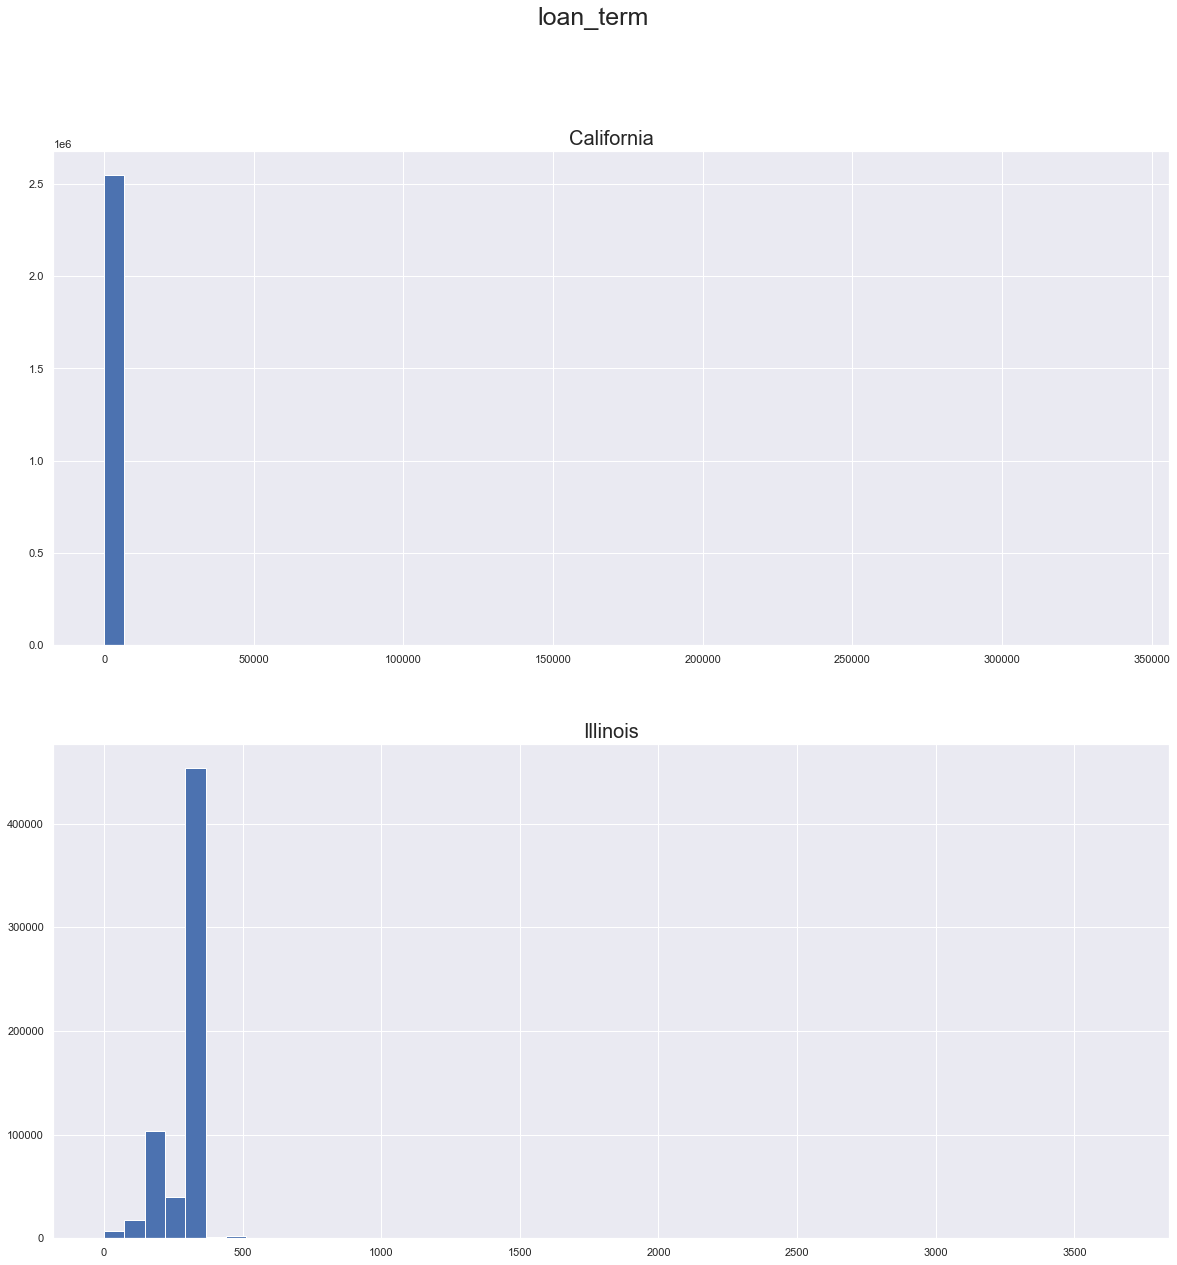

         California       Illinois  California_nol   Illinois_nol
count  2.550367e+06  625362.000000    2.550367e+06  625362.000000
mean   3.325796e+02     311.606100    3.325796e+02     311.606100
std    2.218557e+02      82.753906    2.218557e+02      82.753906
min    1.000000e+00       1.000000    1.000000e+00       1.000000
25%    3.600000e+02     240.000000    3.600000e+02     240.000000
50%    3.600000e+02     360.000000    3.600000e+02     360.000000
75%    3.600000e+02     360.000000    3.600000e+02     360.000000
max    3.390000e+05    3660.000000    3.390000e+05    3660.000000


-------------------------------------------------------------------


Variable: prepayment_penalty_term


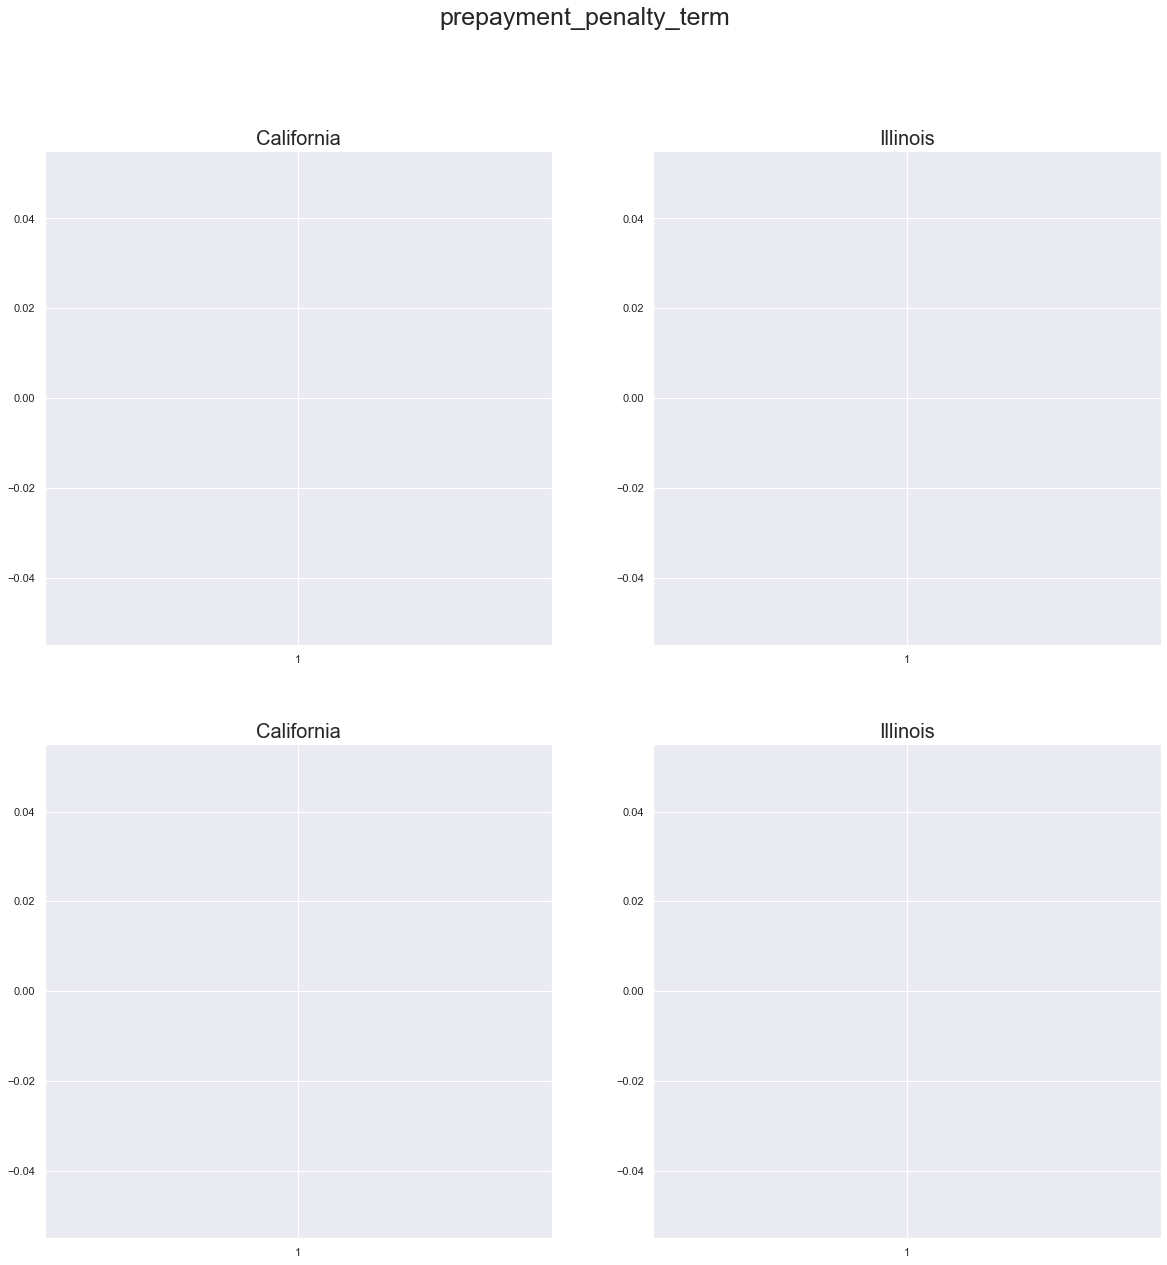

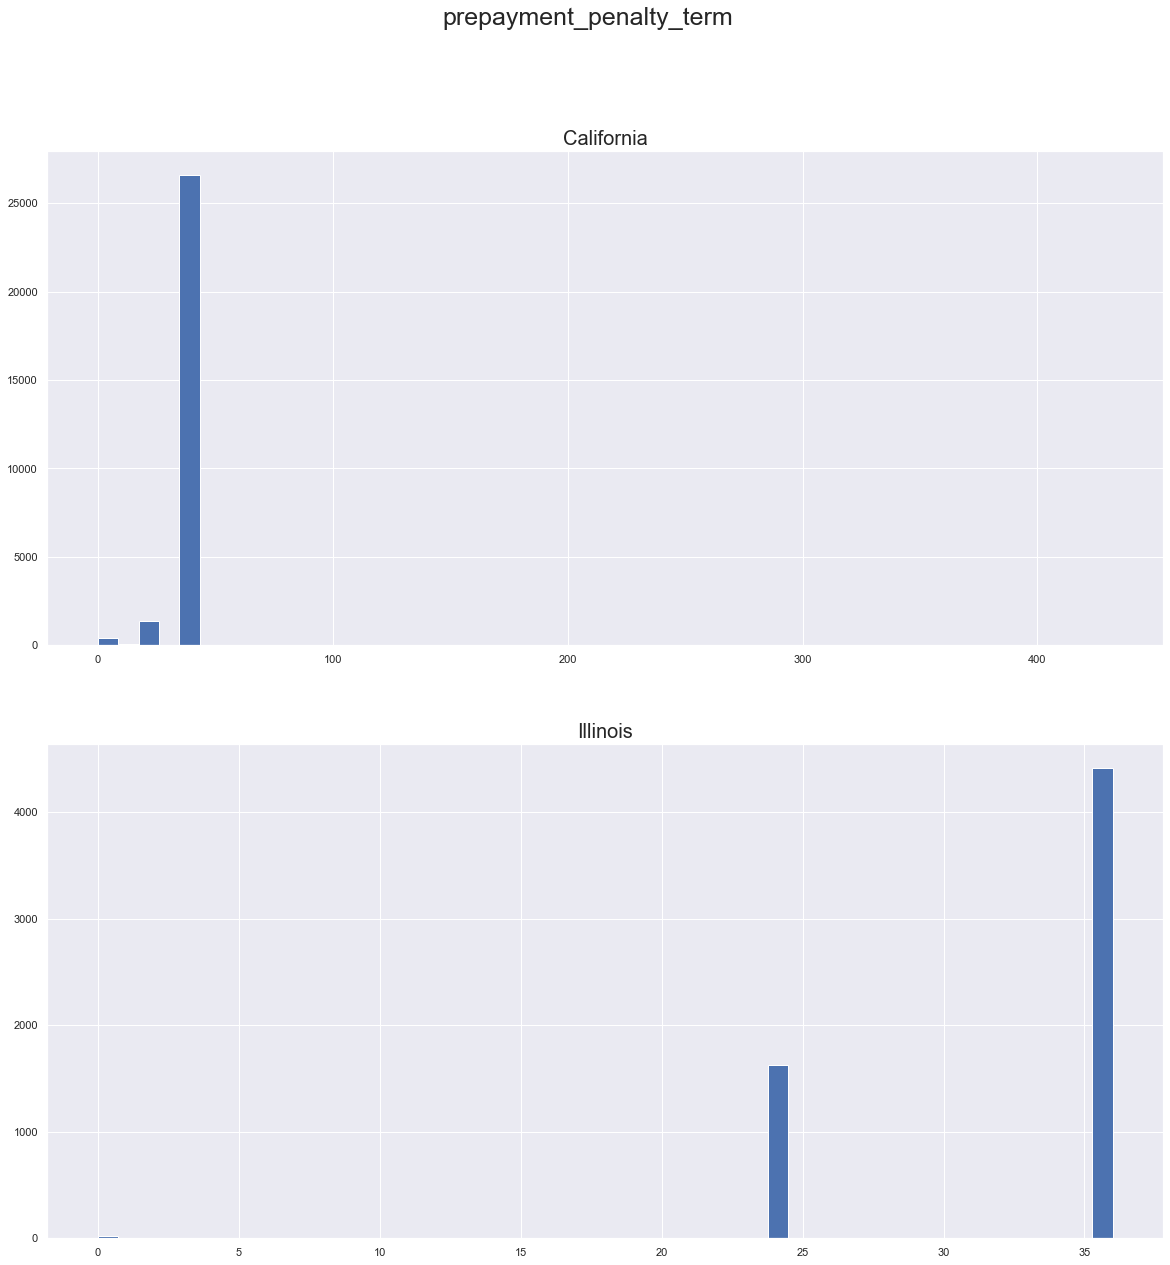

         California     Illinois  California_nol  Illinois_nol
count  28514.000000  6064.000000    28514.000000   6064.000000
mean      34.905064    32.668536       34.905064     32.668536
std        6.191957     5.616647        6.191957      5.616647
min        0.000000     0.000000        0.000000      0.000000
25%       36.000000    24.000000       36.000000     24.000000
50%       36.000000    36.000000       36.000000     36.000000
75%       36.000000    36.000000       36.000000     36.000000
max      432.000000    36.000000      432.000000     36.000000


-------------------------------------------------------------------


Variable: intro_rate_period


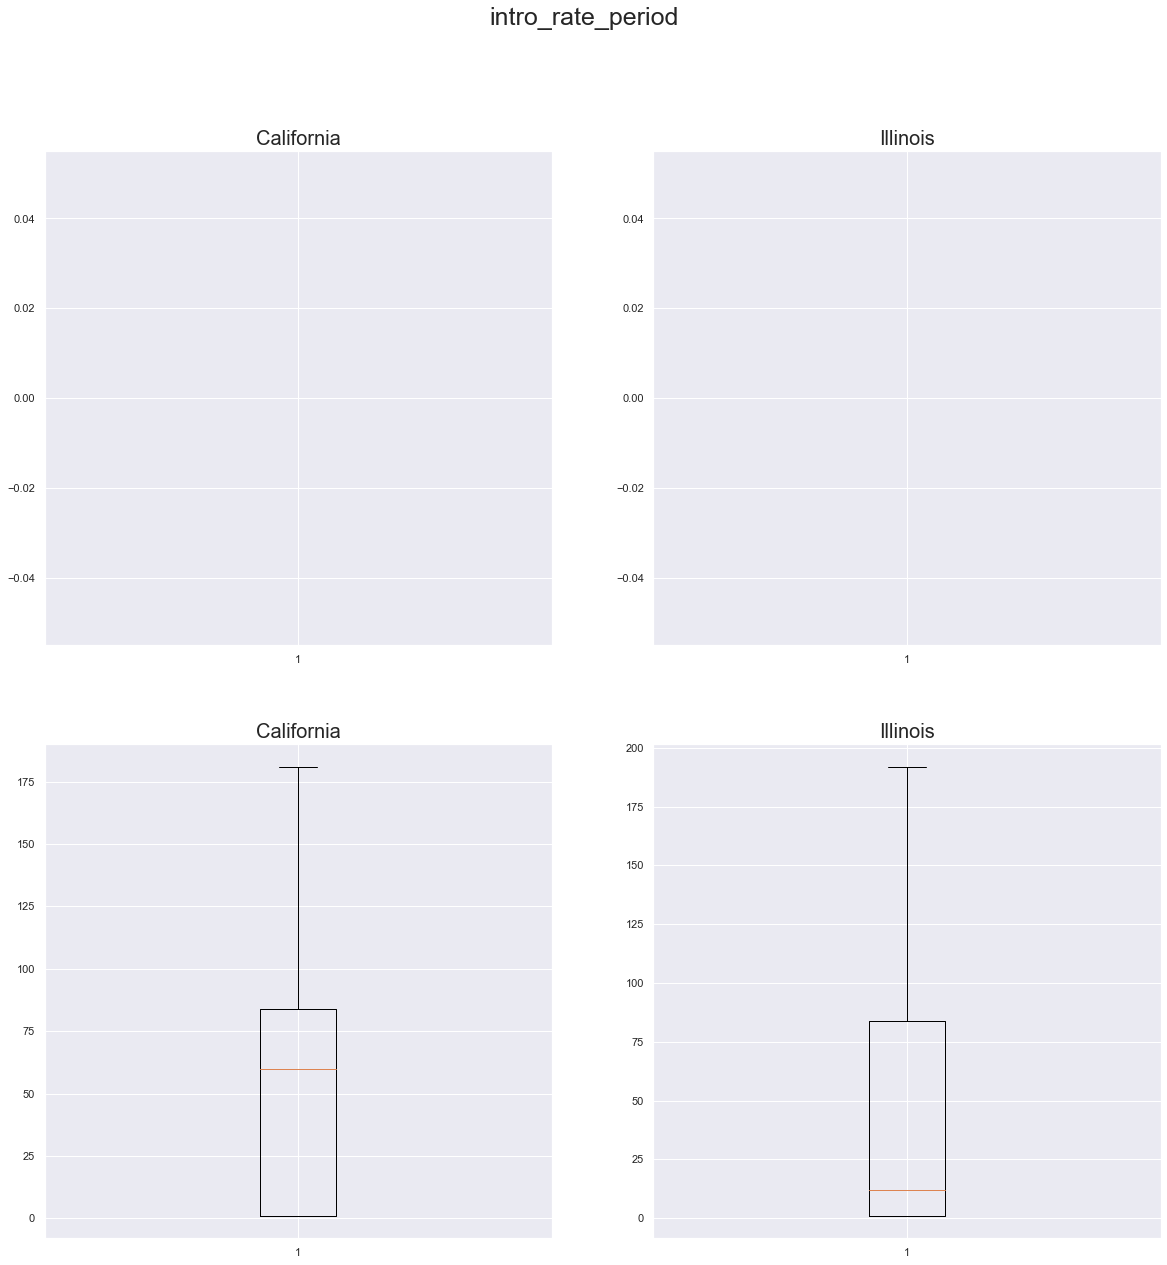

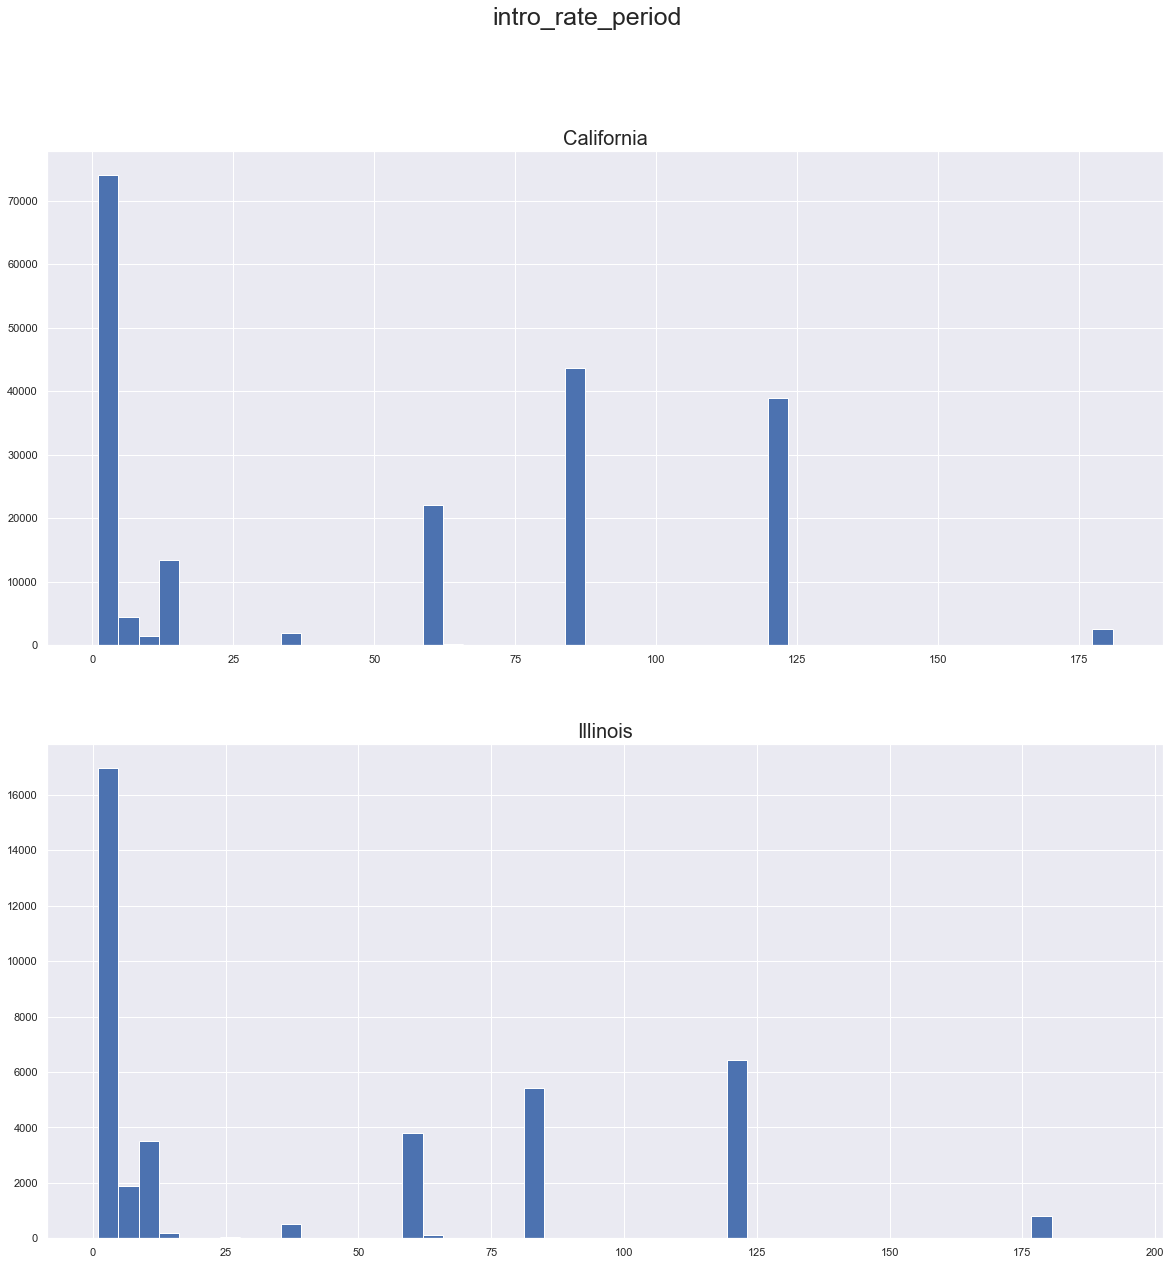

         California      Illinois  California_nol  Illinois_nol
count  2.151370e+05  39896.000000   203015.000000  39773.000000
mean   1.017046e+02     43.915004       51.742236     42.905765
std    1.520403e+04     53.492823       49.352628     50.111718
min    1.000000e+00      1.000000        1.000000      1.000000
25%    1.000000e+00      1.000000        1.000000      1.000000
50%    6.000000e+01     12.000000       60.000000     12.000000
75%    8.400000e+01     84.000000       84.000000     84.000000
max    7.052023e+06   1111.000000      181.000000    192.000000


-------------------------------------------------------------------


Variable: property_value


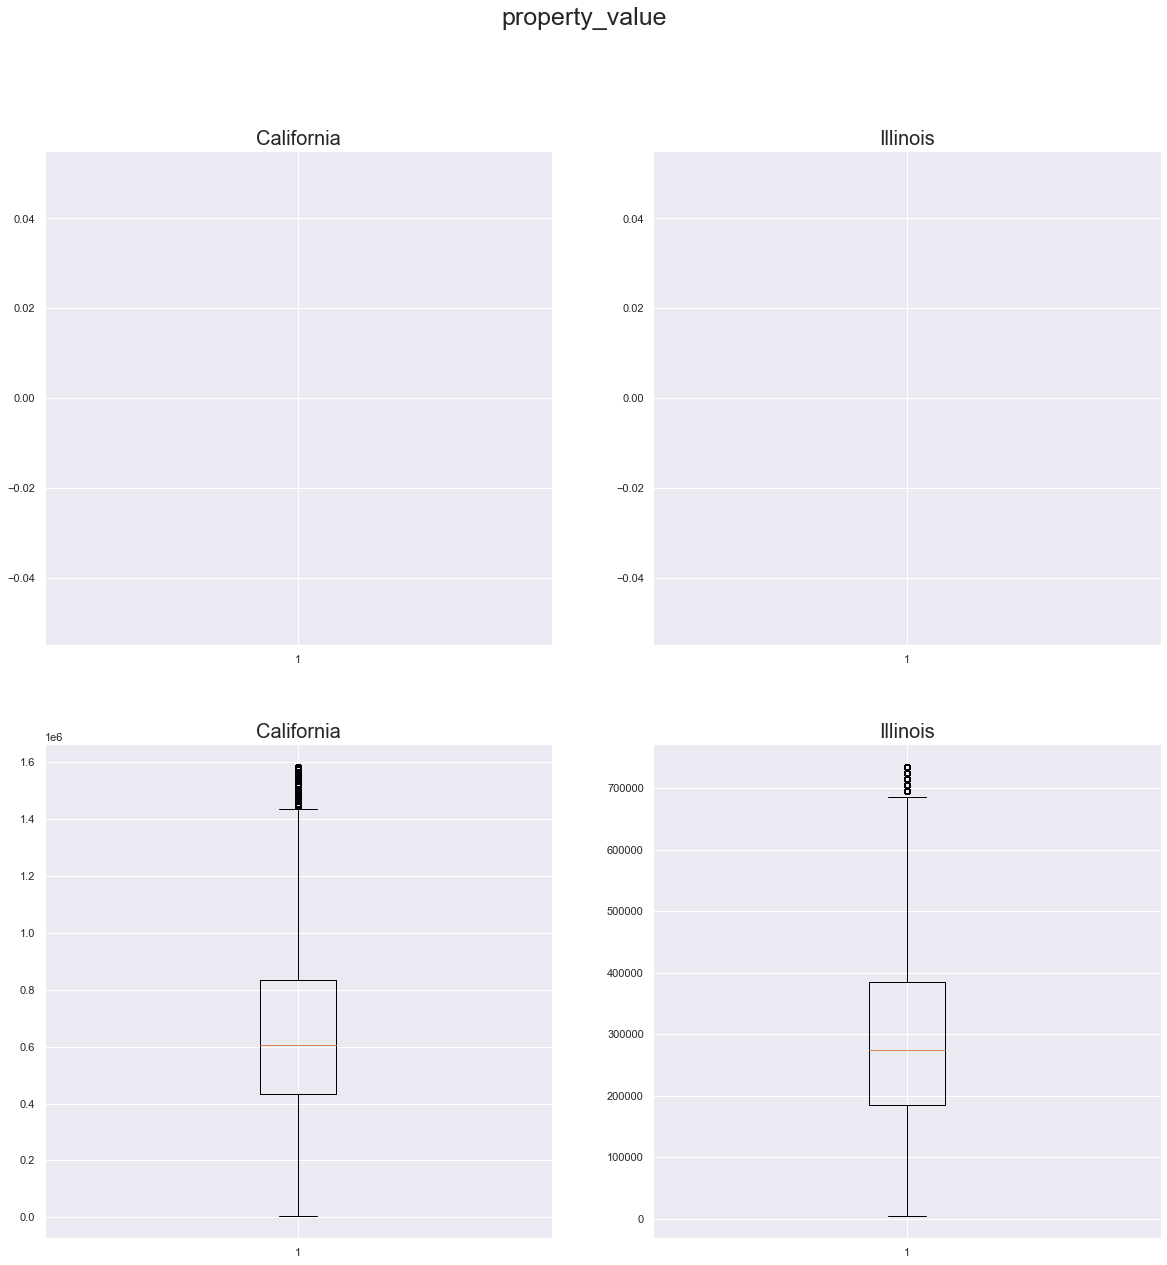

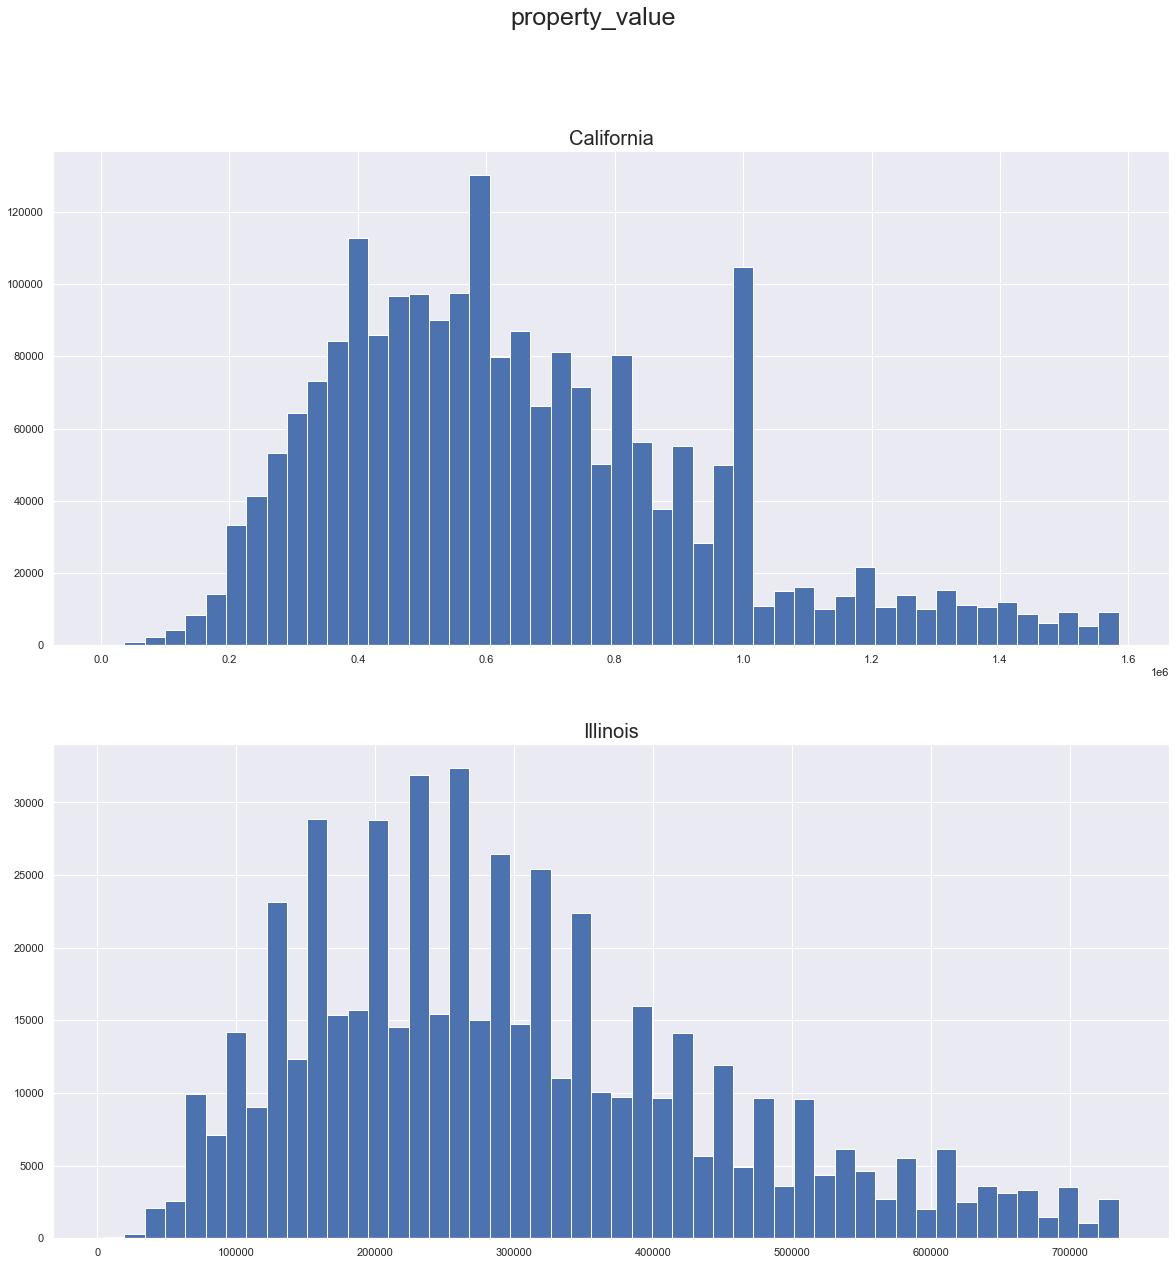

         California      Illinois  California_nol   Illinois_nol
count  2.299967e+06  5.714820e+05    2.149269e+06  536421.000000
mean   8.123435e+05  3.646538e+05    6.558280e+05  298814.932674
std    2.004310e+06  9.437879e+05    2.945699e+05  149108.766181
min    5.000000e+03  5.000000e+03    5.000000e+03    5000.000000
25%    4.450000e+05  1.950000e+05    4.350000e+05  185000.000000
50%    6.350000e+05  2.850000e+05    6.050000e+05  275000.000000
75%    9.050000e+05  4.150000e+05    8.350000e+05  385000.000000
max    1.461385e+09  2.117250e+08    1.585000e+06  735000.000000


-------------------------------------------------------------------


Variable: income


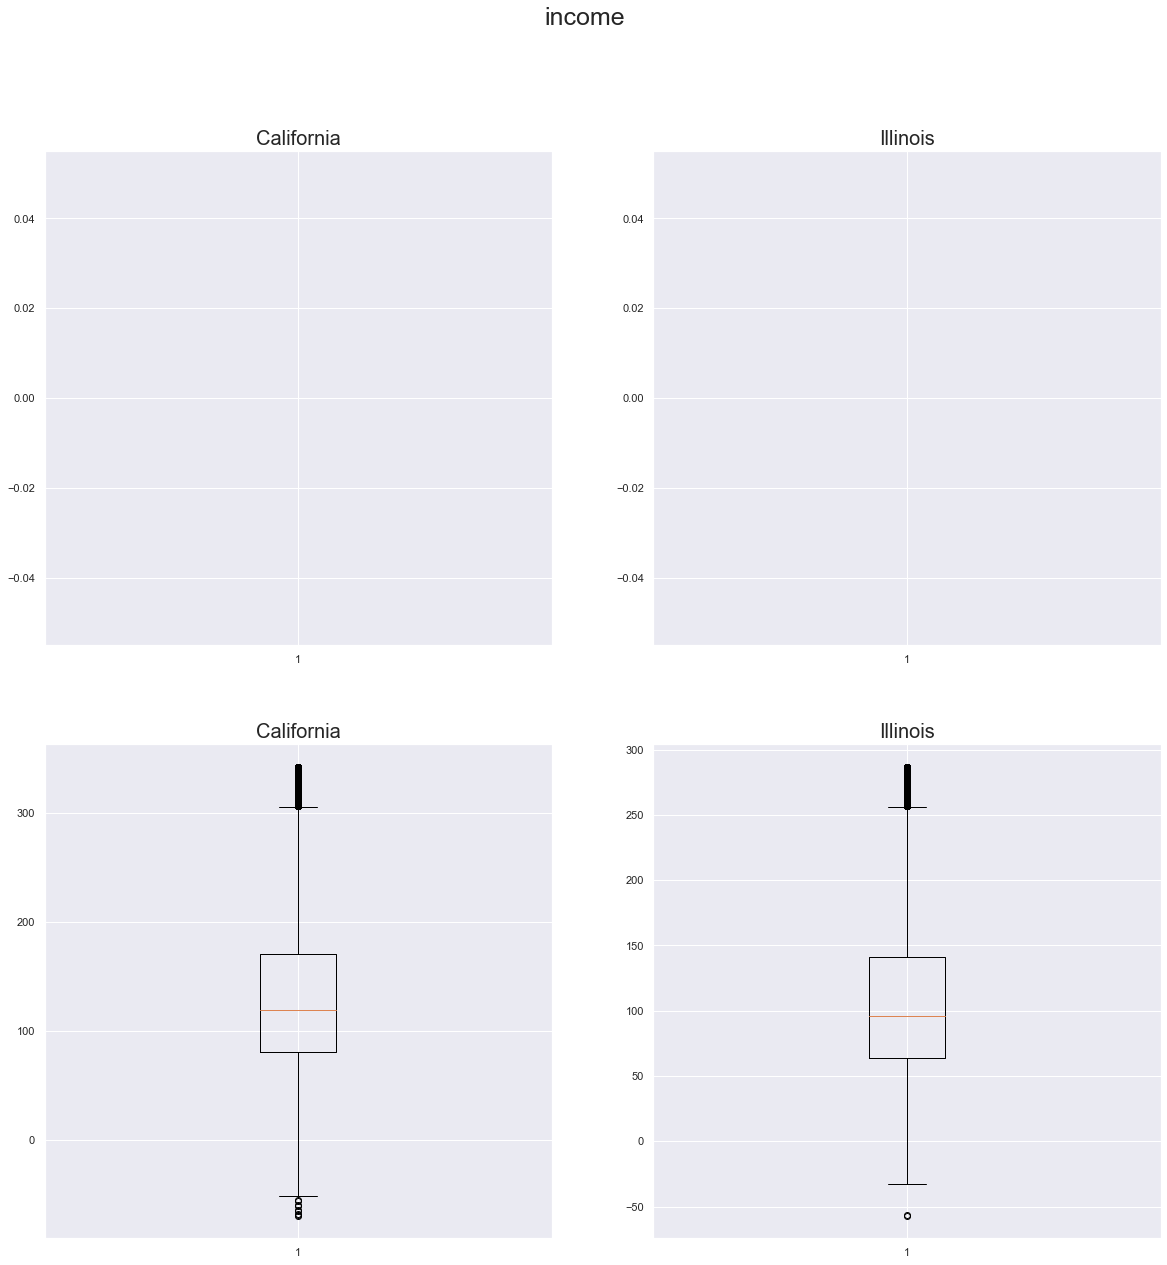

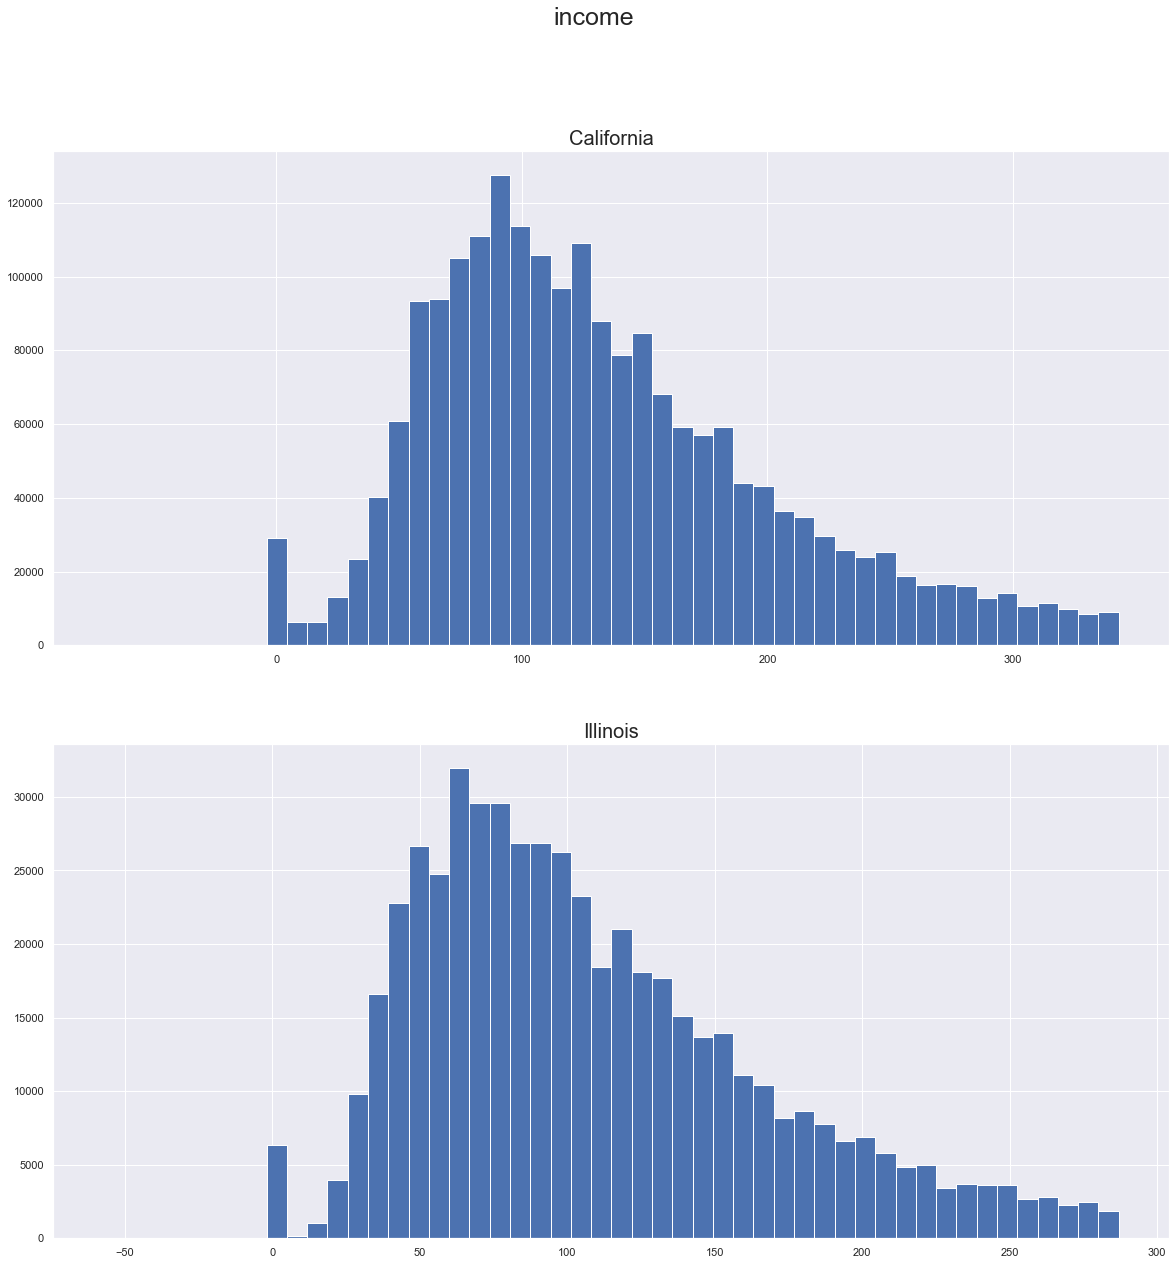

         California      Illinois  California_nol   Illinois_nol
count  2.188717e+06  5.587280e+05    2.038967e+06  526274.000000
mean   7.599702e+02  2.560429e+02    1.318585e+02     107.925520
std    1.035496e+04  5.208392e+03    6.937777e+01      58.401607
min   -1.006300e+04 -2.578500e+04   -7.000000e+01     -57.000000
25%    8.400000e+01  6.500000e+01    8.100000e+01      64.000000
50%    1.250000e+02  1.000000e+02    1.190000e+02      96.000000
75%    1.880000e+02  1.540000e+02    1.710000e+02     141.000000
max    3.861652e+06  1.982668e+06    3.430000e+02     287.000000


-------------------------------------------------------------------


Variable: multifamily_affordable_units


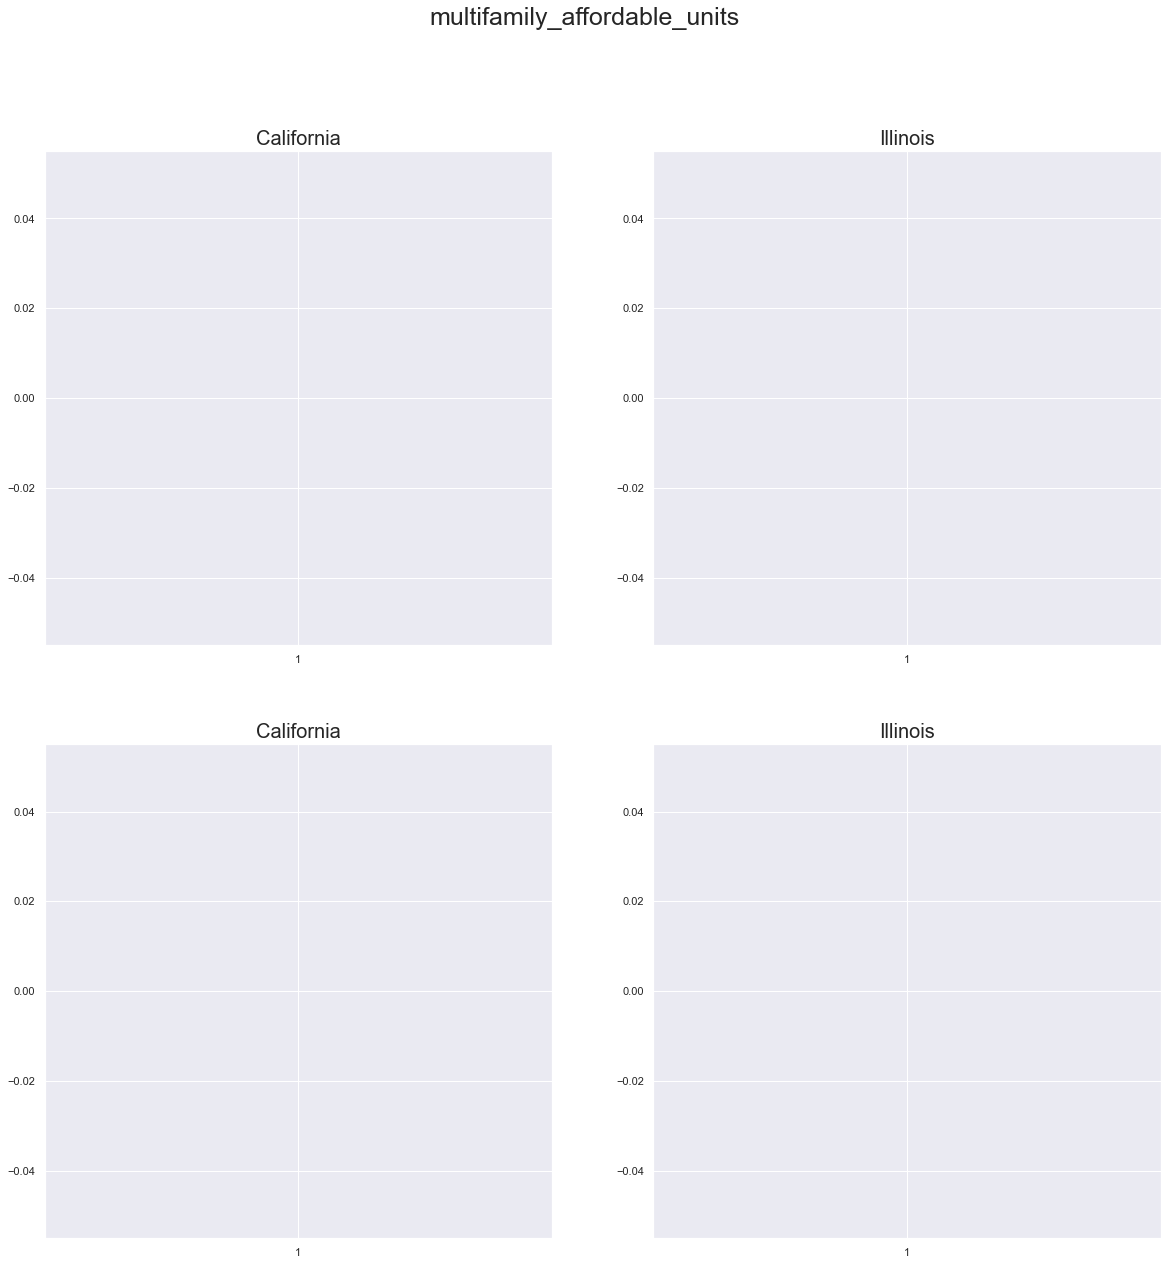

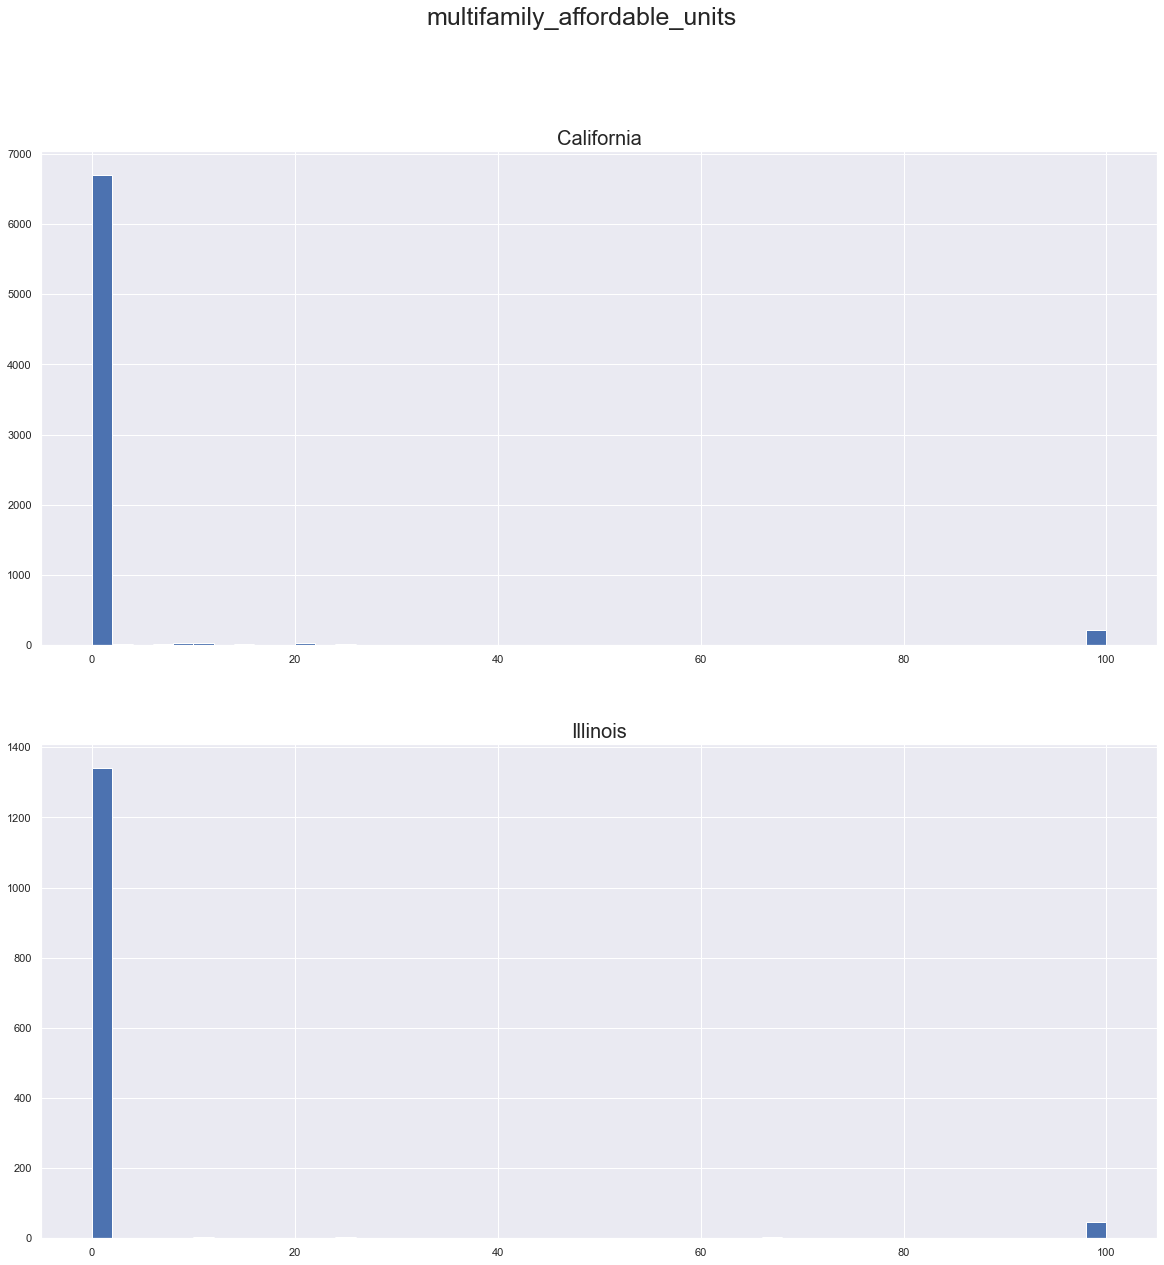

        California     Illinois  California_nol  Illinois_nol
count  7210.000000  1426.000000     7210.000000   1426.000000
mean      4.100277     4.424264        4.100277      4.424264
std      18.304875    19.545760       18.304875     19.545760
min       0.000000     0.000000        0.000000      0.000000
25%       0.000000     0.000000        0.000000      0.000000
50%       0.000000     0.000000        0.000000      0.000000
75%       0.000000     0.000000        0.000000      0.000000
max     100.000000   100.000000      100.000000    100.000000


-------------------------------------------------------------------


Variable: tract_population


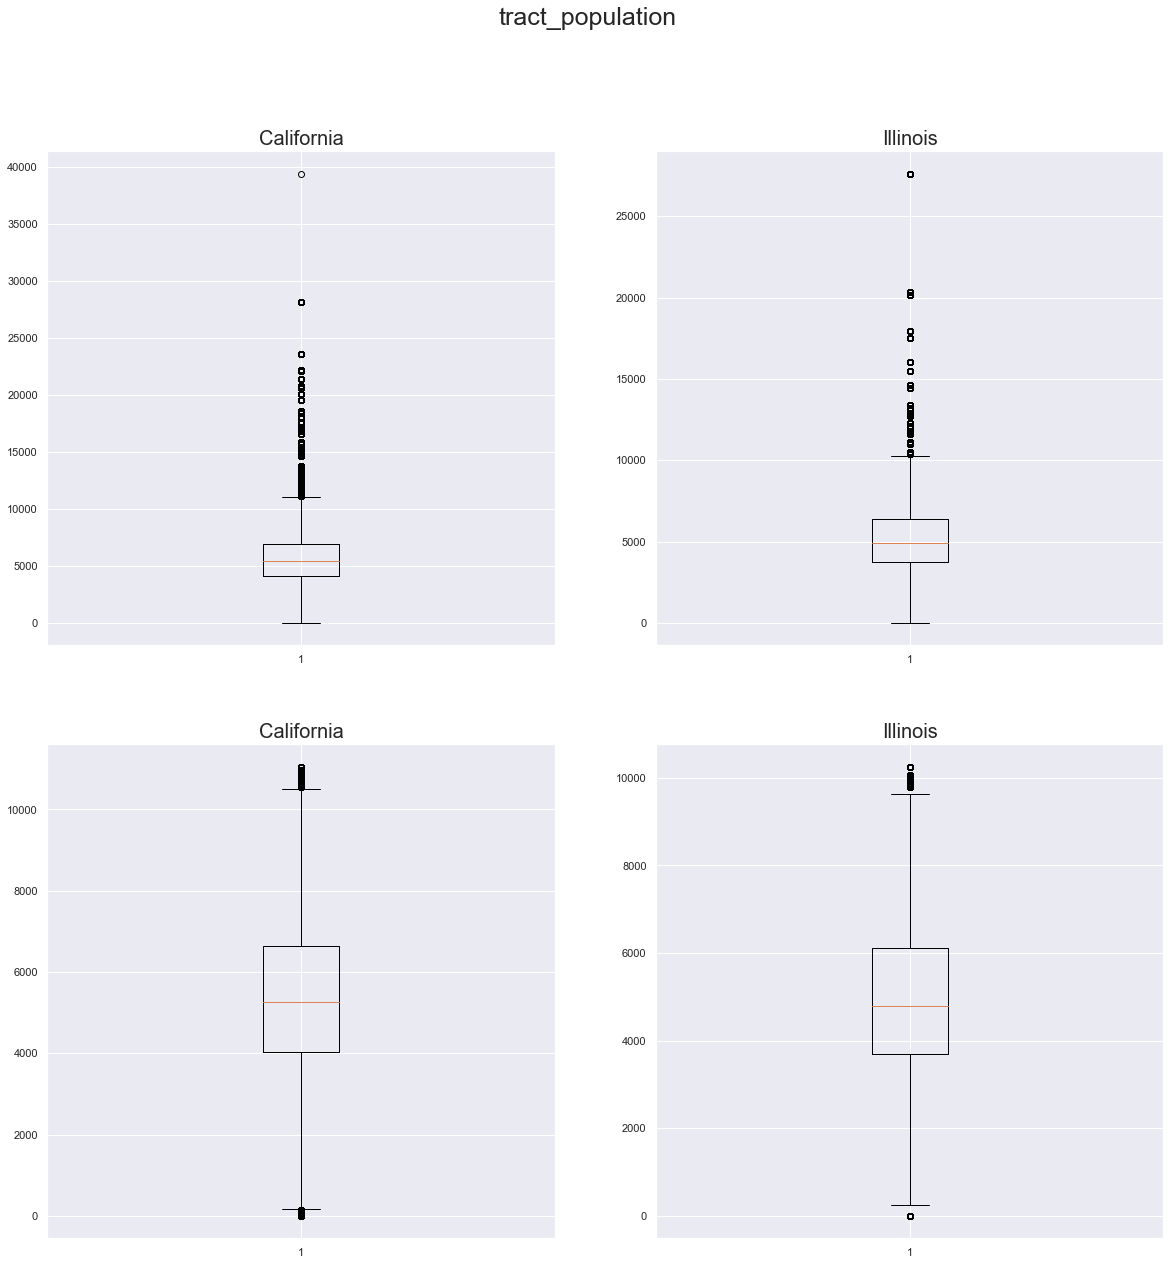

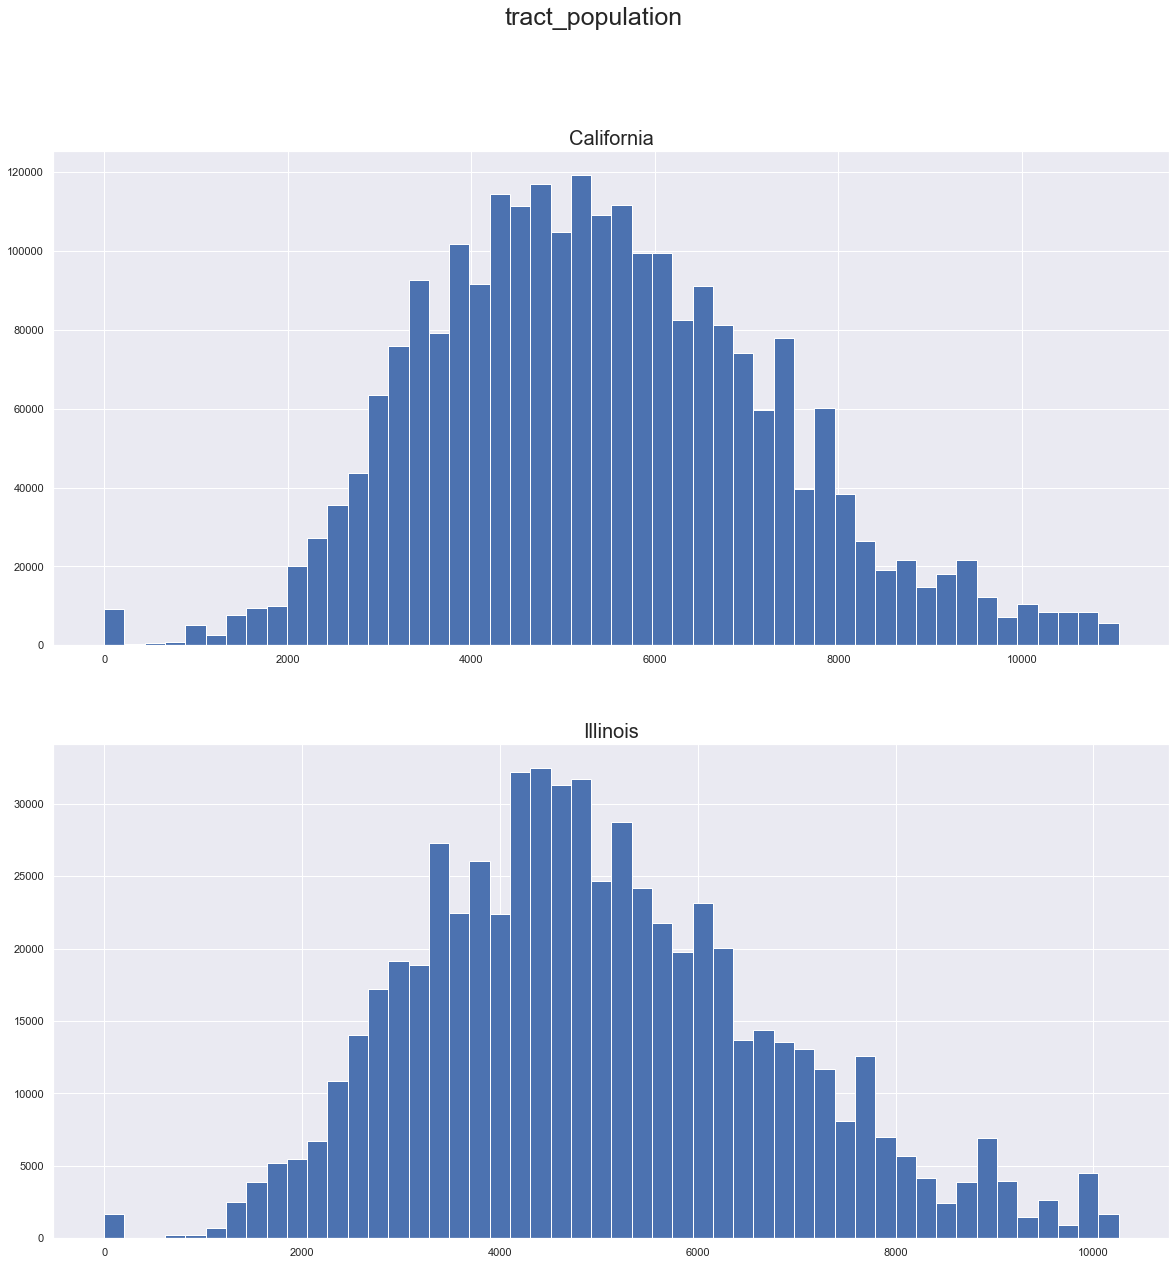

         California       Illinois  California_nol   Illinois_nol
count  2.584267e+06  662236.000000    2.452530e+06  627440.000000
mean   5.899268e+03    5559.431905    5.403250e+03    4986.329713
std    2.950117e+03    3202.172999    1.884647e+03    1802.253532
min    0.000000e+00       0.000000    0.000000e+00       0.000000
25%    4.124000e+03    3760.000000    4.041000e+03    3698.000000
50%    5.397000e+03    4915.000000    5.269000e+03    4788.000000
75%    6.903000e+03    6370.000000    6.636000e+03    6107.000000
max    3.945400e+04   27626.000000    1.105400e+04   10256.000000


-------------------------------------------------------------------


Variable: tract_minority_population_percent


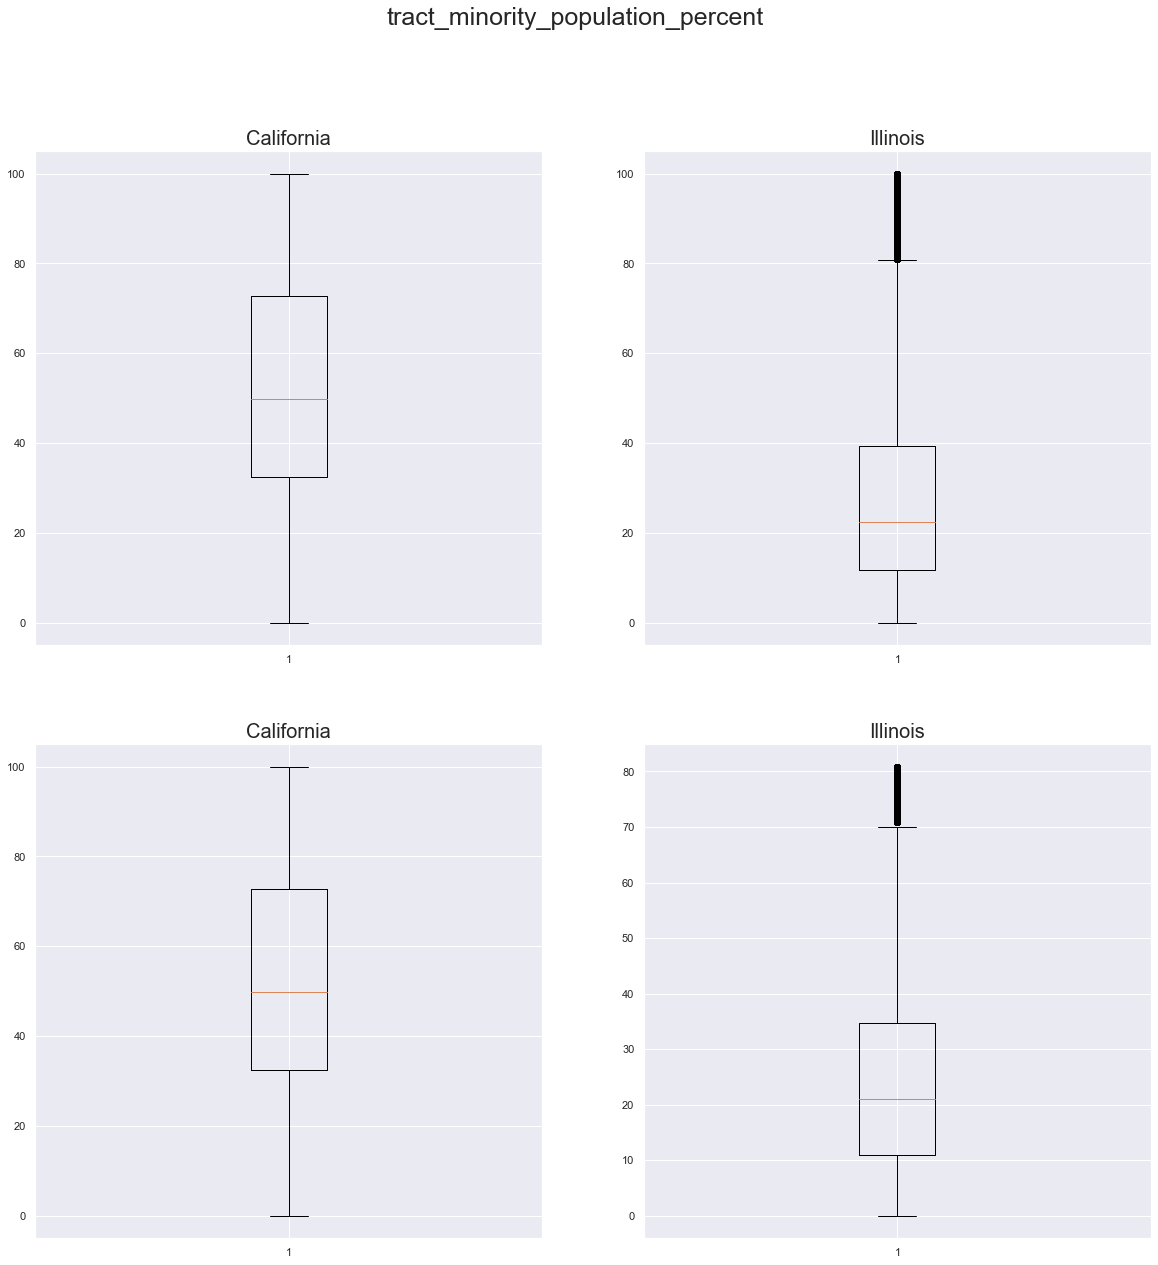

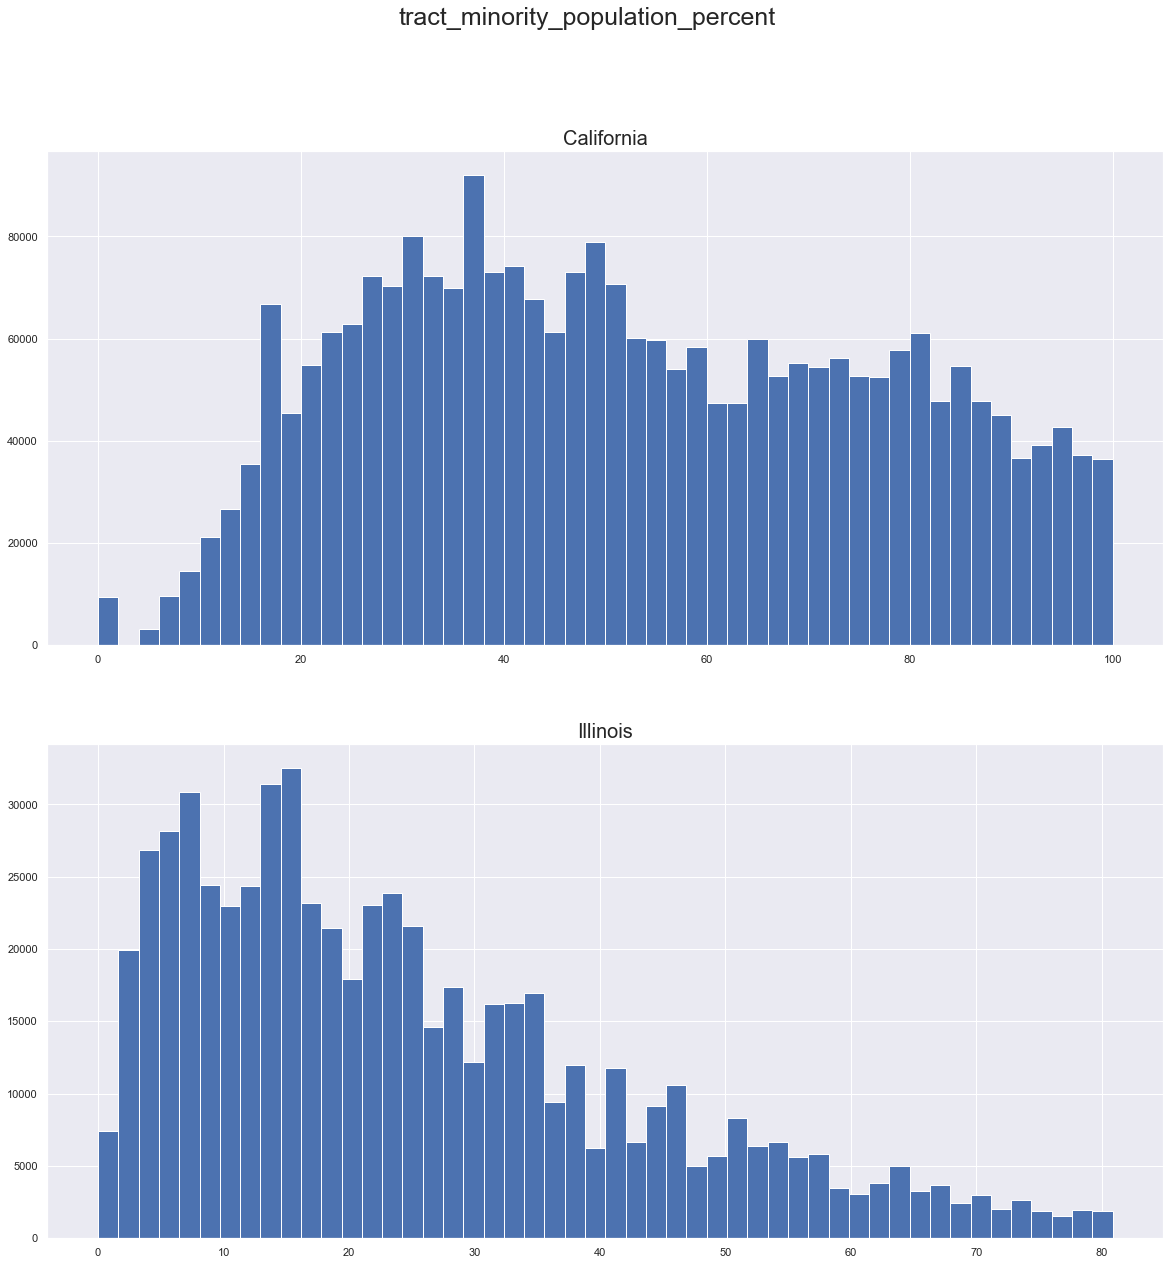

         California       Illinois  California_nol   Illinois_nol
count  2.584267e+06  662236.000000    2.584267e+06  622747.000000
mean   5.232564e+01      29.058288    5.232564e+01      25.010175
std    2.434978e+01      23.750746    2.434978e+01      17.965529
min    0.000000e+00       0.000000    0.000000e+00       0.000000
25%    3.246000e+01      11.720000    3.246000e+01      10.890000
50%    4.989000e+01      22.390000    4.989000e+01      20.980000
75%    7.280000e+01      39.400000    7.280000e+01      34.780000
max    1.000000e+02     100.000000    1.000000e+02      80.870000


-------------------------------------------------------------------


Variable: ffiec_msa_md_median_family_income


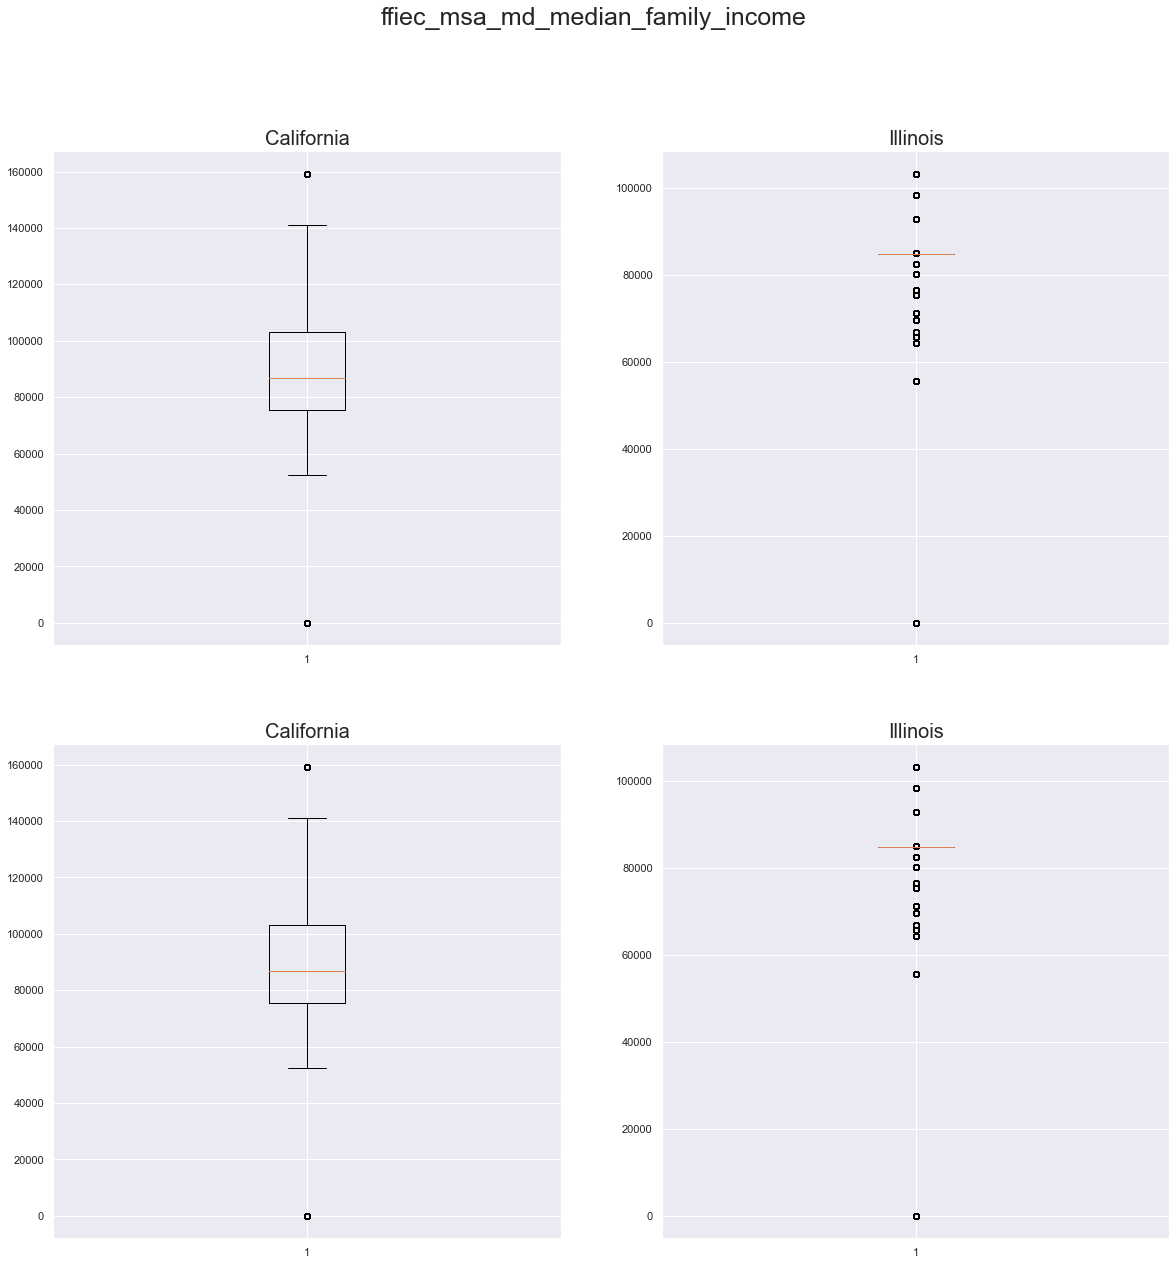

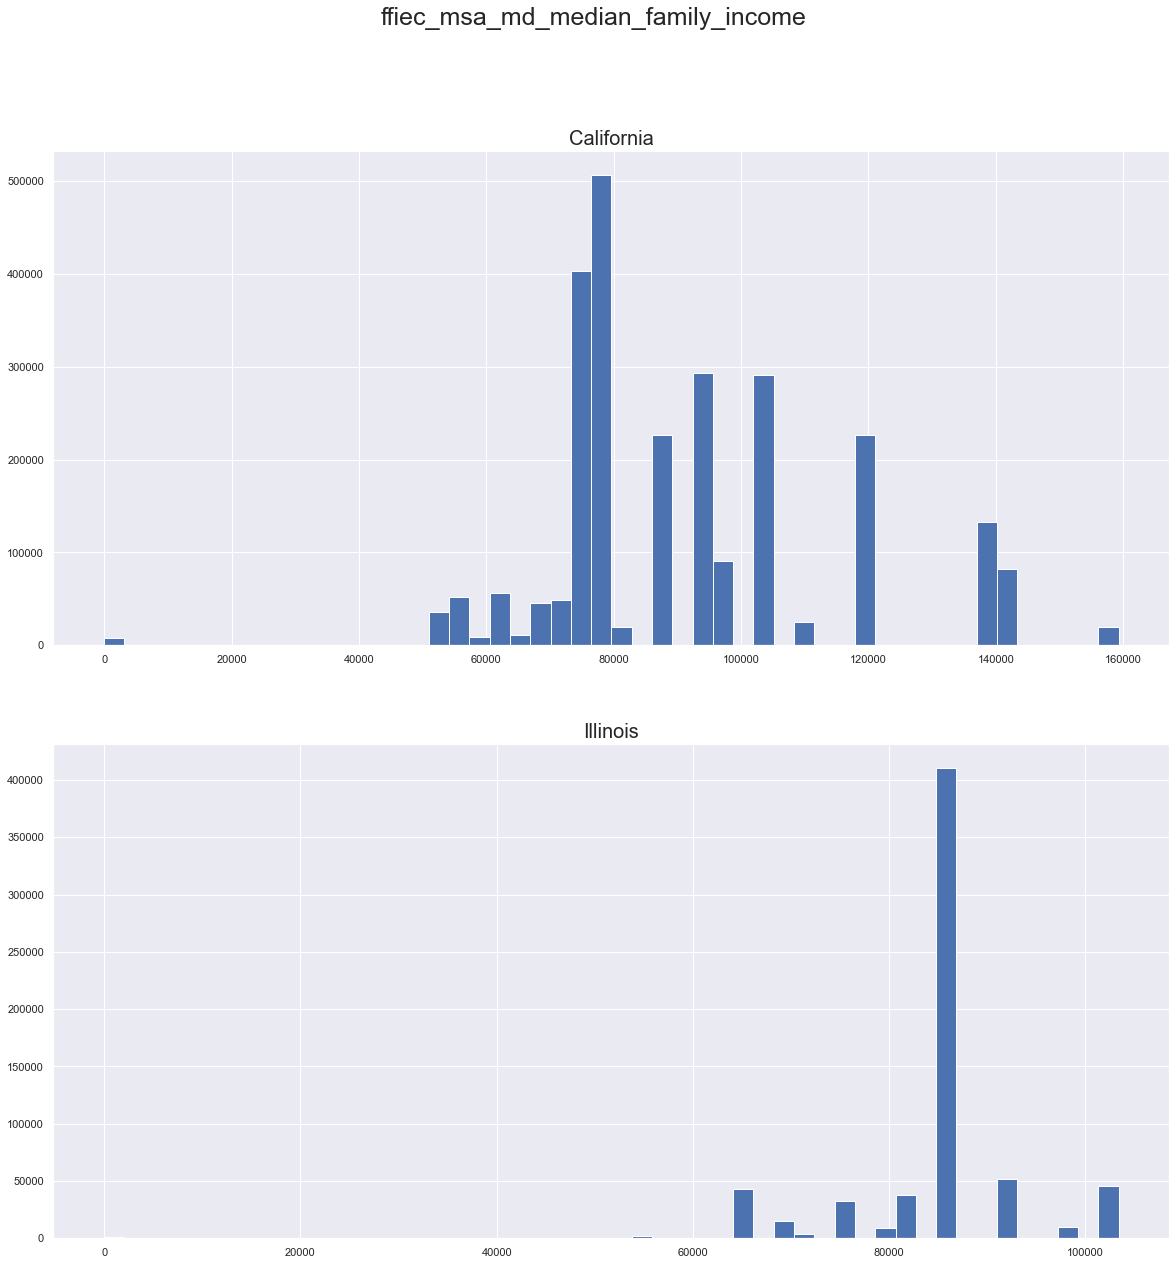

         California       Illinois  California_nol   Illinois_nol
count  2.584267e+06  662236.000000    2.584267e+06  662236.000000
mean   9.137996e+04   84352.162975    9.137996e+04   84352.162975
std    2.275101e+04    9244.320935    2.275101e+04    9244.320935
min    0.000000e+00       0.000000    0.000000e+00       0.000000
25%    7.530000e+04   84800.000000    7.530000e+04   84800.000000
50%    8.670000e+04   84800.000000    8.670000e+04   84800.000000
75%    1.030000e+05   84800.000000    1.030000e+05   84800.000000
max    1.593000e+05  103400.000000    1.593000e+05  103400.000000


-------------------------------------------------------------------


Variable: tract_to_msa_income_percentage


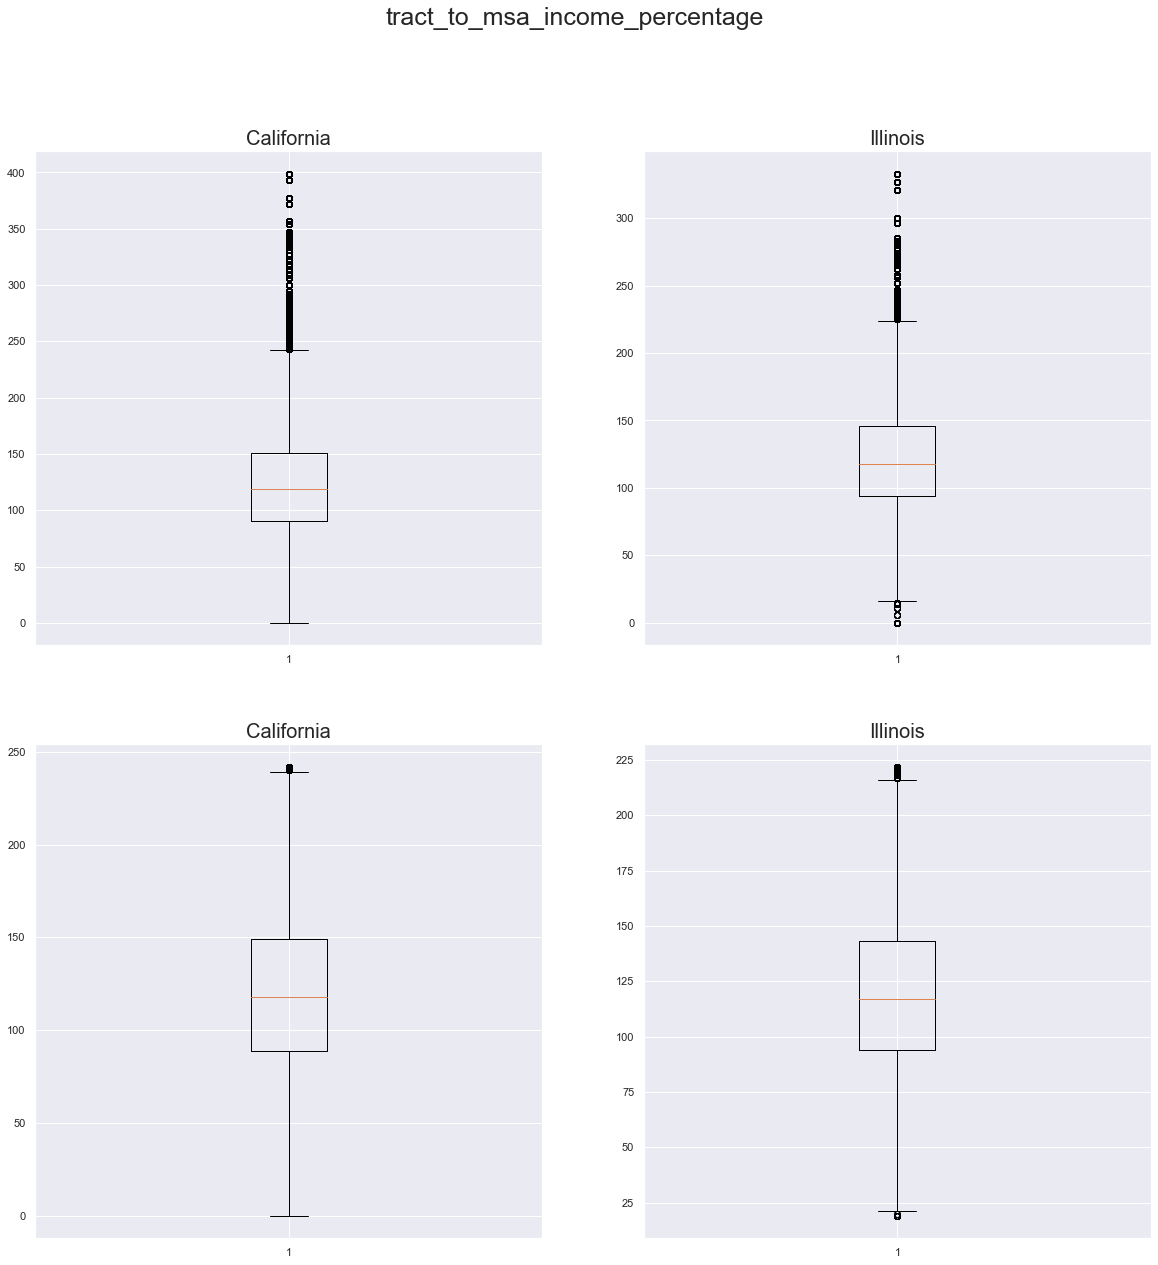

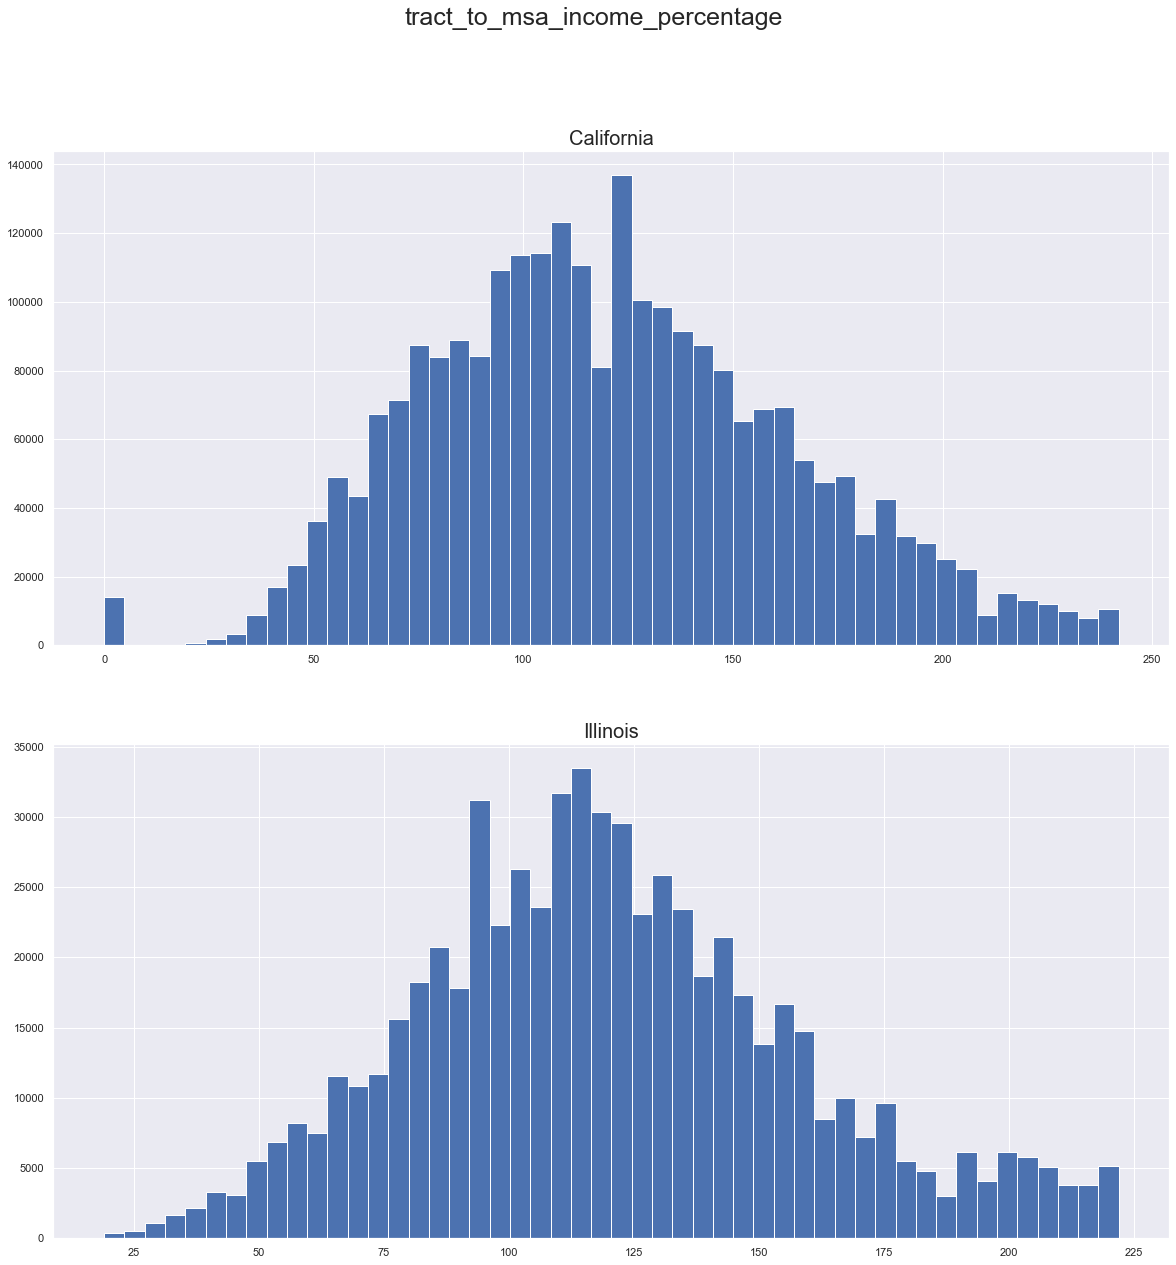

         California       Illinois  California_nol   Illinois_nol
count  2.584267e+06  662236.000000    2.544450e+06  638917.000000
mean   1.232069e+02     123.911104    1.205813e+02     119.920767
std    4.819003e+01      45.989202    4.340539e+01      38.547303
min    0.000000e+00       0.000000    0.000000e+00      19.000000
25%    9.000000e+01      94.000000    8.900000e+01      94.000000
50%    1.190000e+02     118.000000    1.180000e+02     117.000000
75%    1.510000e+02     146.000000    1.490000e+02     143.000000
max    3.990000e+02     333.000000    2.420000e+02     222.000000


-------------------------------------------------------------------


Variable: tract_owner_occupied_units


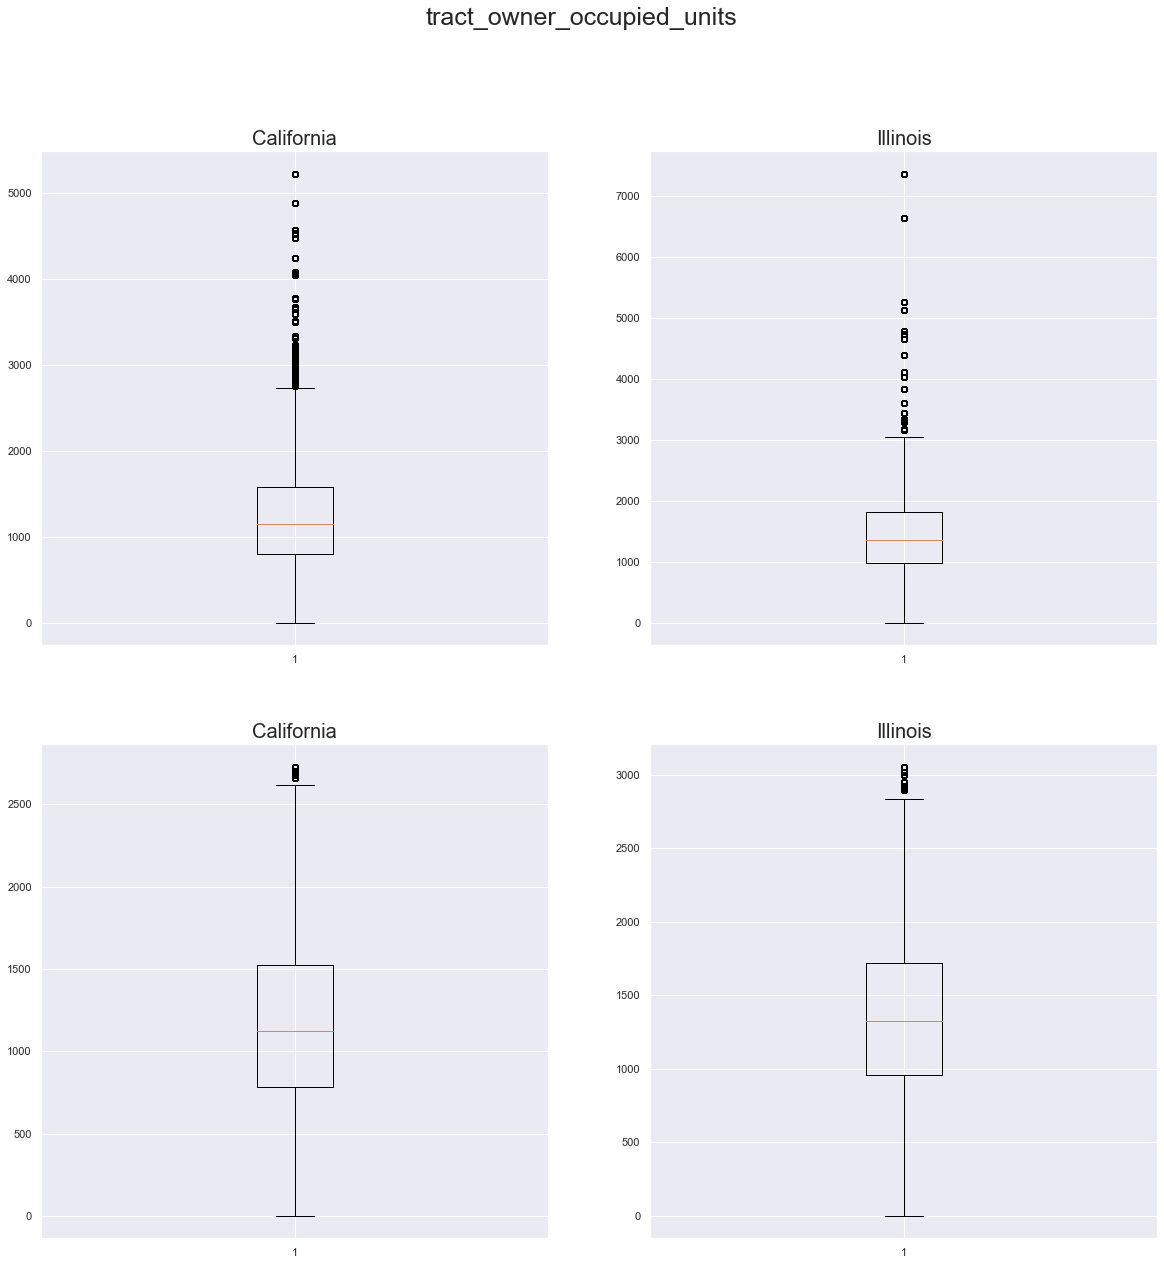

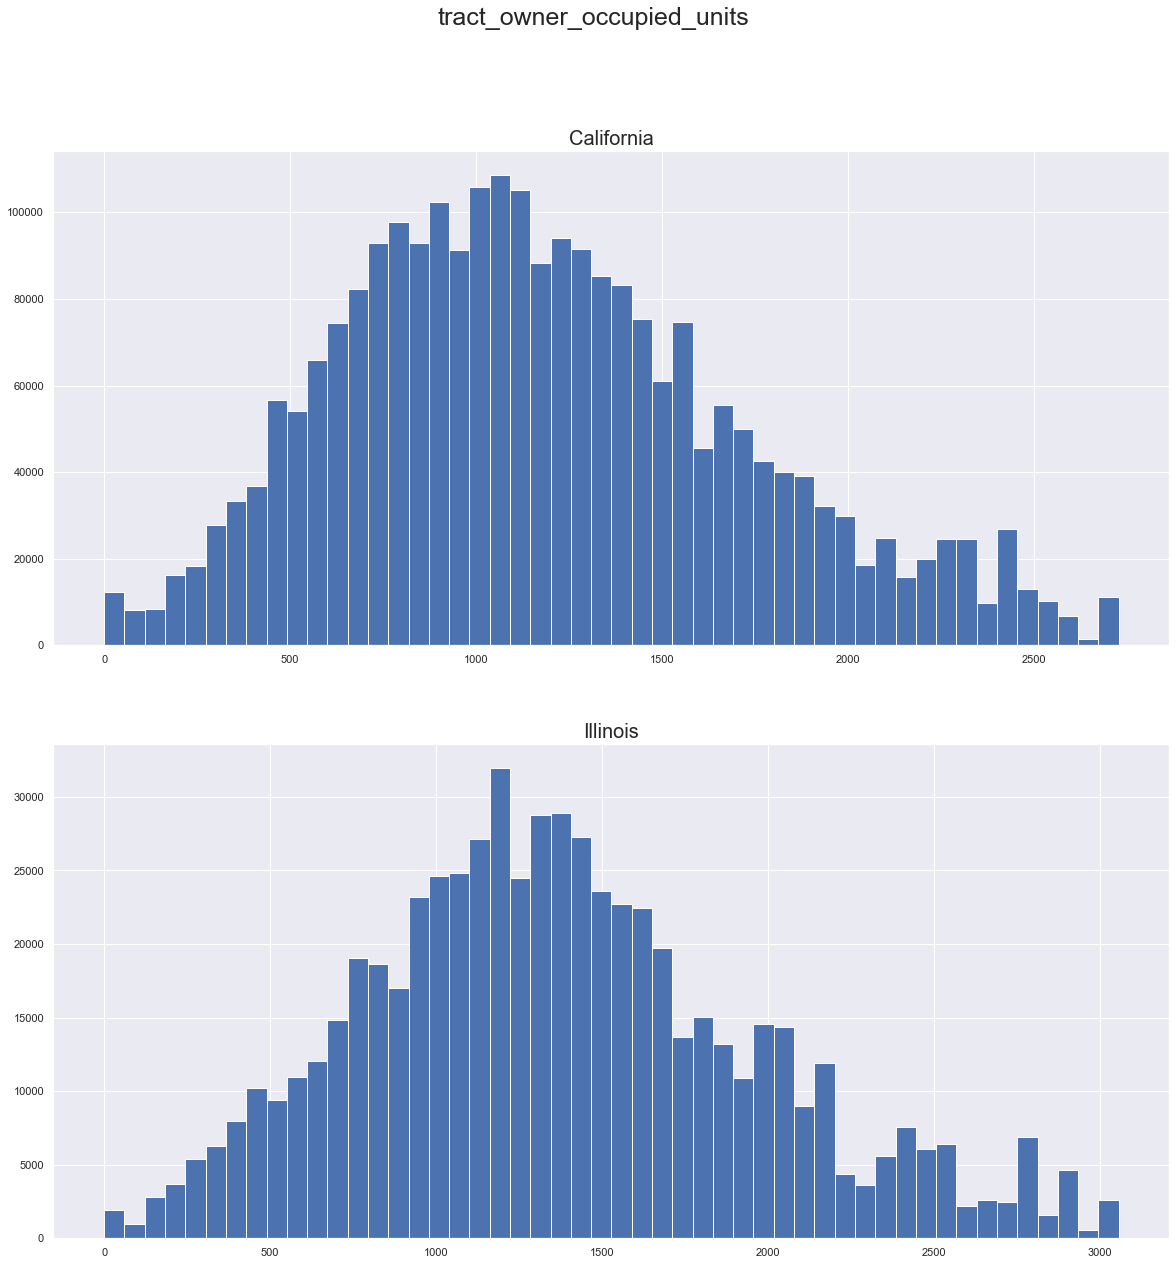

         California       Illinois  California_nol   Illinois_nol
count  2.584267e+06  662236.000000    2.487563e+06  630548.000000
mean   1.269259e+03    1523.772265    1.182643e+03    1368.018826
std    7.044486e+02     947.042071    5.455614e+02     596.126935
min    0.000000e+00       0.000000    0.000000e+00       0.000000
25%    7.960000e+02     981.000000    7.810000e+02     958.000000
50%    1.147000e+03    1359.000000    1.122000e+03    1323.000000
75%    1.578000e+03    1815.000000    1.526000e+03    1723.000000
max    5.229000e+03    7369.000000    2.729000e+03    3056.000000


-------------------------------------------------------------------


Variable: tract_one_to_four_family_homes


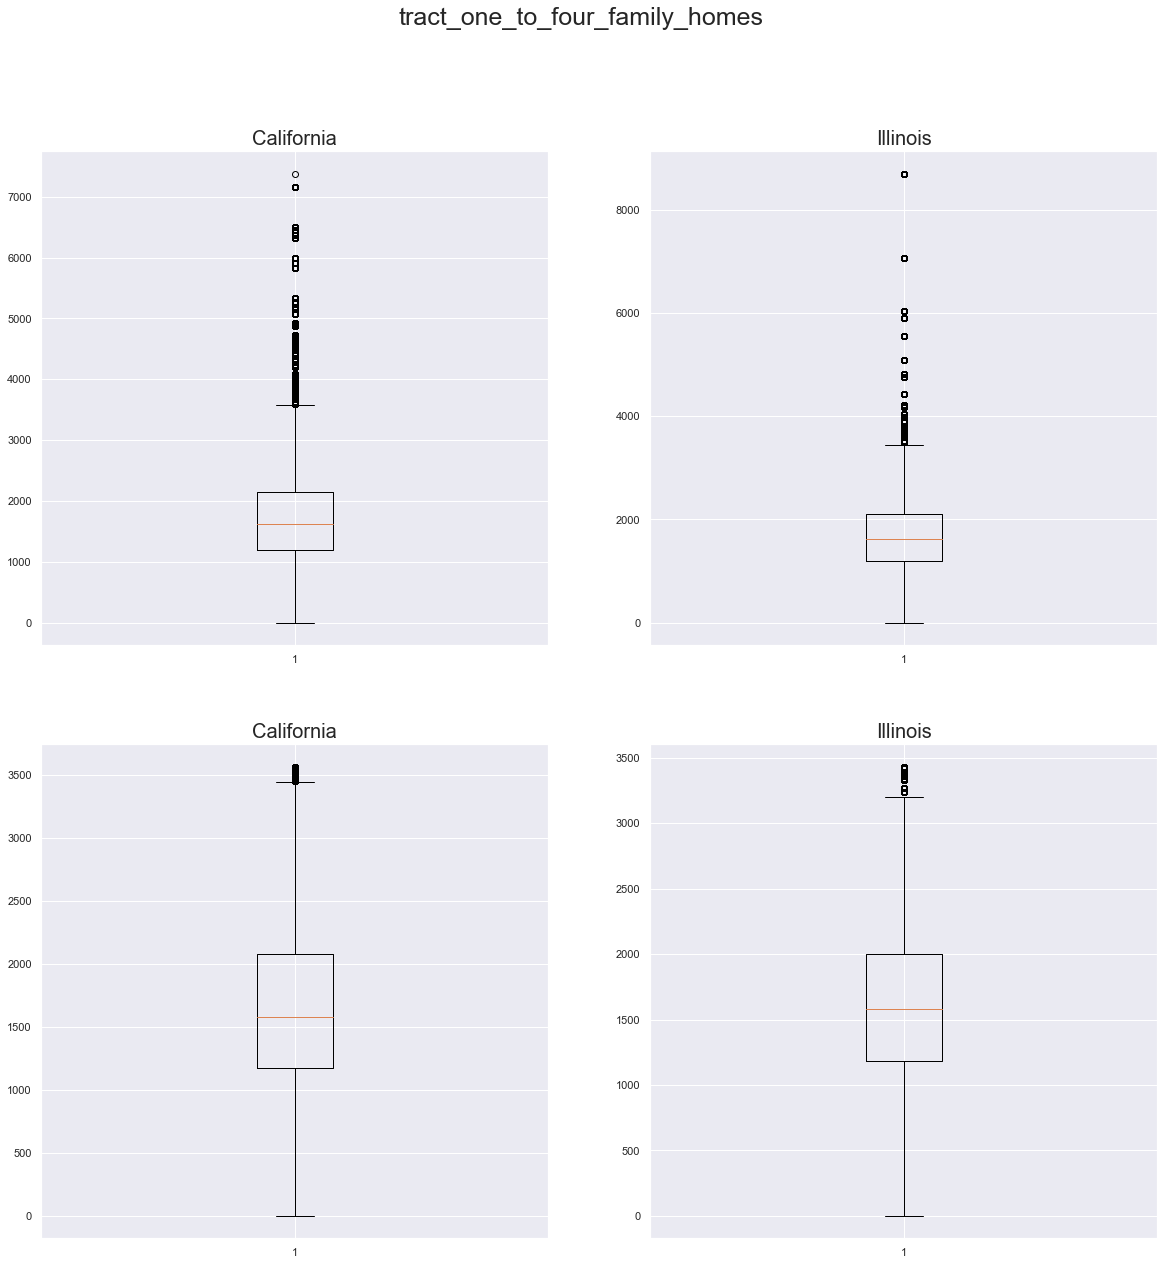

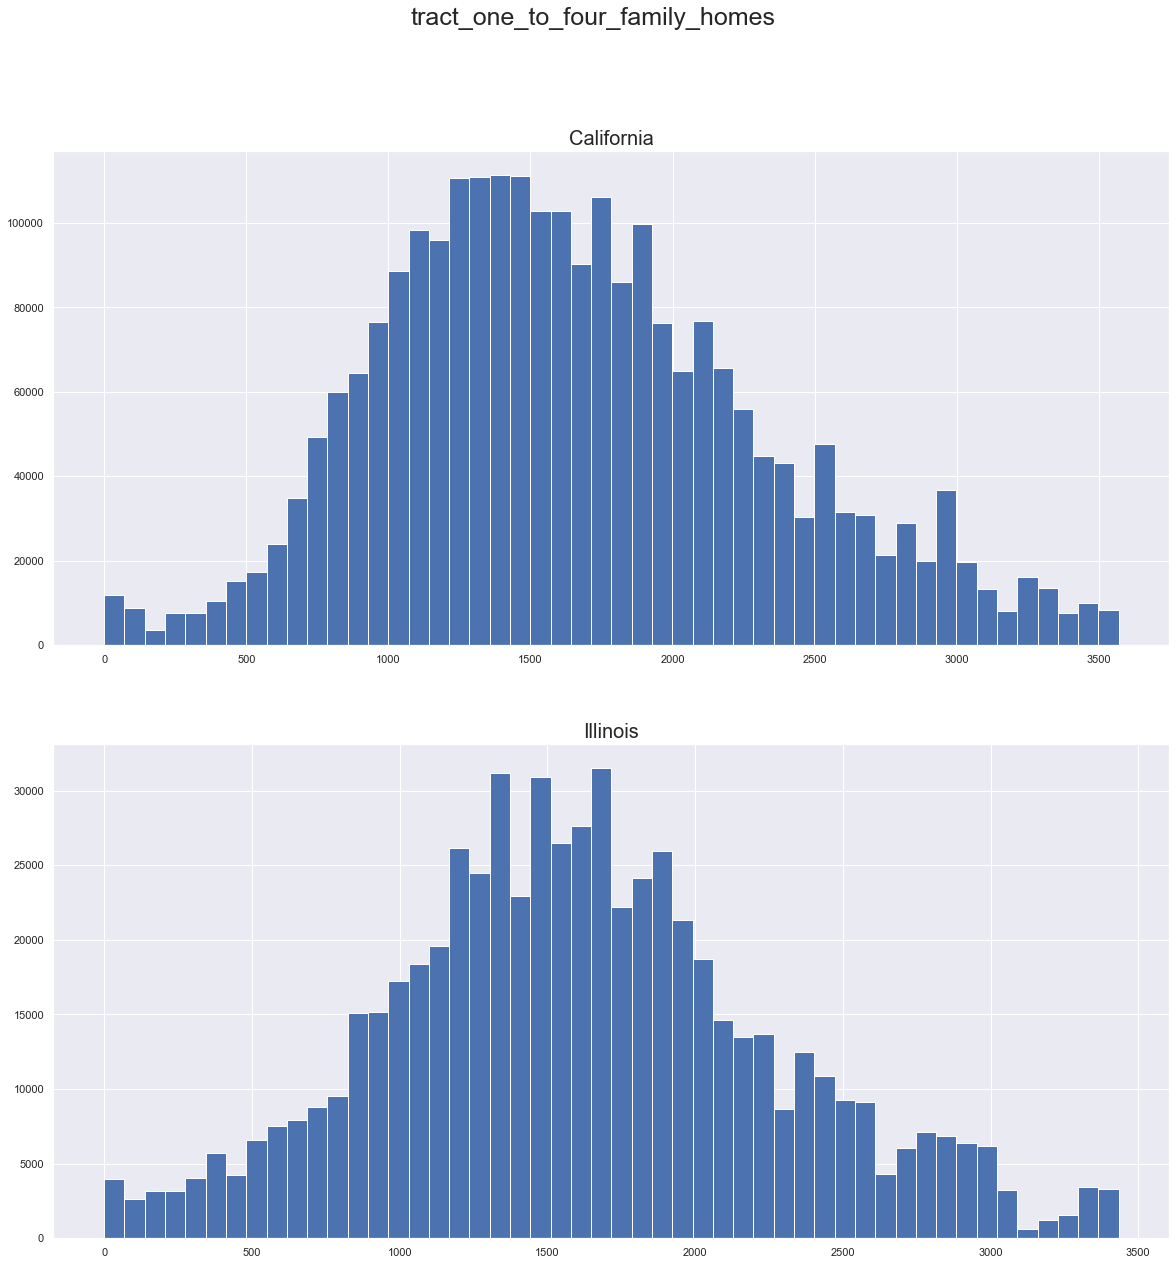

         California       Illinois  California_nol   Illinois_nol
count  2.584267e+06  662236.000000    2.479278e+06  628947.000000
mean   1.775896e+03    1785.366943    1.656449e+03    1610.566871
std    9.004461e+02    1054.530669    6.786669e+02     664.530312
min    0.000000e+00       0.000000    0.000000e+00       0.000000
25%    1.195000e+03    1205.000000    1.174000e+03    1183.000000
50%    1.623000e+03    1619.000000    1.581000e+03    1578.000000
75%    2.154000e+03    2102.000000    2.083000e+03    2004.000000
max    7.379000e+03    8696.000000    3.570000e+03    3434.000000


-------------------------------------------------------------------


Variable: tract_median_age_of_housing_units


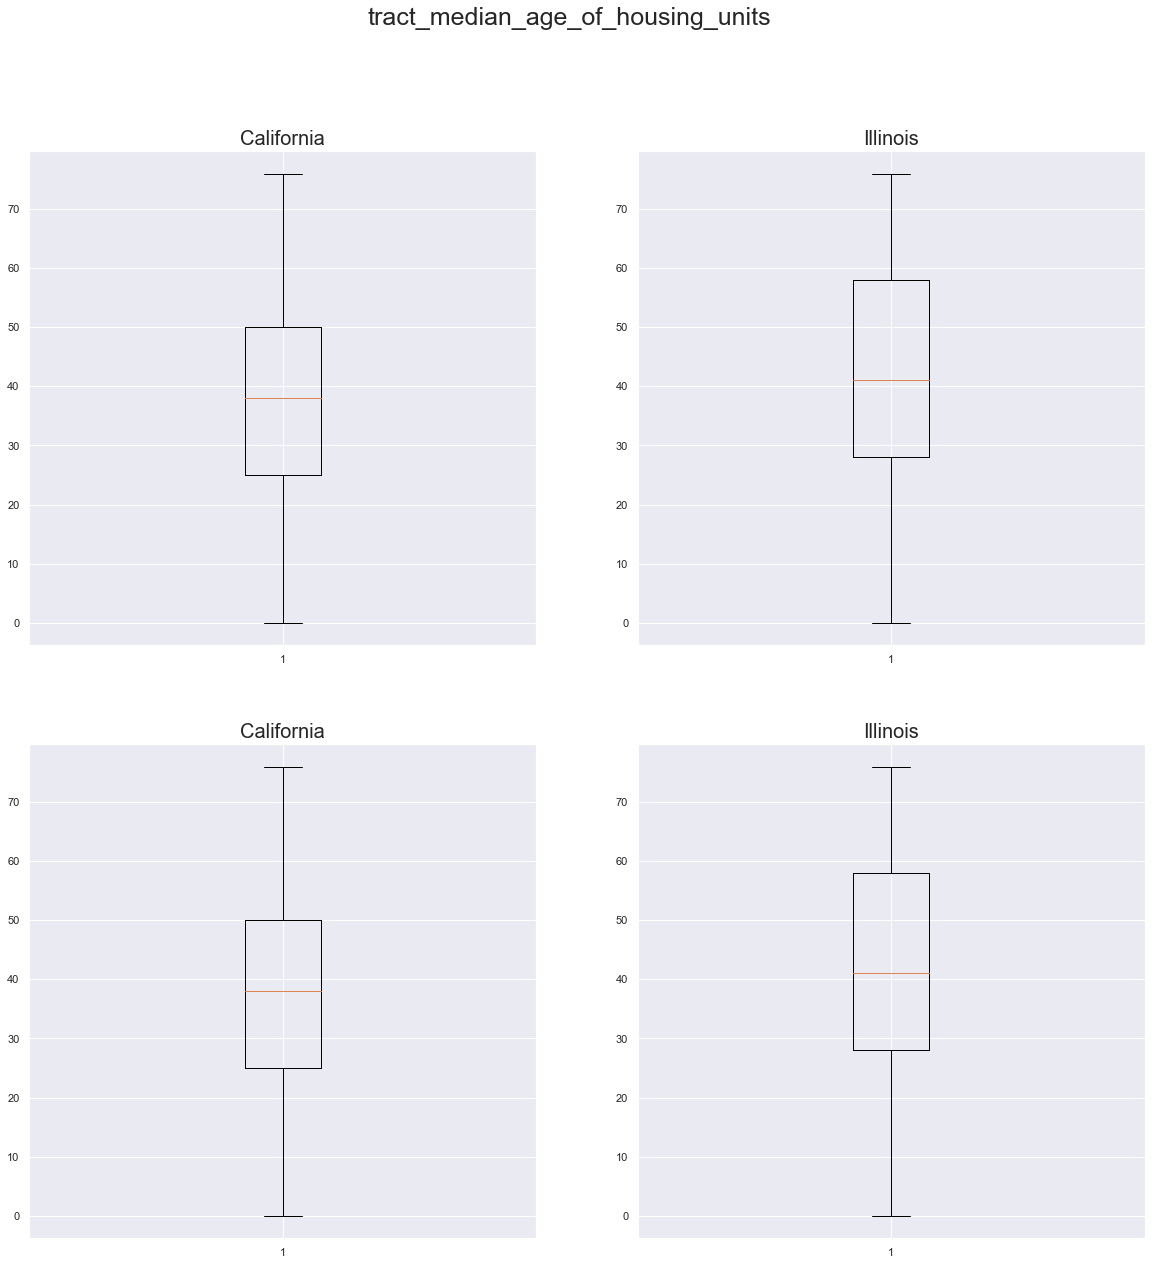

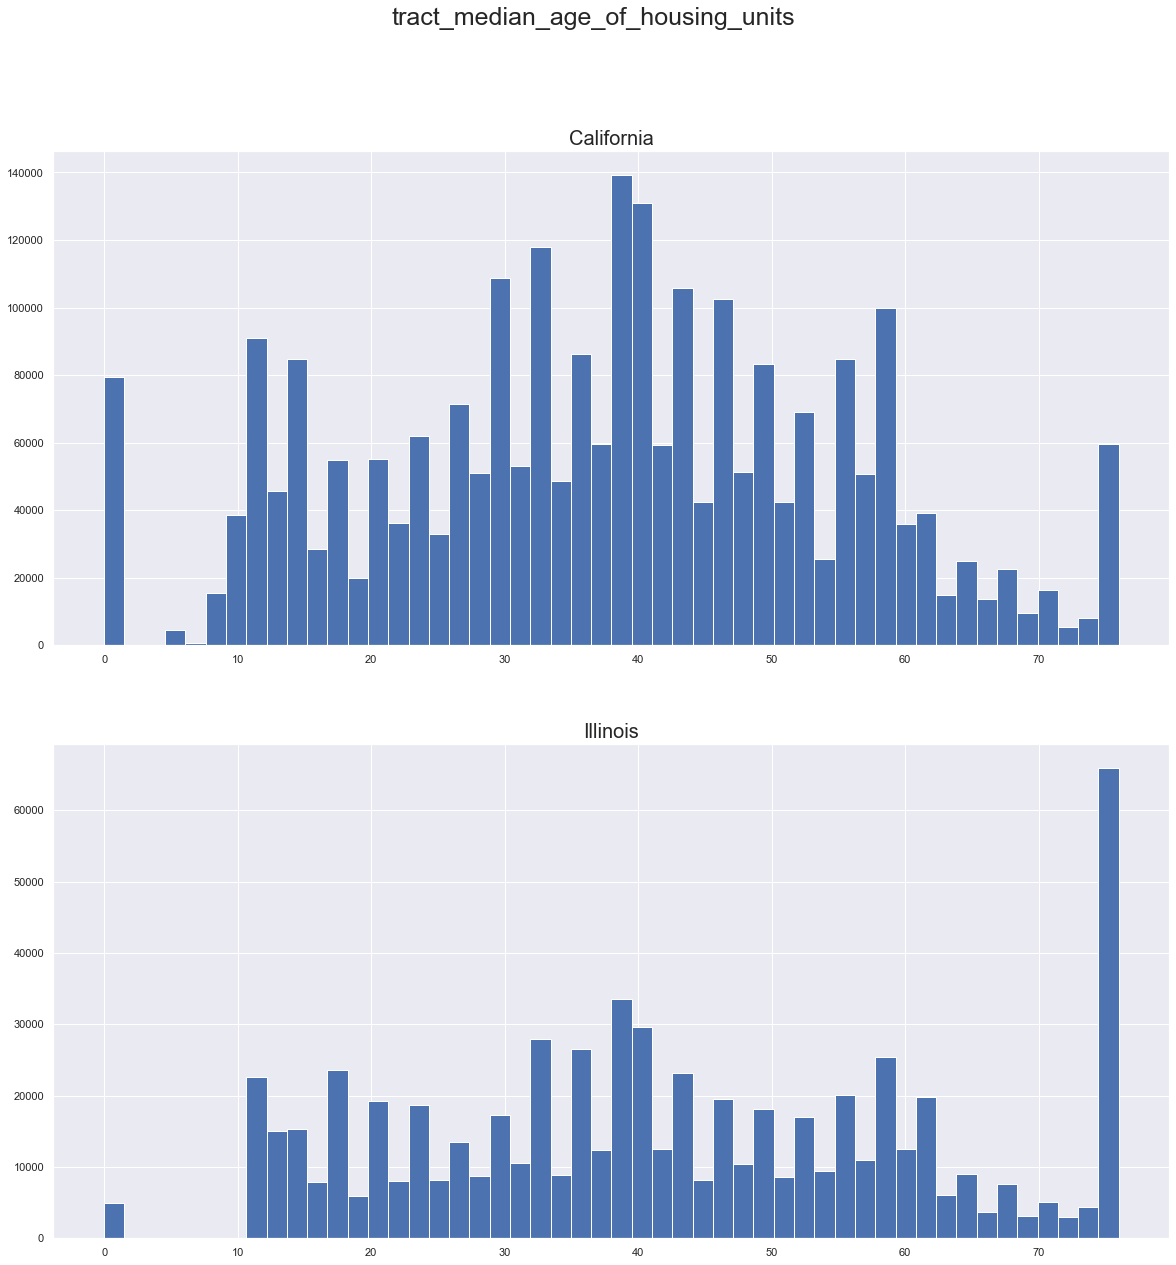

         California       Illinois  California_nol   Illinois_nol
count  2.584267e+06  662236.000000    2.584267e+06  662236.000000
mean   3.746033e+01      42.560907    3.746033e+01      42.560907
std    1.749911e+01      19.264074    1.749911e+01      19.264074
min    0.000000e+00       0.000000    0.000000e+00       0.000000
25%    2.500000e+01      28.000000    2.500000e+01      28.000000
50%    3.800000e+01      41.000000    3.800000e+01      41.000000
75%    5.000000e+01      58.000000    5.000000e+01      58.000000
max    7.600000e+01      76.000000    7.600000e+01      76.000000


-------------------------------------------------------------------




In [25]:
for var in num_vars:
    plot_numerical(var)